In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error




In [5]:
PATH = r'C:\Users\ricar\Documents\Portfolio\Time-Series-Project\Data'
aquifer_auser = pd.read_csv(f'{PATH}/Aquifer_Auser.csv')
aquifer_doganella = pd.read_csv(f'{PATH}/Aquifer_Doganella.csv')
aquifer_luco = pd.read_csv(f'{PATH}/Aquifer_Luco.csv')
aquifer_petrignano = pd.read_csv(f'{PATH}/Aquifer_Petrignano.csv')
lake_biliancino = pd.read_csv(f'{PATH}/Lake_Bilancino.csv')
river_arno = pd.read_csv(f'{PATH}/River_Arno.csv')
water_spring_amiata = pd.read_csv(f'{PATH}/Water_Spring_Amiata.csv')
water_spring_lupa = pd.read_csv(f'{PATH}/Water_Spring_Lupa.csv')
water_spring_madonna = pd.read_csv(f'{PATH}/Water_Spring_Madonna_di_Canneto.csv')


In [6]:
datasets = [aquifer_auser, aquifer_doganella, aquifer_luco, aquifer_petrignano, lake_biliancino, river_arno, water_spring_amiata, water_spring_lupa, water_spring_madonna]

dataset_names = ['aquifer_auser', 'aquifer_doganella', 'aquifer_luco', 'aquifer_petrignano', 'lake_biliancino', 'river_arno', 'water_spring_amiata', 'water_spring_lupa', 'water_spring_madonna']
for dataset in datasets:
    print(dataset.shape)

(8154, 27)
(6026, 22)
(7487, 22)
(5223, 8)
(6603, 9)
(8217, 17)
(7487, 16)
(4199, 3)
(3113, 4)


In [7]:
for dataset in datasets:
    print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

In [8]:
def bar_plot(x, y, title, palette_len, xlim = None, ylim = None, 
             xticklabels = None, yticklabels = None, 
             top_visible = False, right_visible = False, 
             bottom_visible = True, left_visible = False,
             xlabel = None, ylabel = None, figsize = (10, 4),
             axis_grid = 'y'):
    fig, ax = plt.subplots(figsize = figsize)
    plt.title(title, size = 15, fontweight = 'bold', fontfamily = 'serif')

    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_color('black')
    
    ax.spines['top'].set_visible(top_visible)
    ax.spines['right'].set_visible(right_visible)
    ax.spines['bottom'].set_visible(bottom_visible)
    ax.spines['left'].set_visible(left_visible)

    sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
                palette = reversed(sns.color_palette("viridis", len(palette_len))))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)    
    ax.set_xticklabels(xticklabels, fontfamily = 'serif')
    ax.set_yticklabels(yticklabels, fontfamily = 'serif')
    plt.xlabel(xlabel, fontfamily = 'serif')
    plt.ylabel(ylabel, fontfamily = 'serif')
    ax.grid(axis = axis_grid, linestyle = '--', alpha = 0.9)
    plt.show()

C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontfamily = 'serif')
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontfamily = 'serif')


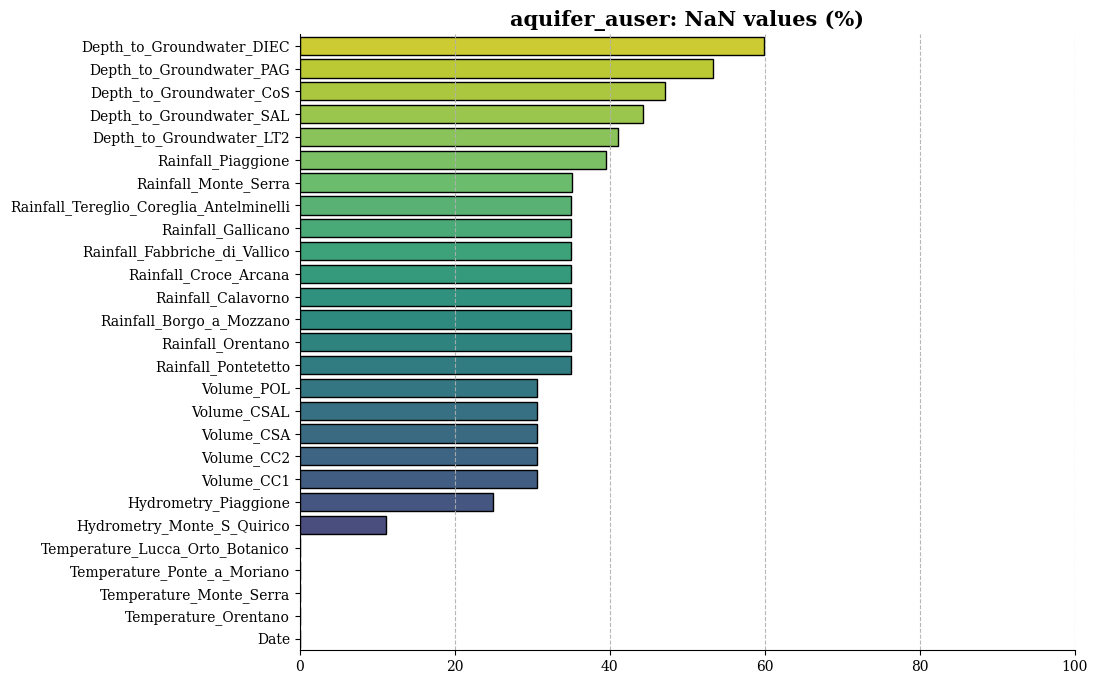

C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontfamily = 'serif')
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontfamily = 'serif')


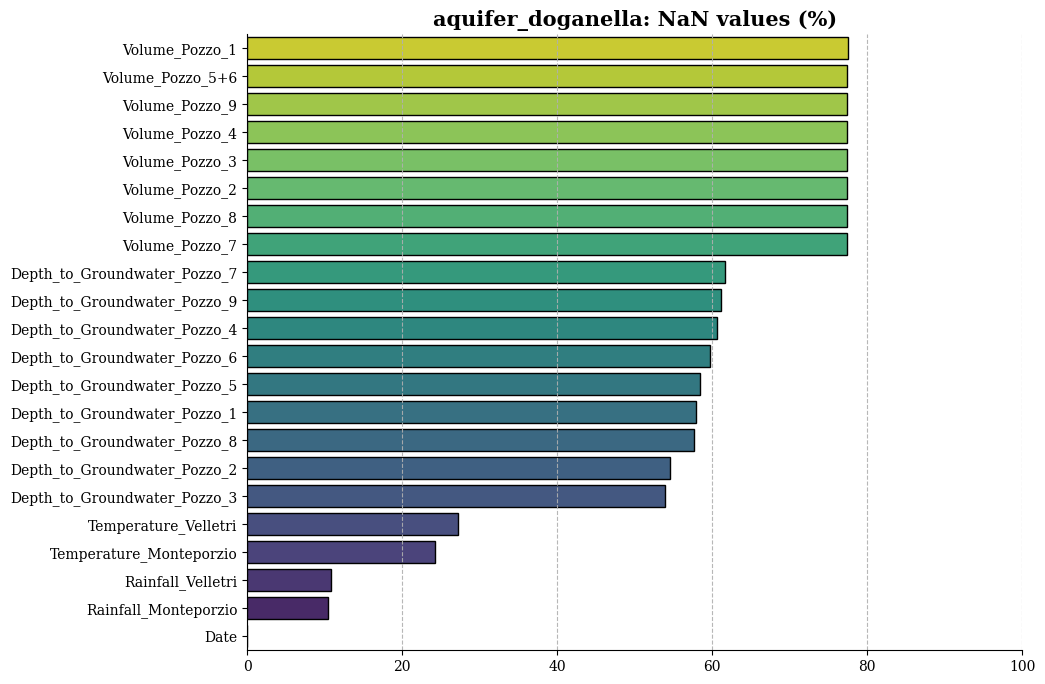

C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontfamily = 'serif')
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontfamily = 'serif')


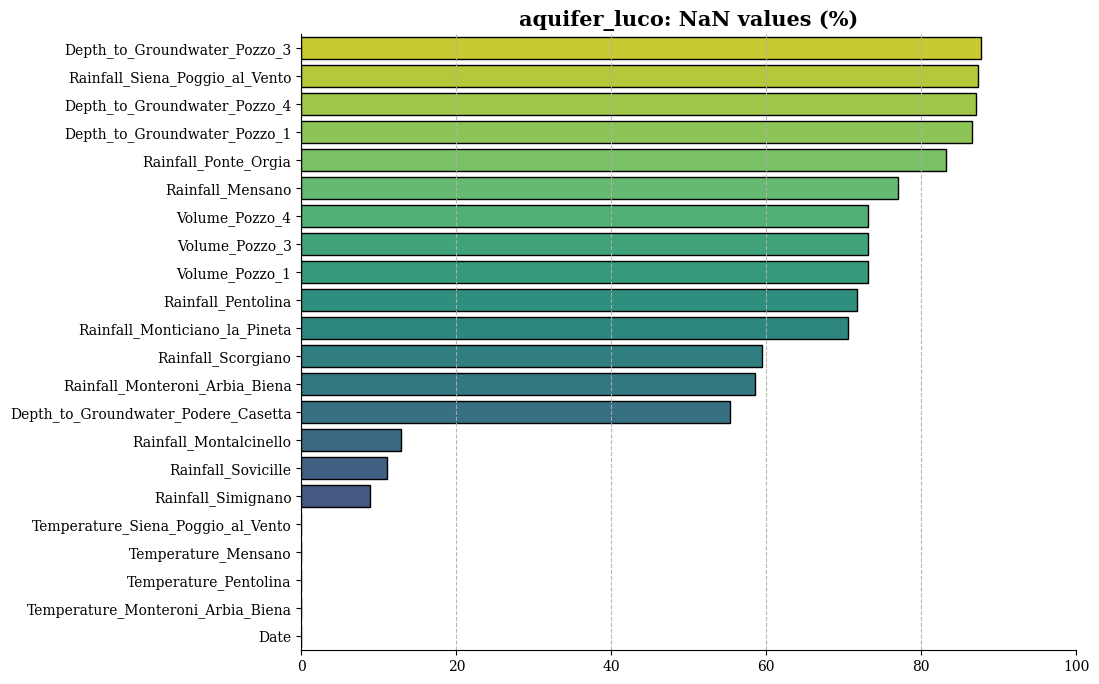

C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontfamily = 'serif')
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontfamily = 'serif')


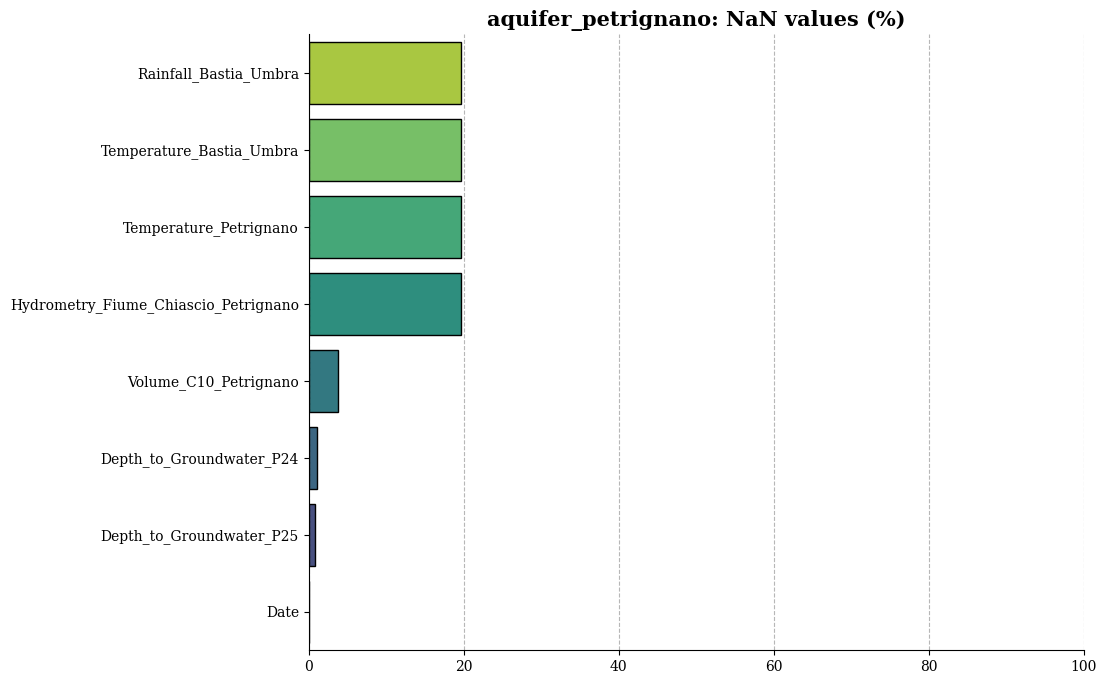

C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontfamily = 'serif')
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontfamily = 'serif')


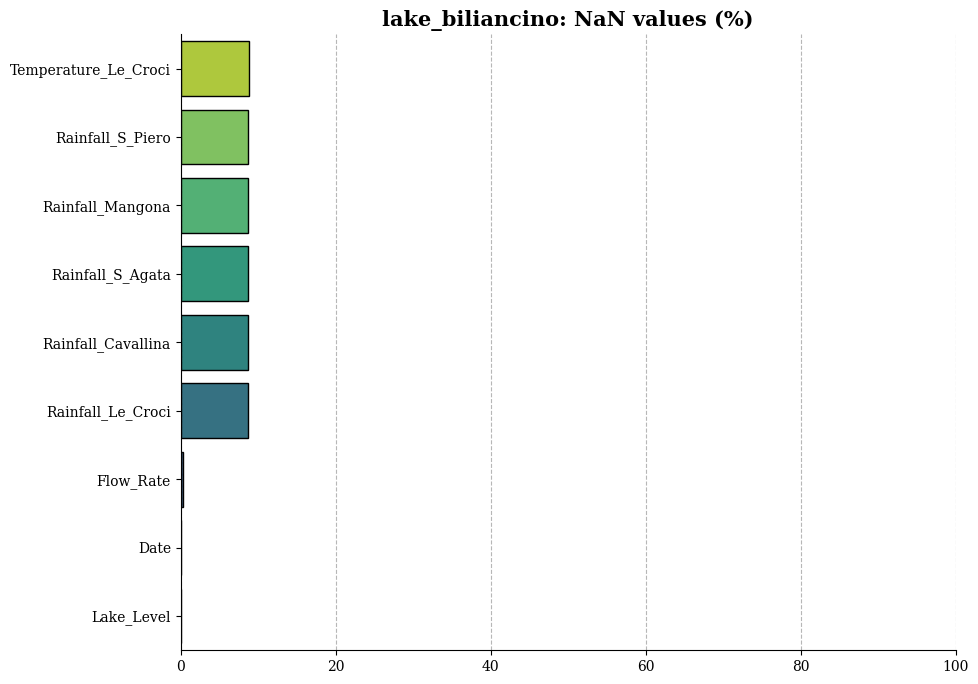

C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontfamily = 'serif')
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontfamily = 'serif')


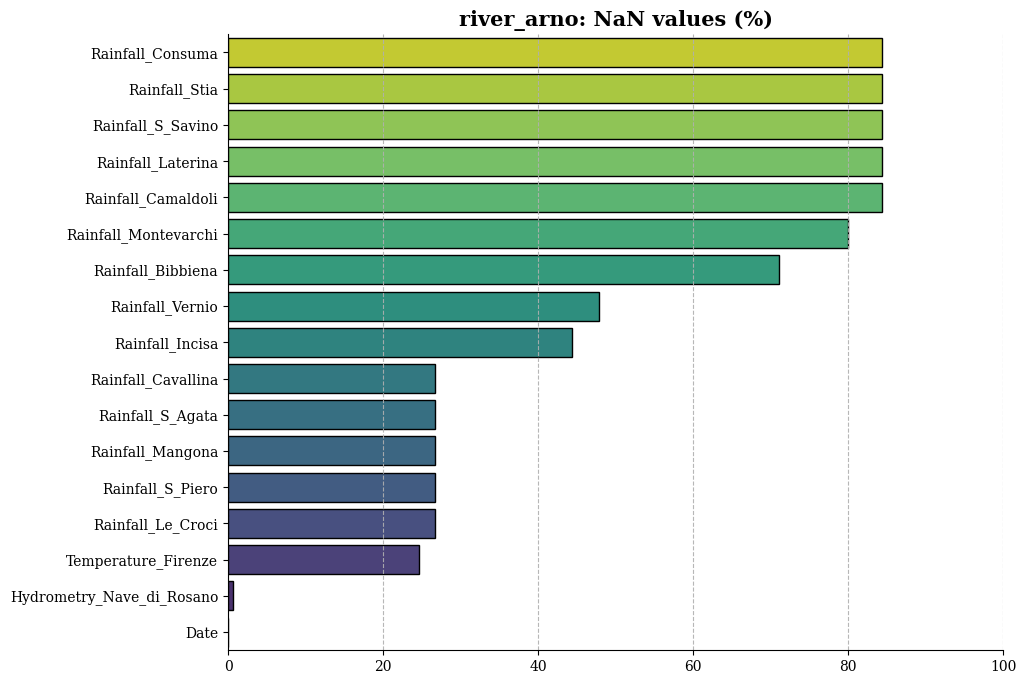

C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontfamily = 'serif')
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontfamily = 'serif')


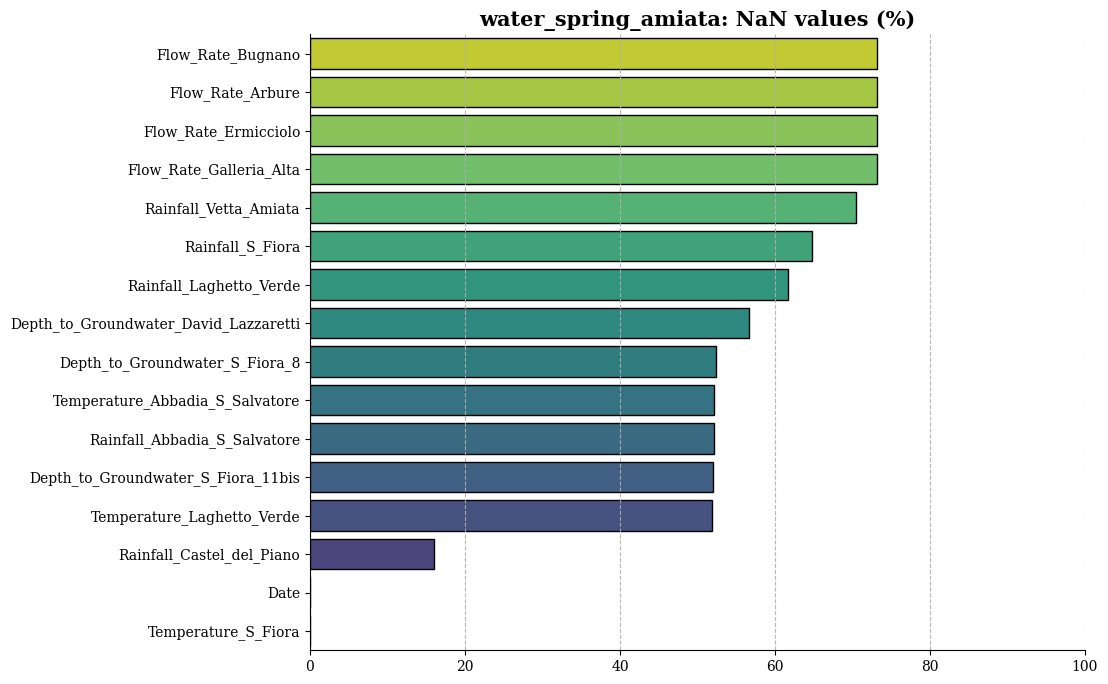

C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontfamily = 'serif')
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontfamily = 'serif')


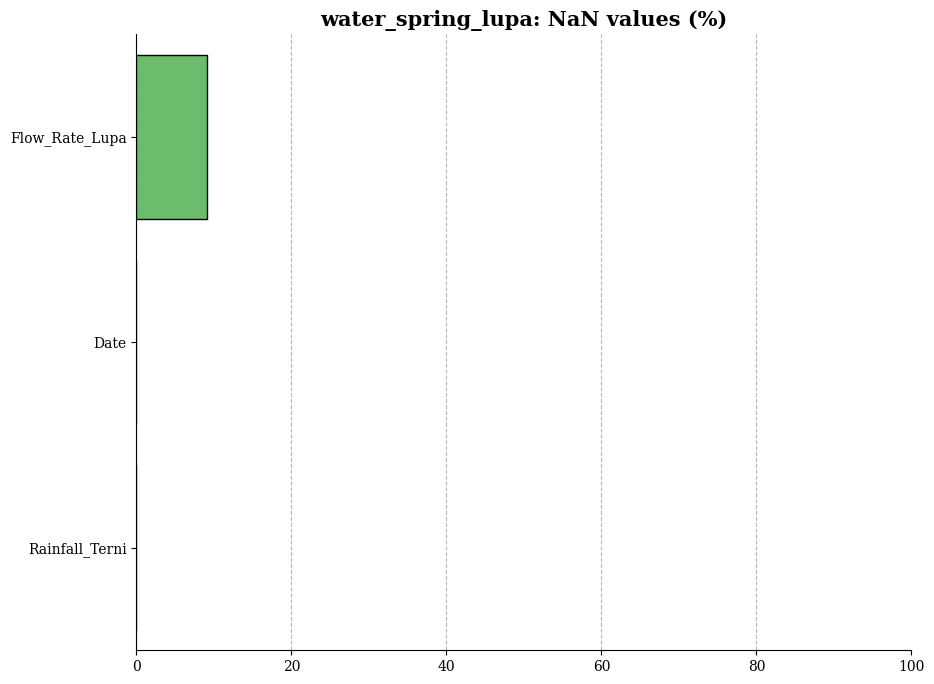

C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontfamily = 'serif')
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1428572126.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontfamily = 'serif')


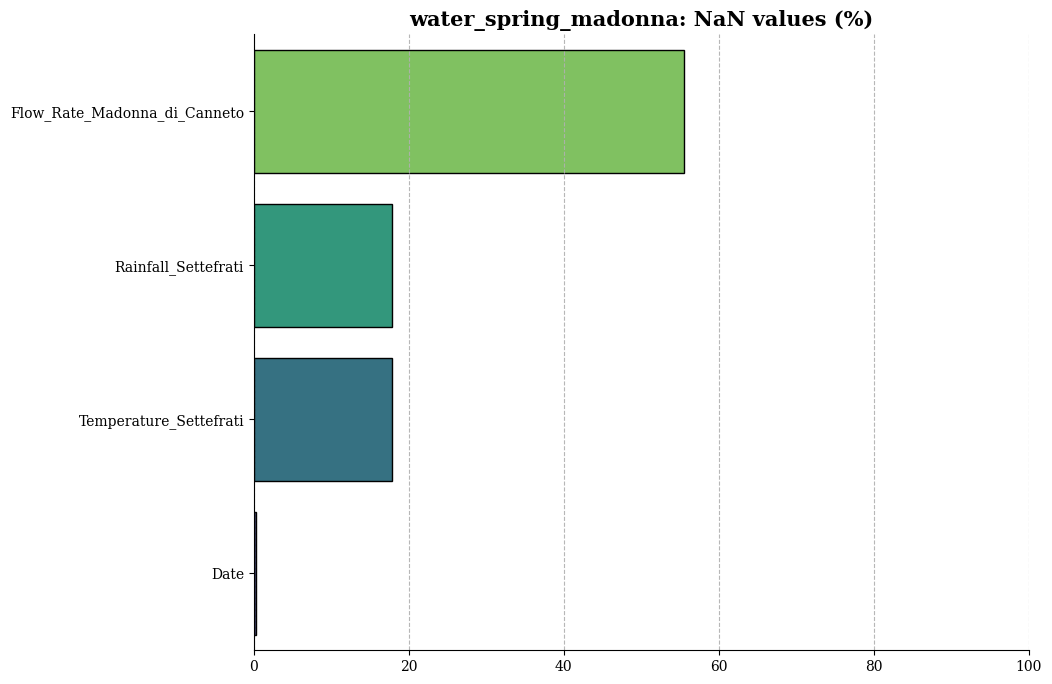

In [9]:
for i in range(len(datasets)):
    NaN_values = (datasets[i].isnull().sum() / len(datasets[i]) * 100).sort_values(ascending = False)
    bar_plot(x = NaN_values, 
             y = NaN_values.index,
             title = '{}: NaN values (%)'.format(dataset_names[i]),
             palette_len = NaN_values.index, 
             xlim = (0, 100), 
             xticklabels = range(0, 101, 20),
             yticklabels = NaN_values.index,
             left_visible = True,
             figsize = (10, 8), axis_grid = 'x')


In [10]:
for dataset in datasets:
    print(dataset.describe())

       Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  \
count         5295.000000          5295.000000           5289.000000   
mean             4.948782             3.495449              3.919077   
std             14.366480             9.983772             10.815270   
min              0.000000             0.000000              0.000000   
25%              0.000000             0.000000              0.000000   
50%              0.000000             0.000000              0.000000   
75%              2.000000             1.000000              1.600000   
max            318.800000           146.600000            152.200000   

       Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  \
count        5295.000000               5295.000000         4930.000000   
mean            3.150670                  4.578961            3.953976   
std             8.747507                 12.771166           10.888103   
min             0.000000                  0.000000     

In [11]:
def line_plot(data, y, title, color,
              top_visible = False, right_visible = False, 
              bottom_visible = True, left_visible = False,
              ylabel = None, figsize = (10, 4), axis_grid = 'y'):
    fig, ax = plt.subplots(figsize = figsize)
    plt.title(title, size = 15, fontweight = 'bold', fontfamily = 'serif')

    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_color('black')
    
    ax.spines['top'].set_visible(top_visible)
    ax.spines['right'].set_visible(right_visible)
    ax.spines['bottom'].set_visible(bottom_visible)
    ax.spines['left'].set_visible(left_visible)
    
    sns.lineplot(x = range(len(data[y])), y = data[y], dashes = False, 
                 color = color, linewidth = .5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    
    ax.set_xticks([])
    plt.xticks(rotation = 90)
    plt.xlabel('')
    plt.ylabel(ylabel, fontfamily = 'serif')
    ax.grid(axis = axis_grid, linestyle = '--', alpha = 0.9)
    plt.show()

def corr_plot(data,
              top_visible = False, right_visible = False, 
              bottom_visible = True, left_visible = False,
              ylabel = None, figsize = (15, 11), axis_grid = 'y'):
    fig, ax = plt.subplots(figsize = figsize)
    plt.title('Correlations (Pearson)', size = 15, fontweight = 'bold', fontfamily = 'serif')
    
    mask = np.triu(np.ones_like(data.corr(), dtype = bool))
    sns.heatmap(round(data.corr(), 2), mask = mask, cmap = 'viridis', annot = True)
    plt.show()
    
def columns_viz(data, color):
    for i in range(len(data.columns)):
        line_plot(data = data, y = data.columns[i],
                  color = color,
                  title = '{} dynamics'.format(data.columns[i]),
                  bottom_visible = False, figsize = (10, 2))

In [12]:

def predicted_viz(y_test, y_pred, param, name, original_df):
    # Ensure y_test.values and y_pred are 1-dimensional
    y_test_values = y_test.values.flatten()
    y_pred_values = y_pred.flatten()

    # Fetch the 'Date' information based on the index of y_test
    dates = original_df.loc[y_test.index, 'Date']

    # Check that dates align with y_test and y_pred
    assert len(dates) == len(y_test_values) == len(y_pred_values), "Length mismatch between dates and predictions"

    # Create a DataFrame for real measurements
    rm = pd.DataFrame({param: y_test_values, 'Date': dates})
    rm['month_year'] = pd.to_datetime(rm['Date']).dt.to_period('M')
    rm_means = rm.groupby('month_year')[param].mean().reset_index()
    rm_means['month_year'] = rm_means['month_year'].dt.to_timestamp()

    # Create a DataFrame for predictions
    pm = pd.DataFrame({param: y_pred_values, 'Date': dates})
    pm['month_year'] = pd.to_datetime(pm['Date']).dt.to_period('M')
    pm_means = pm.groupby('month_year')[param].mean().reset_index()
    pm_means['month_year'] = pm_means['month_year'].dt.to_timestamp()

    # Plotting
    fig, ax = plt.subplots(figsize=(15, 5))
    plt.title(f'{param} prediction ({name})', size=15, fontweight='bold', fontfamily='serif')

    sns.lineplot(data=rm_means, x='month_year', y=param, color='blue', label=f'Real {param}')
    sns.lineplot(data=pm_means, x='month_year', y=param, color='red', label=f'Pred {param}')

    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_visible(False)

    ax.set_xticks(rm_means['month_year'].dt.strftime('%Y-%m')[::12])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(axis='y', linestyle='--', alpha=0.9)
    plt.show()


Aquifer Auser

In [13]:
datasets[0].head()


Date  Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  \
0  05/03/1998                 NaN                  NaN                   NaN   
1  06/03/1998                 NaN                  NaN                   NaN   
2  07/03/1998                 NaN                  NaN                   NaN   
3  08/03/1998                 NaN                  NaN                   NaN   
4  09/03/1998                 NaN                  NaN                   NaN   

   Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  \
0                NaN                       NaN                 NaN   
1                NaN                       NaN                 NaN   
2                NaN                       NaN                 NaN   
3                NaN                       NaN                 NaN   
4                NaN                       NaN                 NaN   

   Rainfall_Calavorno  Rainfall_Croce_Arcana  \
0                 NaN                    NaN   
1                 NaN                    NaN   
2                 NaN                    NaN   
3                 NaN                    NaN   
4                 NaN                    NaN   

   Rainfall_Tereglio_Coreglia_Antelminelli  ...  Temperature_Monte_Serra  \
0                                      NaN  ...                      0.0   
1                                      NaN  ...                      0.0   
2                                      NaN  ...                      9.2   
3                                      NaN  ...                     11.4   
4                                      NaN  ...                     11.4   

   Temperature_Ponte_a_Moriano  Temperature_Lucca_Orto_Botanico  Volume_POL  \
0                          0.0                             0.00         NaN   
1                          0.0                            10.05         NaN   
2                          0.0                            10.00         NaN   
3                          0.0                            13.85         NaN   
4                          0.0                            12.85         NaN   

   Volume_CC1  Volume_CC2  Volume_CSA  Volume_CSAL  \
0         NaN         NaN         NaN          NaN   
1         NaN         NaN         NaN          NaN   
2         NaN         NaN         NaN          NaN   
3         NaN         NaN         NaN          NaN   
4         NaN         NaN         NaN          NaN   

   Hydrometry_Monte_S_Quirico  Hydrometry_Piaggione  
0                         NaN                   NaN  
1                         NaN                   NaN  
2                         NaN                   NaN  
3                         NaN                   NaN  
4                         NaN                   NaN  

[5 rows x 27 columns]

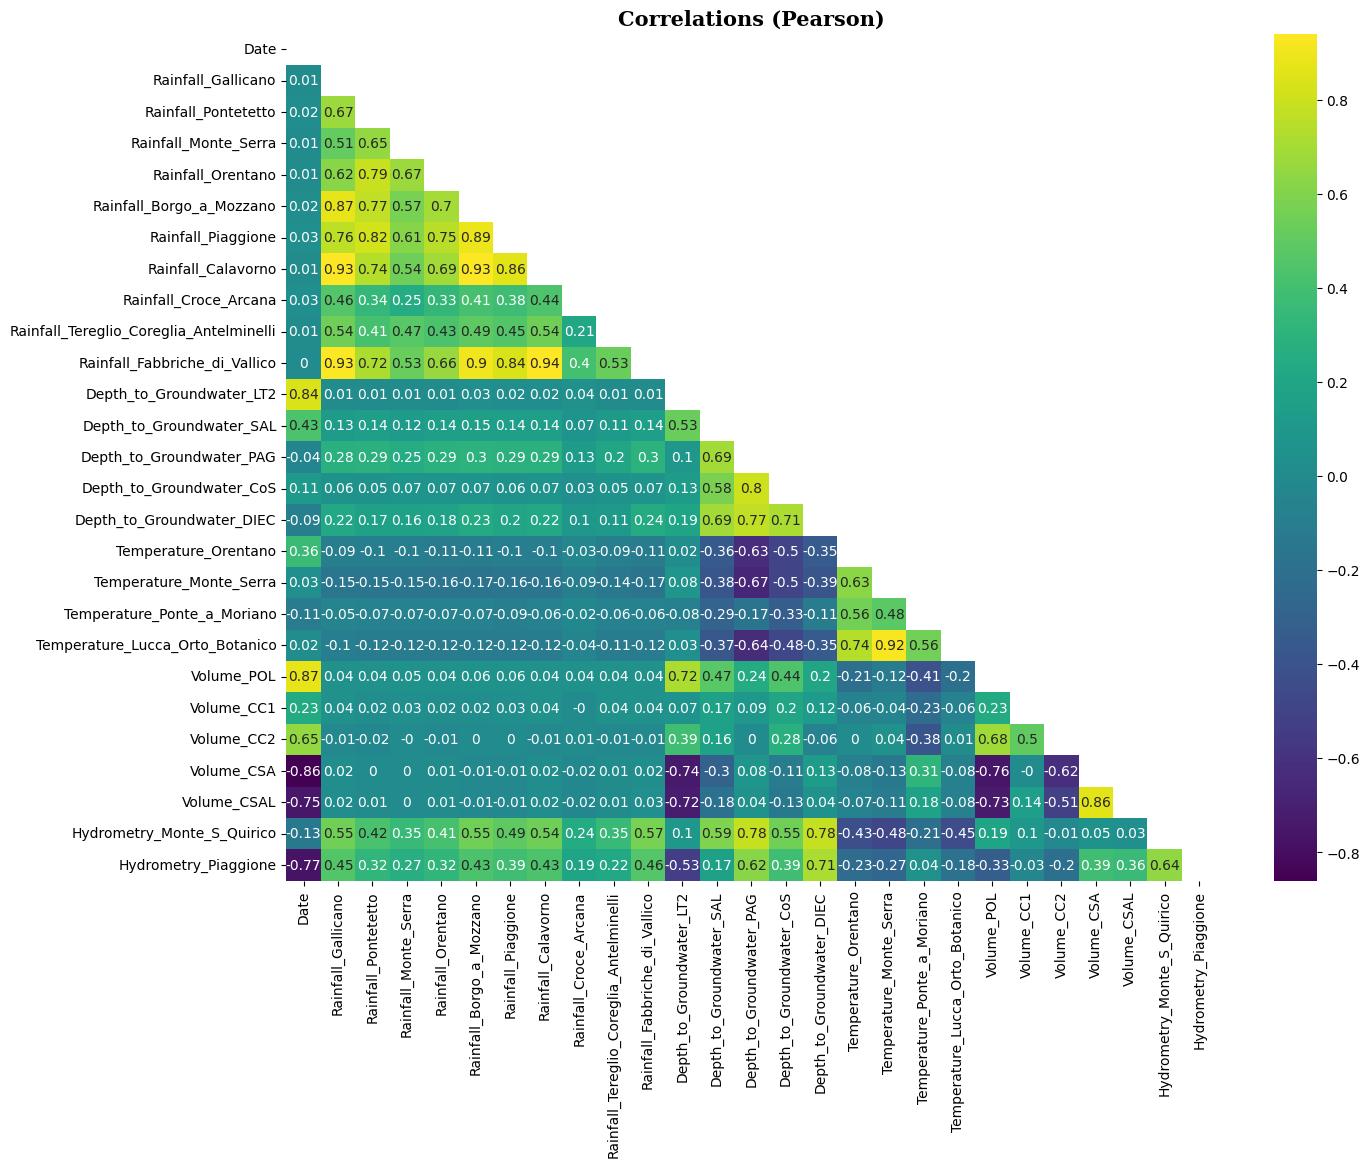

In [14]:
datasets[0]['Date'] = pd.to_datetime(datasets[0]['Date'], dayfirst=True)
corr_plot(datasets[0], 'Aquifer Auser', (20, 20))

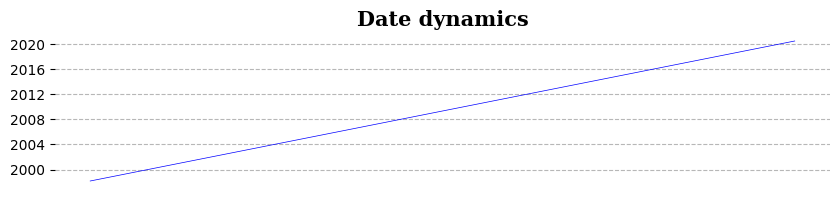

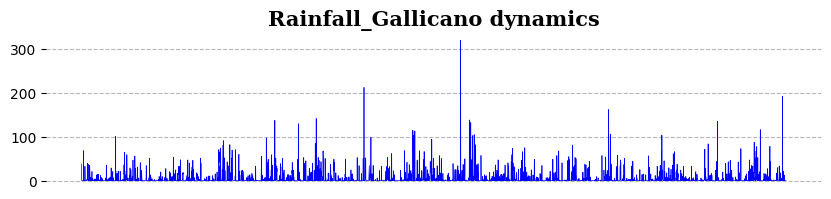

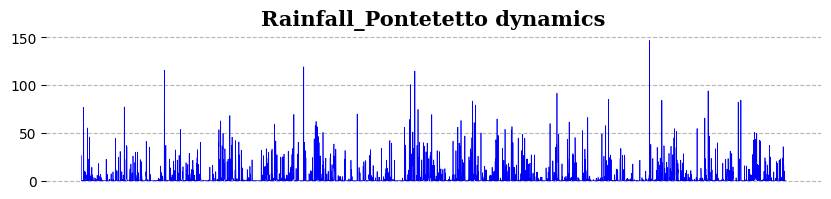

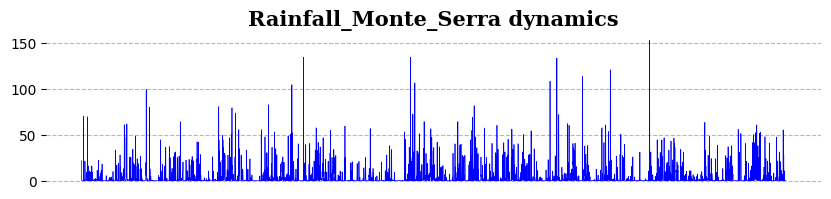

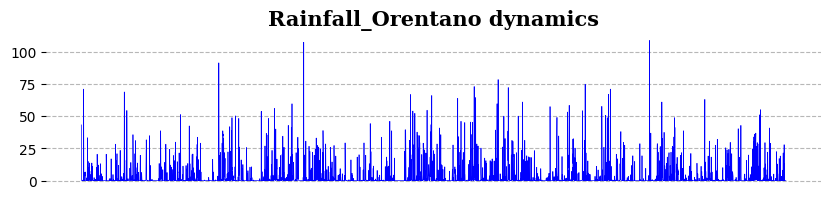

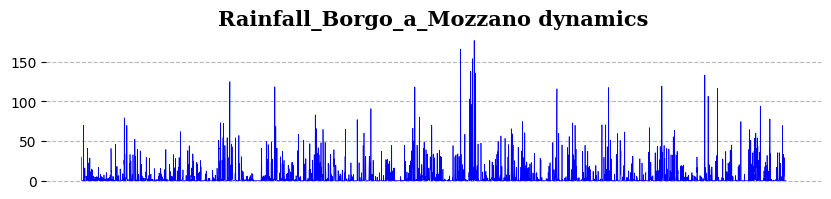

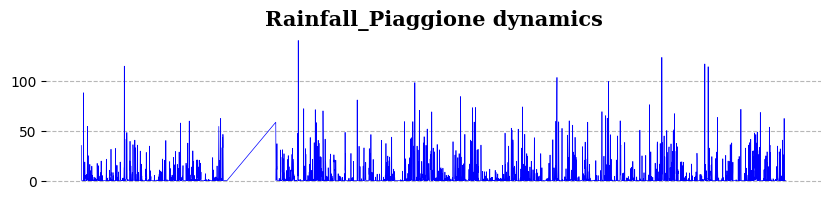

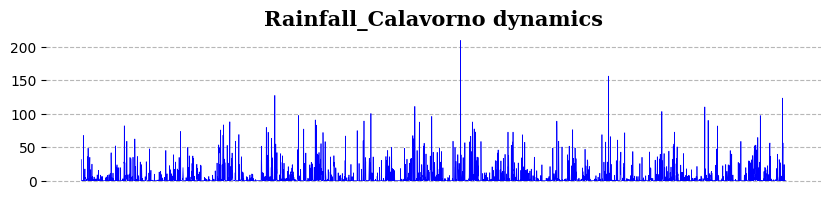

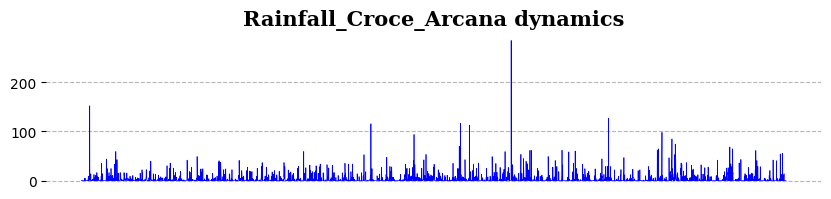

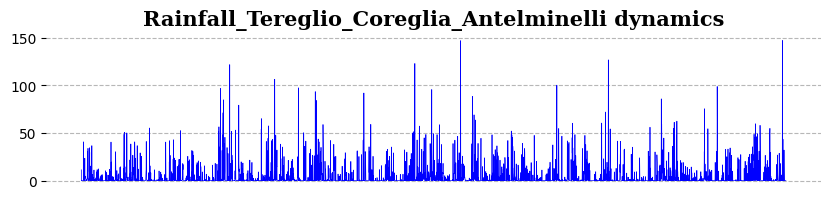

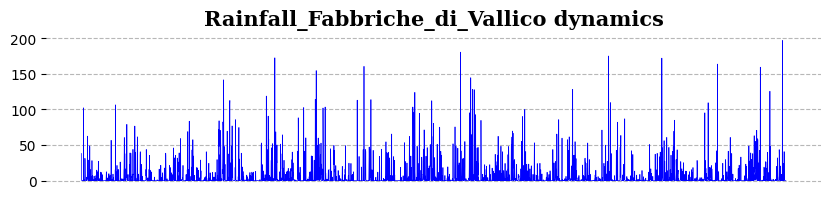

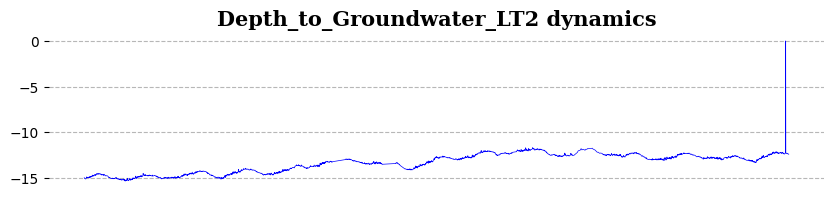

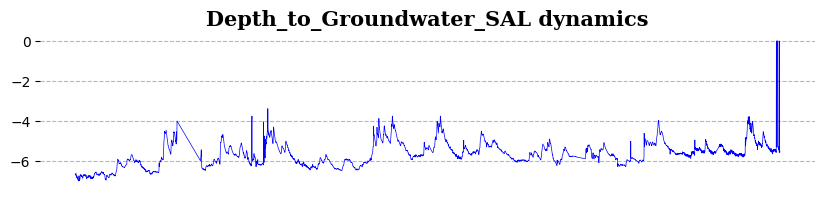

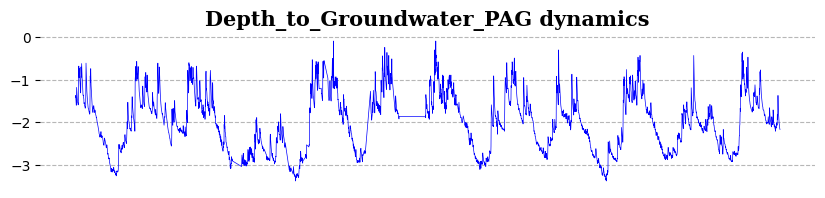

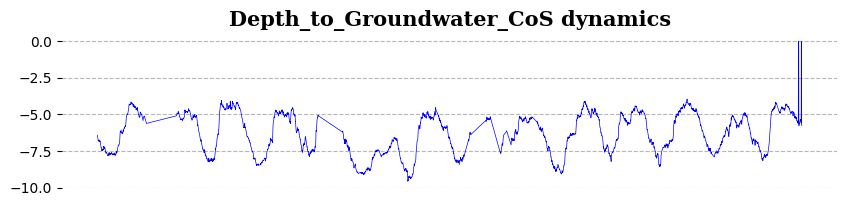

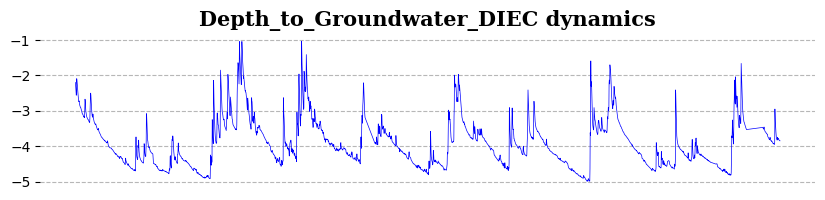

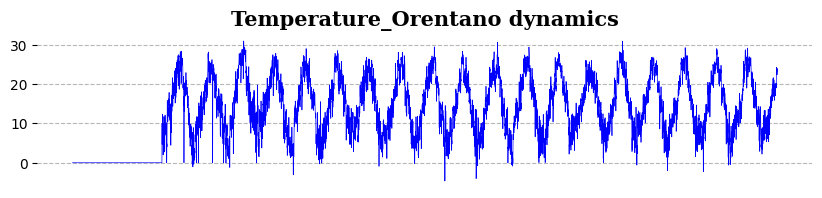

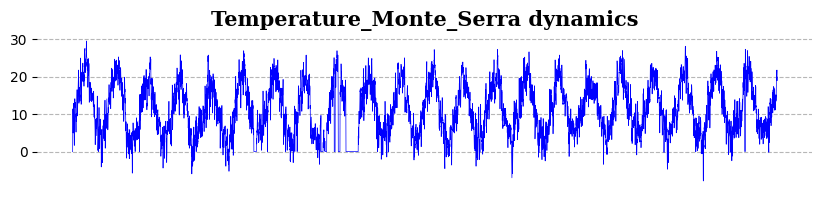

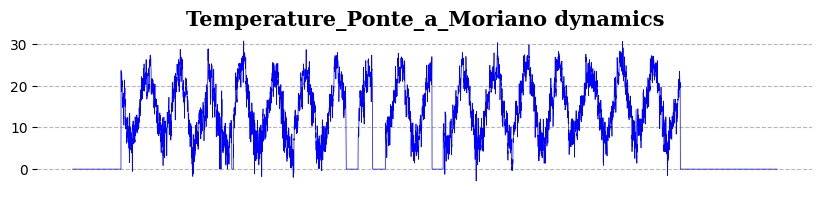

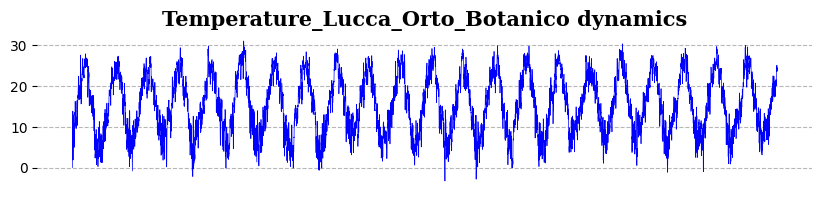

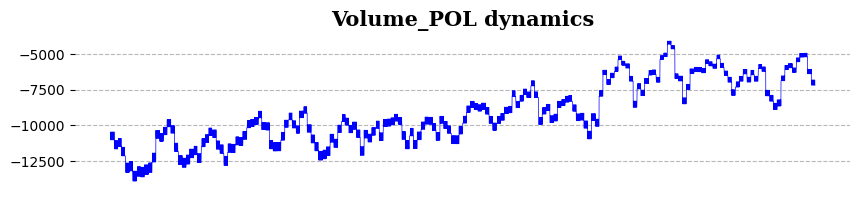

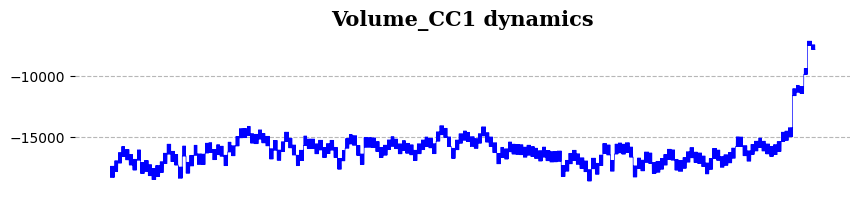

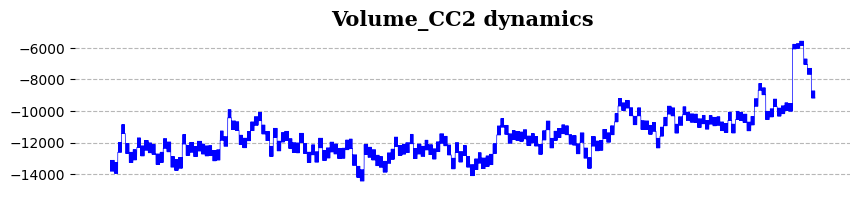

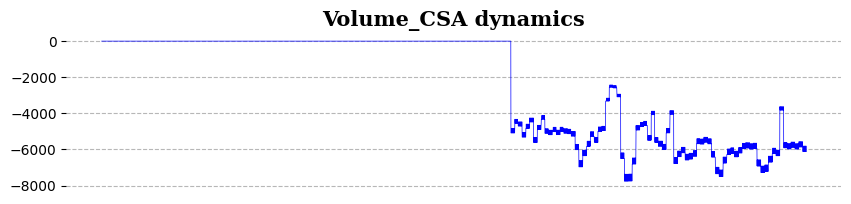

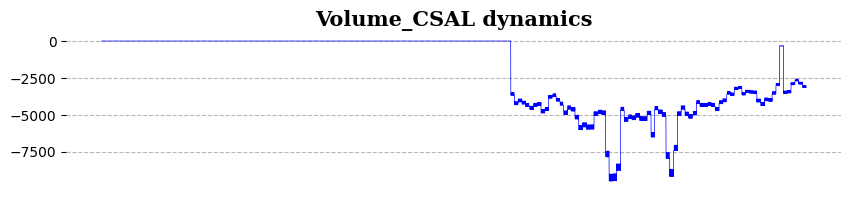

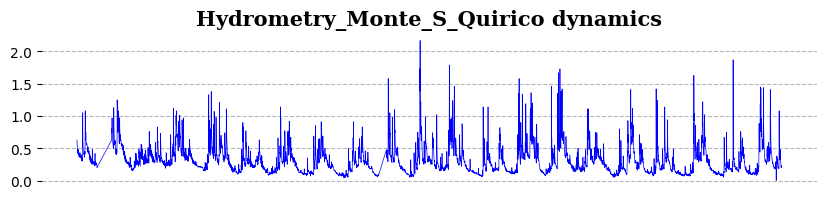

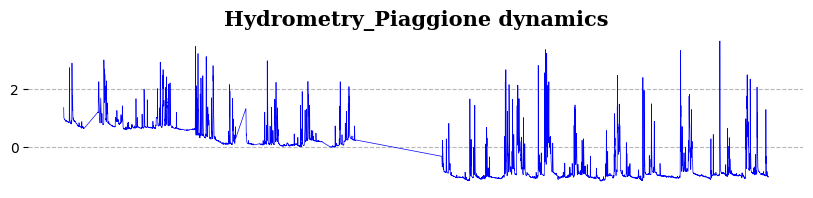

In [15]:
columns_viz(datasets[0], color= 'blue')

In [16]:
datasets[0].columns

Index(['Date', 'Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')

In [17]:
Auser_pred = aquifer_auser
rainfall_auser = [col for col in Auser_pred.columns if 'Rainfall' in col]
temperature_auser = [col for col in Auser_pred.columns if 'Temperature' in col]
volume_auser = [col for col in Auser_pred.columns if 'Volume' in col]
hydrometry_auser = [col for col in Auser_pred.columns if 'Hydrometry' in col]

Auser_pred['rainfall_mean'] = Auser_pred[rainfall_auser].mean(axis = 1).values
Auser_pred['temperature_mean'] = Auser_pred[temperature_auser].mean(axis = 1).values
Auser_pred['volume_mean'] = Auser_pred[volume_auser].mean(axis = 1).values
Auser_pred['hydrometry_mean'] = Auser_pred[hydrometry_auser].mean(axis = 1).values
Auser_pred = Auser_pred.drop(['Depth_to_Groundwater_PAG', 'Depth_to_Groundwater_DIEC',
                        'Temperature_Ponte_a_Moriano', 'Temperature_Orentano',
                        'Volume_CSA', 'Volume_CSAL'], axis = 1)
Auser_pred = Auser_pred.fillna(method = 'bfill')

Auser_pred.dtypes

C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\3607522683.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Auser_pred = Auser_pred.fillna(method = 'bfill')


Date                                       datetime64[ns]
Rainfall_Gallicano                                float64
Rainfall_Pontetetto                               float64
Rainfall_Monte_Serra                              float64
Rainfall_Orentano                                 float64
Rainfall_Borgo_a_Mozzano                          float64
Rainfall_Piaggione                                float64
Rainfall_Calavorno                                float64
Rainfall_Croce_Arcana                             float64
Rainfall_Tereglio_Coreglia_Antelminelli           float64
Rainfall_Fabbriche_di_Vallico                     float64
Depth_to_Groundwater_LT2                          float64
Depth_to_Groundwater_SAL                          float64
Depth_to_Groundwater_CoS                          float64
Temperature_Monte_Serra                           float64
Temperature_Lucca_Orto_Botanico                   float64
Volume_POL                                        float64
Volume_CC1    

In [18]:
y0 = Auser_pred[['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS']]
x0 = Auser_pred.drop(['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS'], axis = 1)

x_train_auser, x_test_auser, y_train_auser, y_test_auser = train_test_split(x0, y0, test_size = 0.2, random_state = 42, shuffle = False)

In [19]:
auser_model_LT2 = XGBRegressor(n_estimators = 1000, learning_rate = 0.01, random_state = 42, enable_categorical=True)
auser_model_SAL = XGBRegressor(n_estimators = 1000, learning_rate = 0.01, random_state = 42, enable_categorical=True)
auser_model_CoS = XGBRegressor(n_estimators = 1000, learning_rate = 0.01, random_state = 42, enable_categorical=True)

x_train_auser['Date'] = pd.to_datetime(x_train_auser['Date'])
x_test_auser['Date'] = pd.to_datetime(x_test_auser['Date'])

x_train_auser['Year'] = x_train_auser['Date'].dt.year
x_train_auser['Month'] = x_train_auser['Date'].dt.month
x_train_auser['Day'] = x_train_auser['Date'].dt.day

x_test_auser['Year'] = x_test_auser['Date'].dt.year
x_test_auser['Month'] = x_test_auser['Date'].dt.month
x_test_auser['Day'] = x_test_auser['Date'].dt.day

x_train_auser = x_train_auser.drop('Date', axis=1)
x_test_auser = x_test_auser.drop('Date', axis=1)

auser_model_LT2.fit(x_train_auser, y_train_auser['Depth_to_Groundwater_LT2'])
auser_model_SAL.fit(x_train_auser, y_train_auser['Depth_to_Groundwater_SAL'])
auser_model_CoS.fit(x_train_auser, y_train_auser['Depth_to_Groundwater_CoS'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [20]:
auser_y_pred_LT2 = auser_model_LT2.predict(x_test_auser)
auser_y_pred_SAL = auser_model_SAL.predict(x_test_auser)
auser_y_pred_CoS = auser_model_CoS.predict(x_test_auser)

print('MAE LT2: ', mean_absolute_error(y_test_auser['Depth_to_Groundwater_LT2'], auser_y_pred_LT2))
print('MAE SAL: ', mean_absolute_error(y_test_auser['Depth_to_Groundwater_SAL'], auser_y_pred_SAL))
print('MAE CoS: ', mean_absolute_error(y_test_auser['Depth_to_Groundwater_CoS'], auser_y_pred_CoS))

MAE LT2:  0.3414810354442117
MAE SAL:  0.26259795010564957
MAE CoS:  0.8598861400924674


In [21]:
y_test_auser.columns

Index(['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL',
       'Depth_to_Groundwater_CoS'],
      dtype='object')

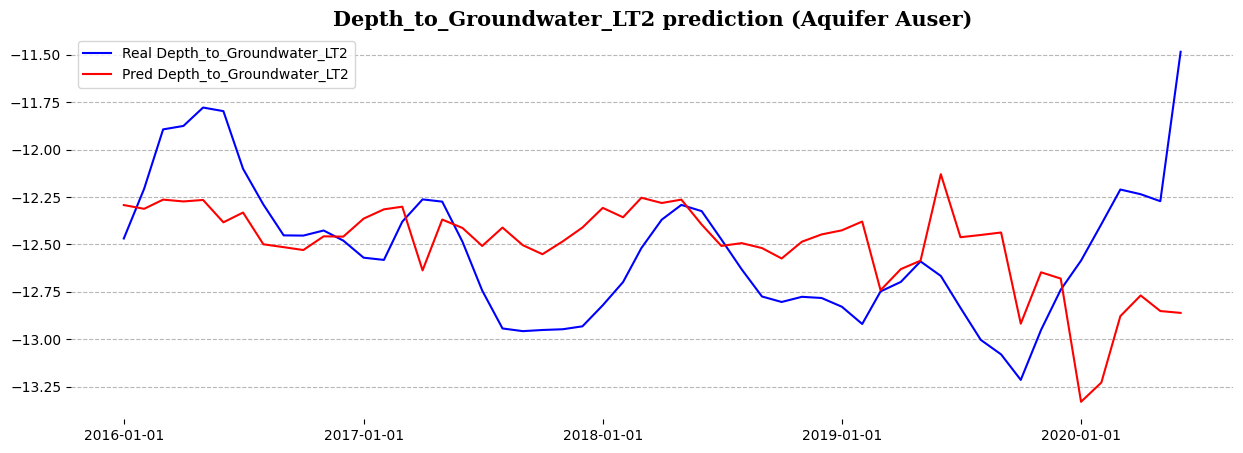

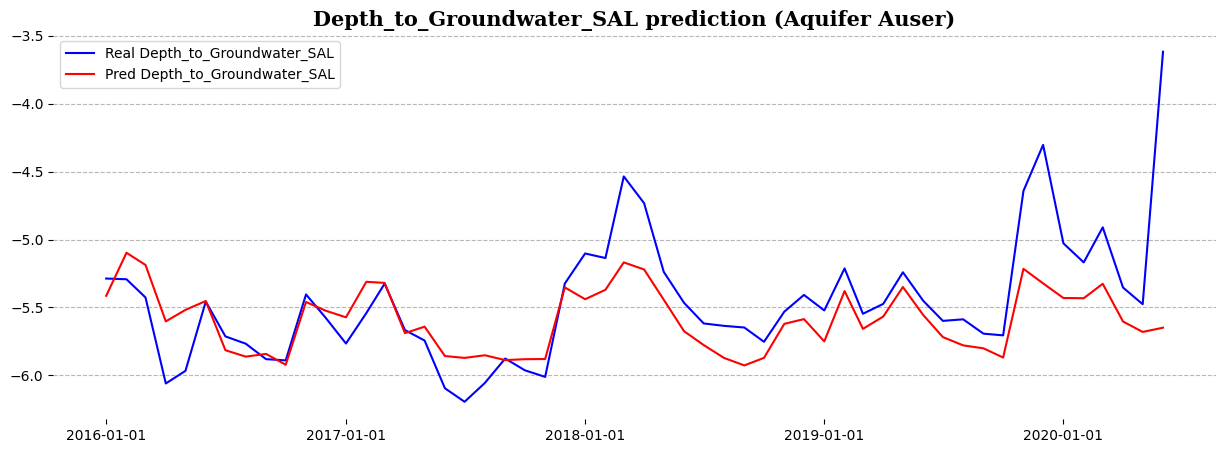

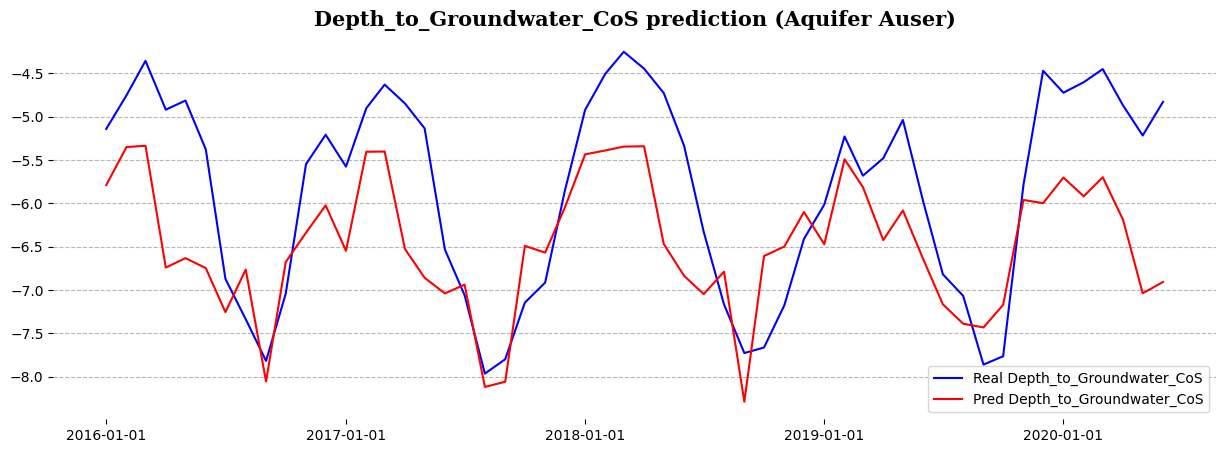

In [22]:
predicted_viz(y_test_auser.iloc[:, 0], auser_y_pred_LT2, 'Depth_to_Groundwater_LT2', 'Aquifer Auser', aquifer_auser)
predicted_viz(y_test_auser.iloc[:, 1], auser_y_pred_SAL, 'Depth_to_Groundwater_SAL', 'Aquifer Auser', aquifer_auser)
predicted_viz(y_test_auser.iloc[:, 2], auser_y_pred_CoS, 'Depth_to_Groundwater_CoS', 'Aquifer Auser', aquifer_auser)

Aquifer Doganella

In [23]:
datasets[1].head()

Date  Rainfall_Monteporzio  Rainfall_Velletri  \
0  01/01/2004                   0.0                0.0   
1  02/01/2004                   0.2                0.8   
2  03/01/2004                   0.0                0.0   
3  04/01/2004                   0.0                0.0   
4  05/01/2004                   0.2                0.0   

   Depth_to_Groundwater_Pozzo_1  Depth_to_Groundwater_Pozzo_2  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

   Depth_to_Groundwater_Pozzo_3  Depth_to_Groundwater_Pozzo_4  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

   Depth_to_Groundwater_Pozzo_5  Depth_to_Groundwater_Pozzo_6  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

   Depth_to_Groundwater_Pozzo_7  ...  Volume_Pozzo_1  Volume_Pozzo_2  \
0                           NaN  ...             NaN             NaN   
1                           NaN  ...             NaN             NaN   
2                           NaN  ...             NaN             NaN   
3                           NaN  ...             NaN             NaN   
4                           NaN  ...             NaN             NaN   

   Volume_Pozzo_3  Volume_Pozzo_4  Volume_Pozzo_5+6  Volume_Pozzo_7  \
0             NaN             NaN               NaN             NaN   
1             NaN             NaN               NaN             NaN   
2             NaN             NaN               NaN             NaN   
3             NaN             NaN               NaN             NaN   
4             NaN             NaN               NaN             NaN   

   Volume_Pozzo_8  Volume_Pozzo_9  Temperature_Monteporzio  \
0             NaN             NaN                     5.30   
1             NaN             NaN                     4.70   
2             NaN             NaN                     5.40   
3             NaN             NaN                     3.35   
4             NaN             NaN                     3.60   

   Temperature_Velletri  
0                  8.60  
1                  6.25  
2                  9.80  
3                  5.95  
4                  5.85  

[5 rows x 22 columns]

In [24]:
datasets[1].columns

Index(['Date', 'Rainfall_Monteporzio', 'Rainfall_Velletri',
       'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2',
       'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
       'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6',
       'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8',
       'Depth_to_Groundwater_Pozzo_9', 'Volume_Pozzo_1', 'Volume_Pozzo_2',
       'Volume_Pozzo_3', 'Volume_Pozzo_4', 'Volume_Pozzo_5+6',
       'Volume_Pozzo_7', 'Volume_Pozzo_8', 'Volume_Pozzo_9',
       'Temperature_Monteporzio', 'Temperature_Velletri'],
      dtype='object')

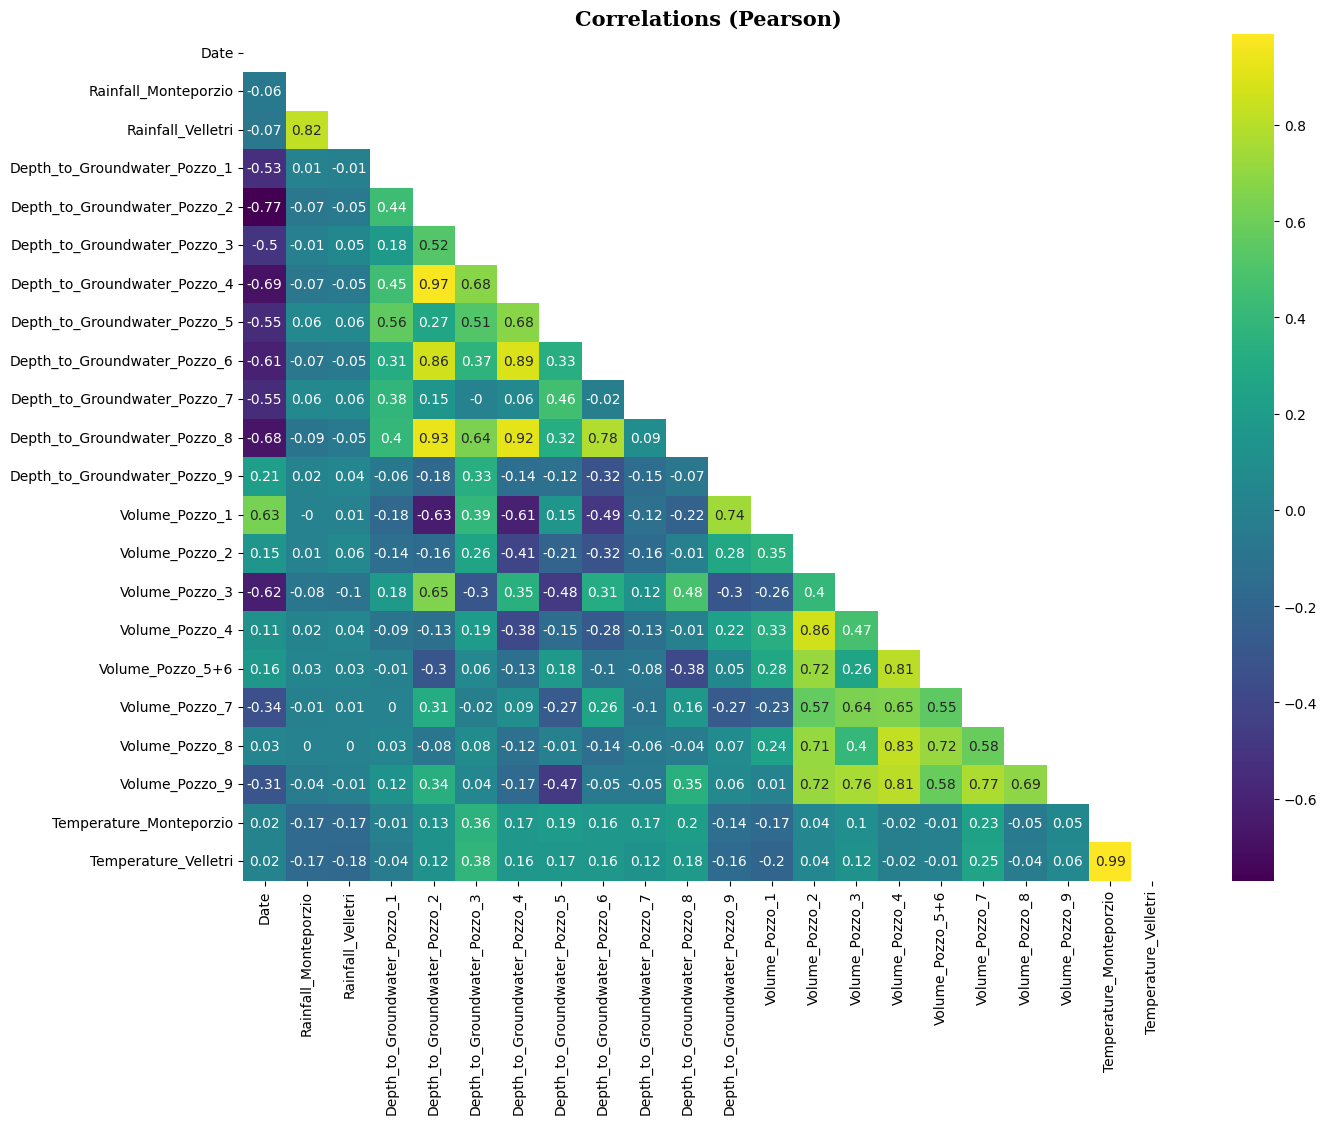

In [25]:
datasets[1]['Date'] = pd.to_datetime(datasets[1]['Date'], dayfirst=True)
corr_plot(datasets[1], 'Aquifer Doganella', (20, 20))

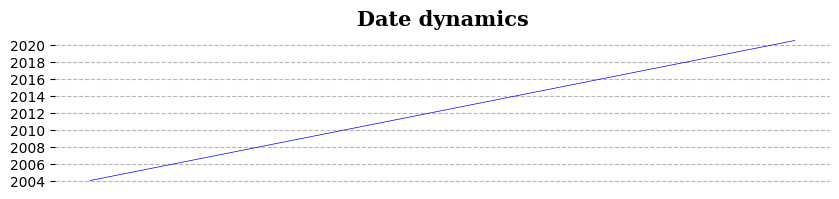

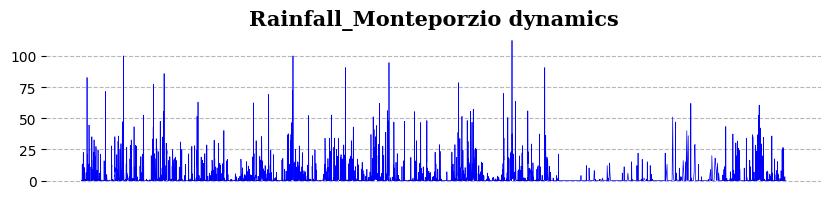

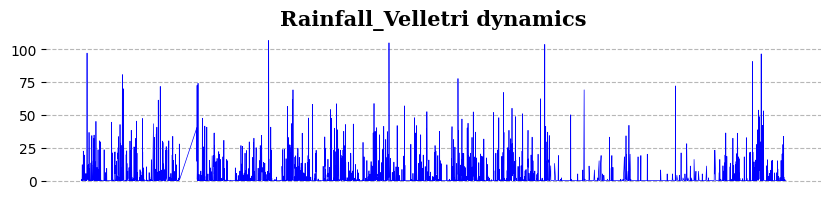

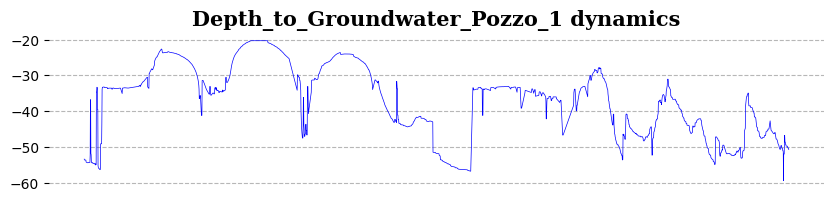

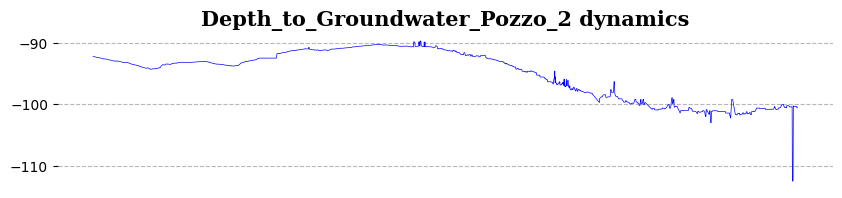

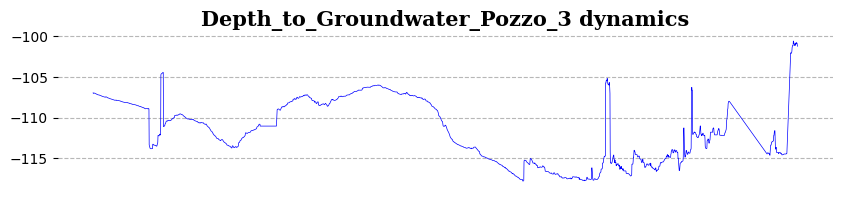

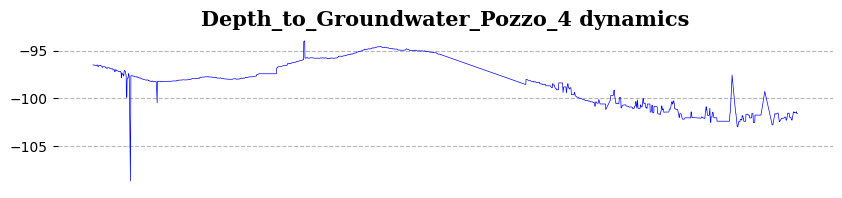

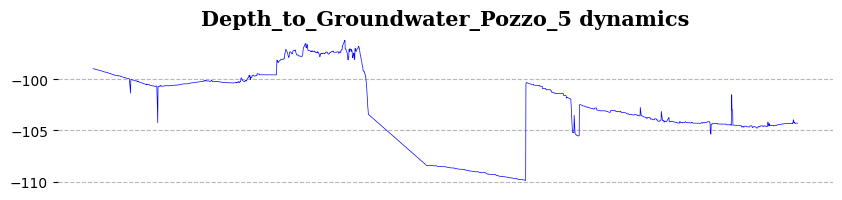

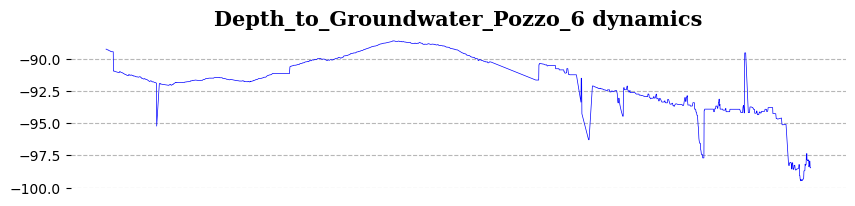

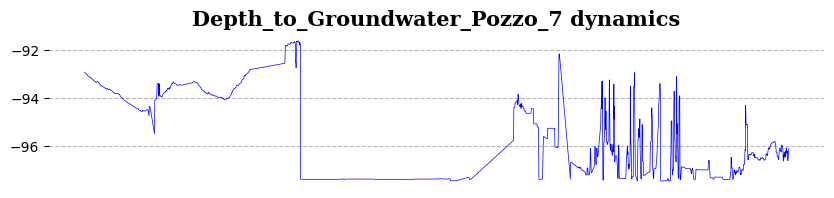

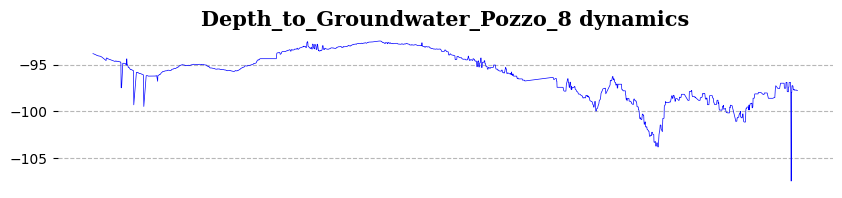

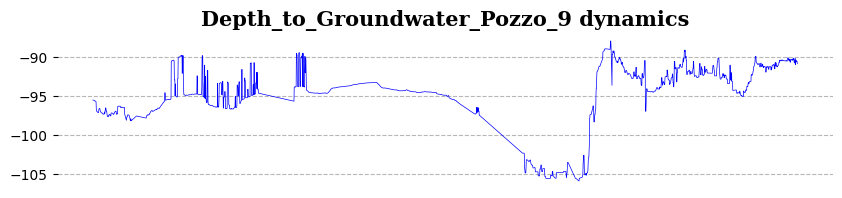

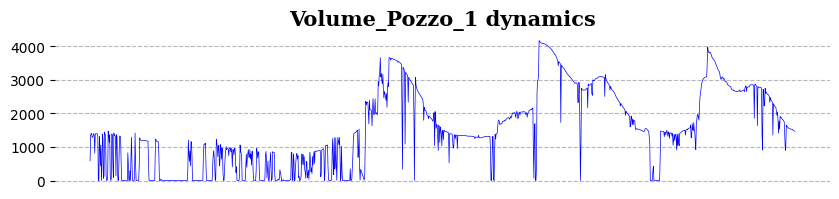

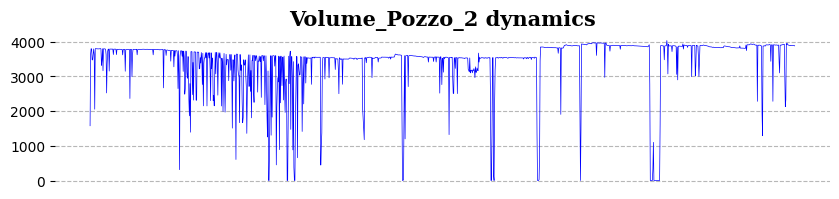

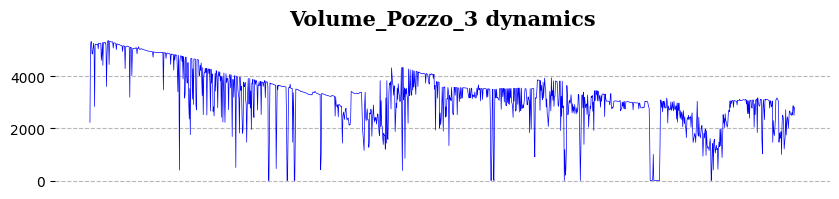

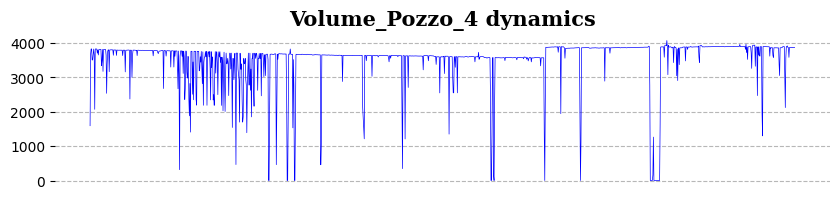

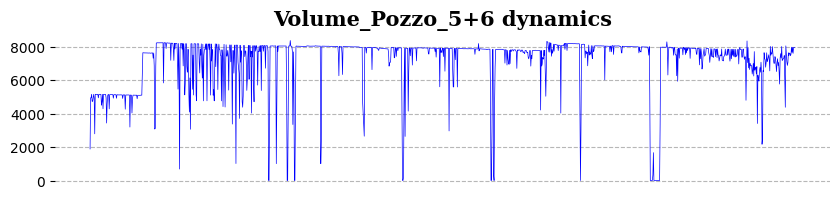

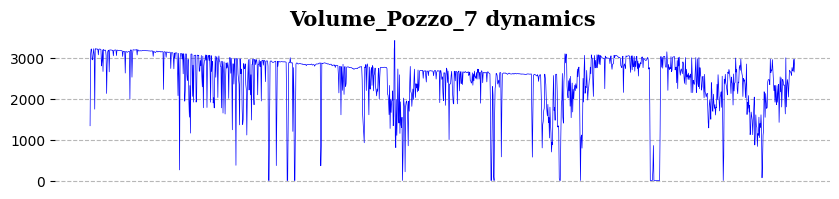

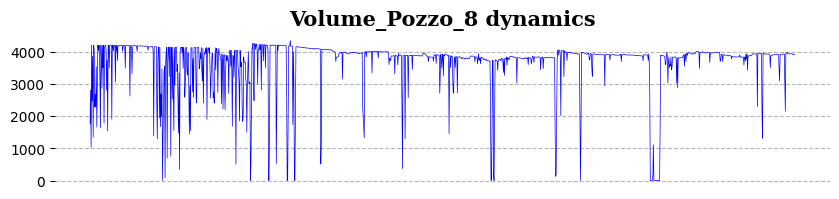

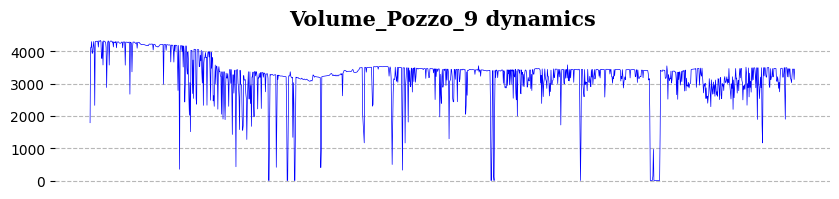

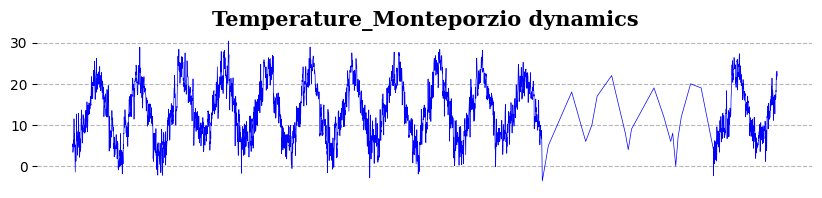

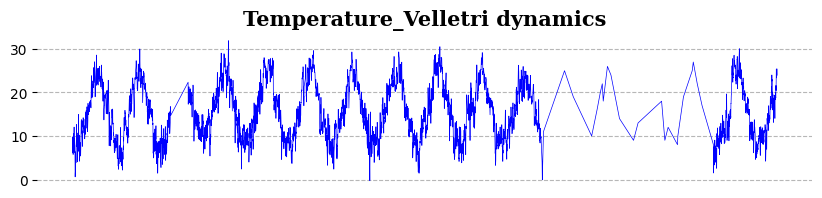

In [26]:
columns_viz(datasets[1], color= 'blue')

In [27]:
doganella_pred = aquifer_doganella
rainfall_doganella = [col for col in doganella_pred.columns if 'Rainfall' in col]
volume_doganella = [col for col in doganella_pred.columns if 'Volume' in col]

doganella_pred['rainfall_mean'] = doganella_pred[rainfall_doganella].mean(axis = 1).values
doganella_pred['volume_mean'] = doganella_pred[volume_doganella].mean(axis = 1).values
doganella_pred = doganella_pred.drop(['Temperature_Monteporzio', 'Temperature_Velletri'], axis = 1)
doganella_pred = doganella_pred.fillna(doganella_pred.interpolate())
doganella_pred = doganella_pred.bfill()




In [28]:
depth = [col for col in doganella_pred.columns if 'Depth_to_Groundwater' in col]

# Splitting the data into features and target
y1 = doganella_pred[depth]
x1 = doganella_pred.drop(depth, axis=1)

x_train_doganella, x_test_doganella, y_train_doganella, y_test_doganella = train_test_split(x1, y1, test_size = 0.2, random_state = 42, shuffle = False)

In [29]:
doganella_params = {'n_estimators': 200,
          'max_depth': 2,
          'subsample': 1,
          'learning_rate': 0.04,
          'random_state': 0,
          'enable_categorical': True}

x_train_doganella['Date'] = x_train_doganella['Date'].astype('category')
x_test_doganella['Date'] = x_test_doganella['Date'].astype('category')

doganella_model = [XGBRegressor(**doganella_params)] * 9
for i in range(9):
    doganella_model[i] = doganella_model[i].fit(x_train_doganella, y_train_doganella.iloc[:, i])



In [30]:
doganella_pred = [0] * 9

for i in range(9):
    doganella_pred[i] = doganella_model[i].predict(x_test_doganella)
    print('MAE value (Depth_to_Groundwater_Pozzo_{}): {}'
          .format(i + 1, round(mean_absolute_error(y_test_doganella.iloc[:, i], doganella_pred[i]), 4)))

MAE value (Depth_to_Groundwater_Pozzo_1): 56.0755
MAE value (Depth_to_Groundwater_Pozzo_2): 2.4902
MAE value (Depth_to_Groundwater_Pozzo_3): 16.5257
MAE value (Depth_to_Groundwater_Pozzo_4): 3.0166
MAE value (Depth_to_Groundwater_Pozzo_5): 6.2274
MAE value (Depth_to_Groundwater_Pozzo_6): 4.2734
MAE value (Depth_to_Groundwater_Pozzo_7): 1.5077
MAE value (Depth_to_Groundwater_Pozzo_8): 1.3895
MAE value (Depth_to_Groundwater_Pozzo_9): 5.8587


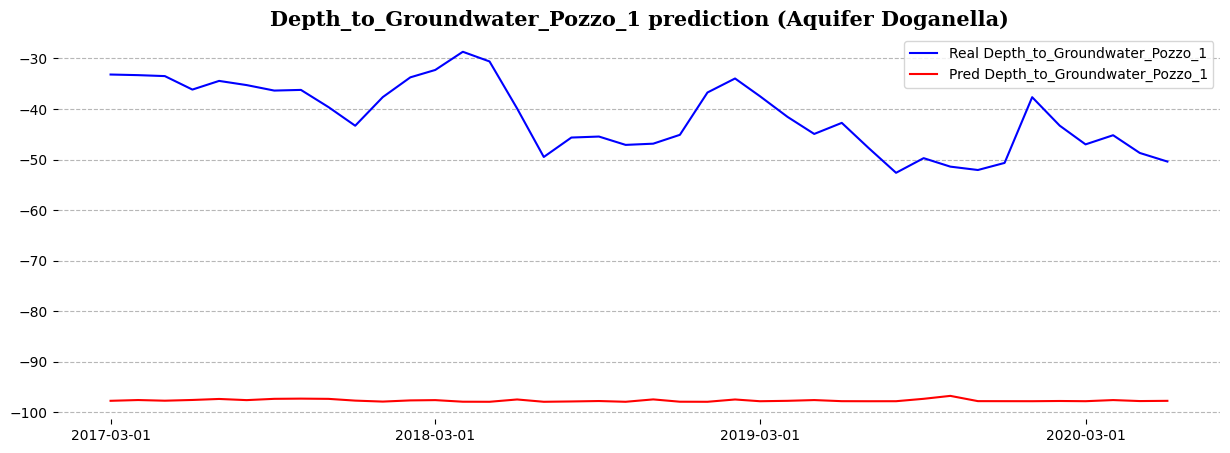

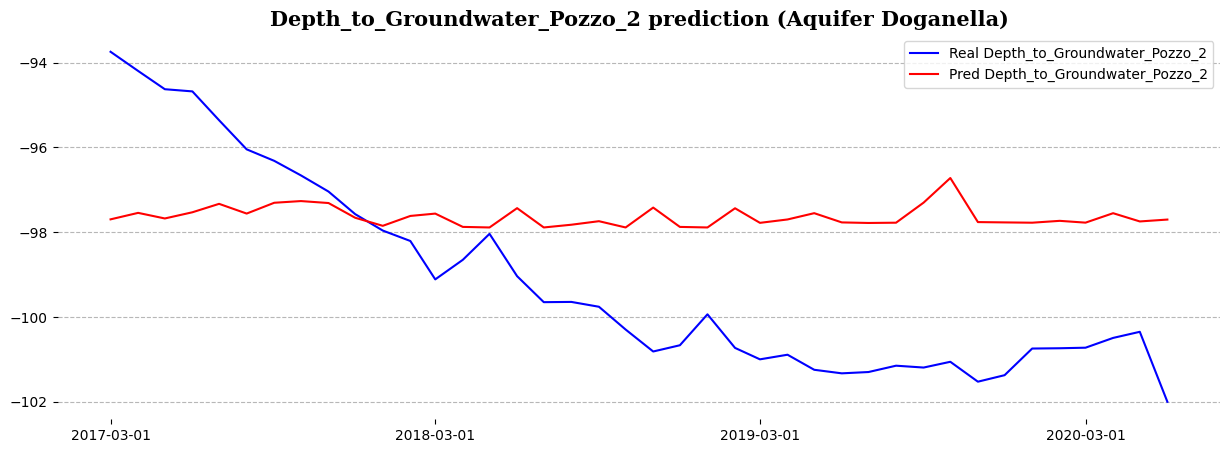

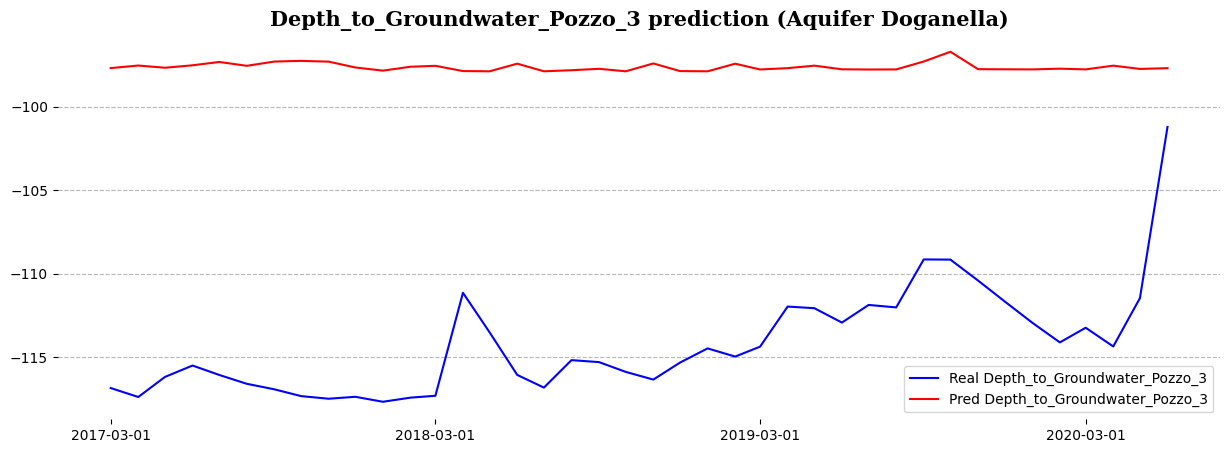

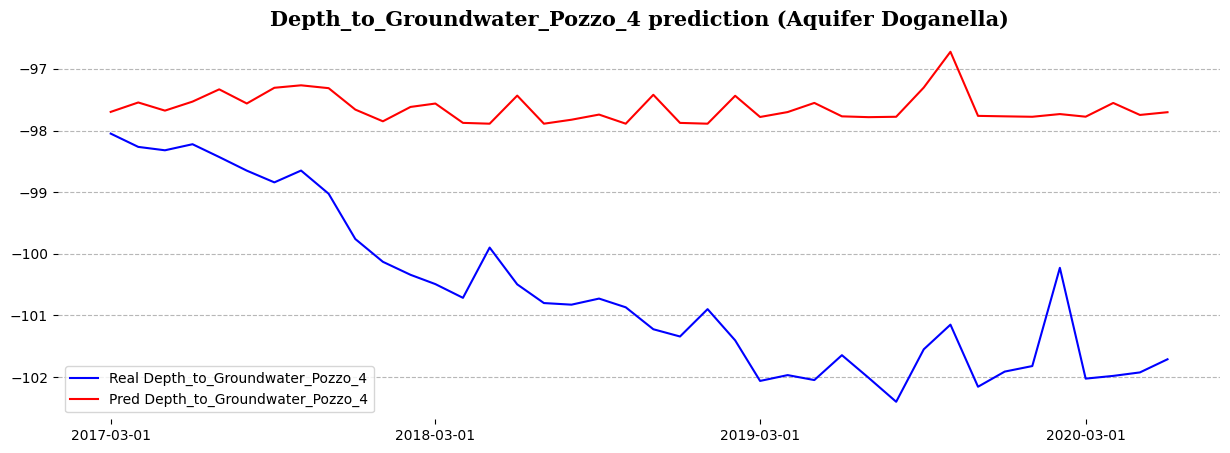

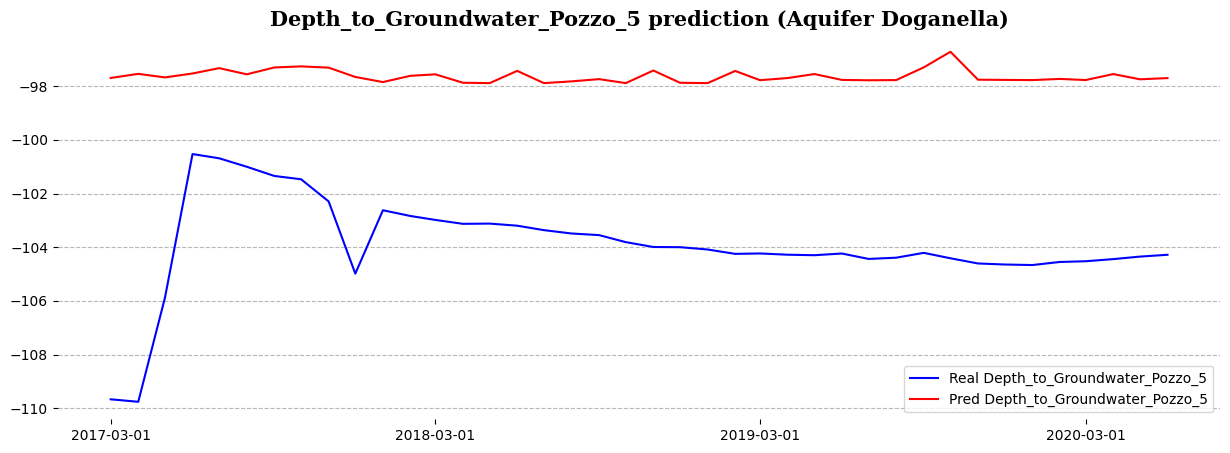

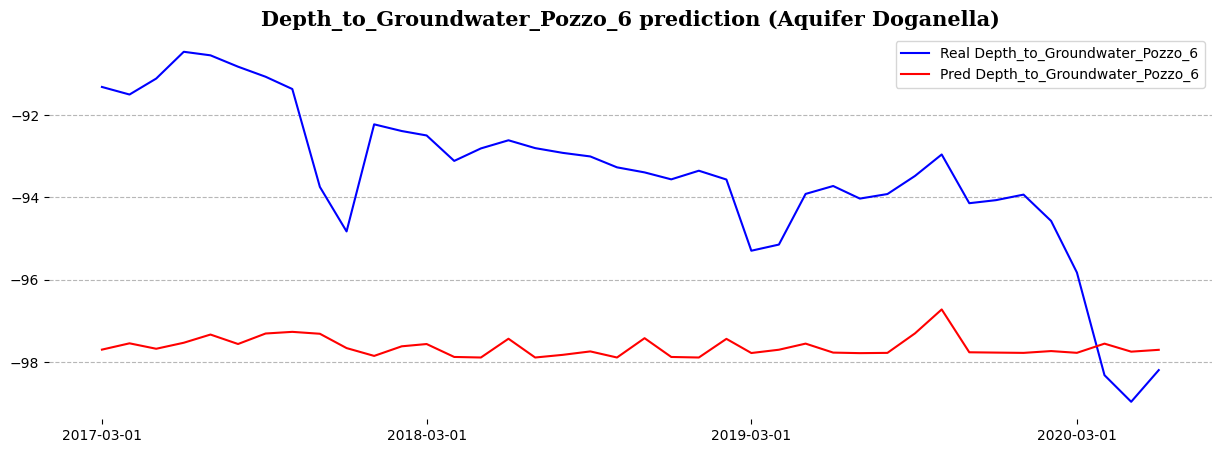

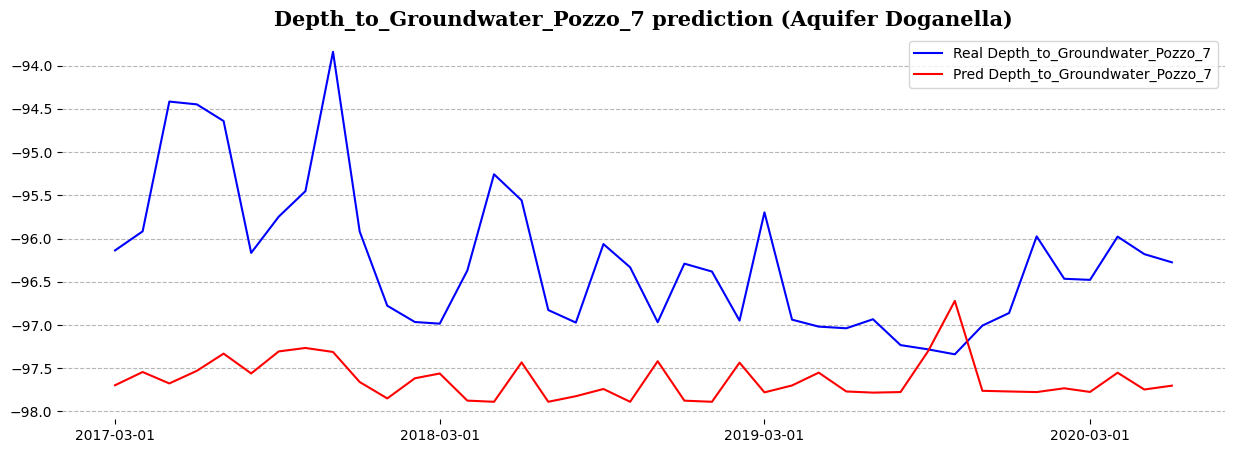

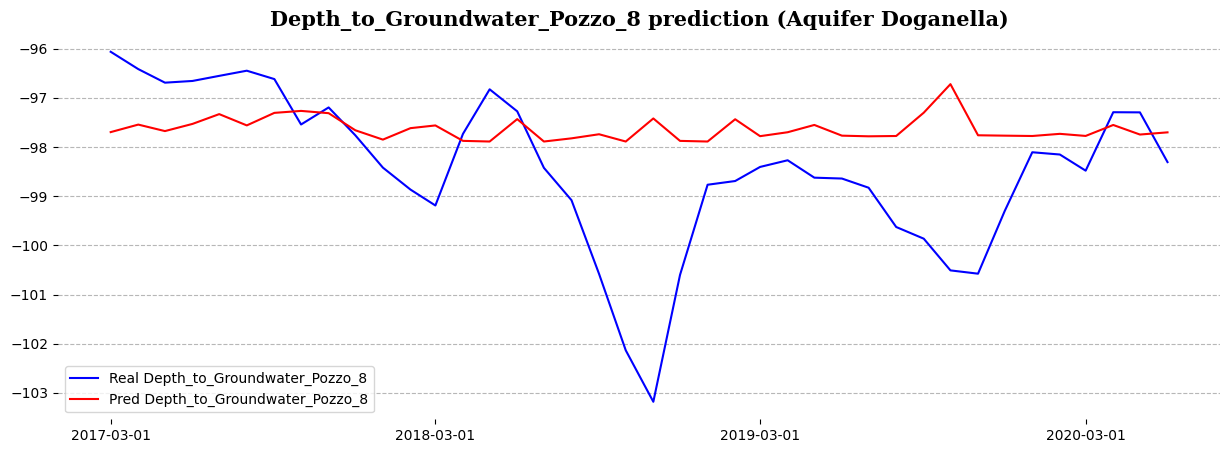

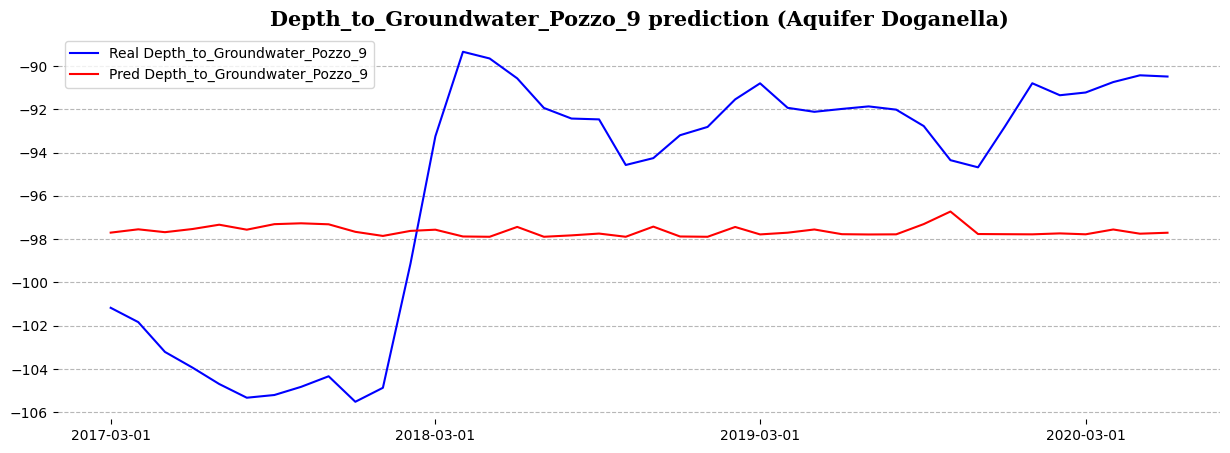

In [31]:
for i in range(9):
    predicted_viz(y_test_doganella.iloc[:, i], doganella_pred[i], f'Depth_to_Groundwater_Pozzo_{i + 1}', 'Aquifer Doganella', aquifer_doganella)


Aquifer Luco

In [32]:
datasets[2].head()

Date  Rainfall_Simignano  Rainfall_Siena_Poggio_al_Vento  \
0  01/01/2000                 NaN                             NaN   
1  02/01/2000                 NaN                             NaN   
2  03/01/2000                 NaN                             NaN   
3  04/01/2000                 NaN                             NaN   
4  05/01/2000                 NaN                             NaN   

   Rainfall_Mensano  Rainfall_Montalcinello  Rainfall_Monticiano_la_Pineta  \
0               NaN                     NaN                            NaN   
1               NaN                     NaN                            NaN   
2               NaN                     NaN                            NaN   
3               NaN                     NaN                            NaN   
4               NaN                     NaN                            NaN   

   Rainfall_Sovicille  Rainfall_Ponte_Orgia  Rainfall_Scorgiano  \
0                 NaN                   NaN                 NaN   
1                 NaN                   NaN                 NaN   
2                 NaN                   NaN                 NaN   
3                 NaN                   NaN                 NaN   
4                 NaN                   NaN                 NaN   

   Rainfall_Pentolina  ...  Depth_to_Groundwater_Pozzo_1  \
0                 NaN  ...                           NaN   
1                 NaN  ...                           NaN   
2                 NaN  ...                           NaN   
3                 NaN  ...                           NaN   
4                 NaN  ...                           NaN   

   Depth_to_Groundwater_Pozzo_3  Depth_to_Groundwater_Pozzo_4  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

   Temperature_Siena_Poggio_al_Vento  Temperature_Mensano  \
0                                0.0                  0.0   
1                                0.0                  0.0   
2                                0.0                  0.0   
3                                0.0                  0.0   
4                                0.0                  0.0   

   Temperature_Pentolina  Temperature_Monteroni_Arbia_Biena  Volume_Pozzo_1  \
0                   5.50                               0.80             NaN   
1                   6.20                               3.25             NaN   
2                   7.25                               0.95             NaN   
3                   7.00                               4.20             NaN   
4                   7.90                               6.55             NaN   

   Volume_Pozzo_3  Volume_Pozzo_4  
0             NaN             NaN  
1             NaN             NaN  
2             NaN             NaN  
3             NaN             NaN  
4             NaN             NaN  

[5 rows x 22 columns]

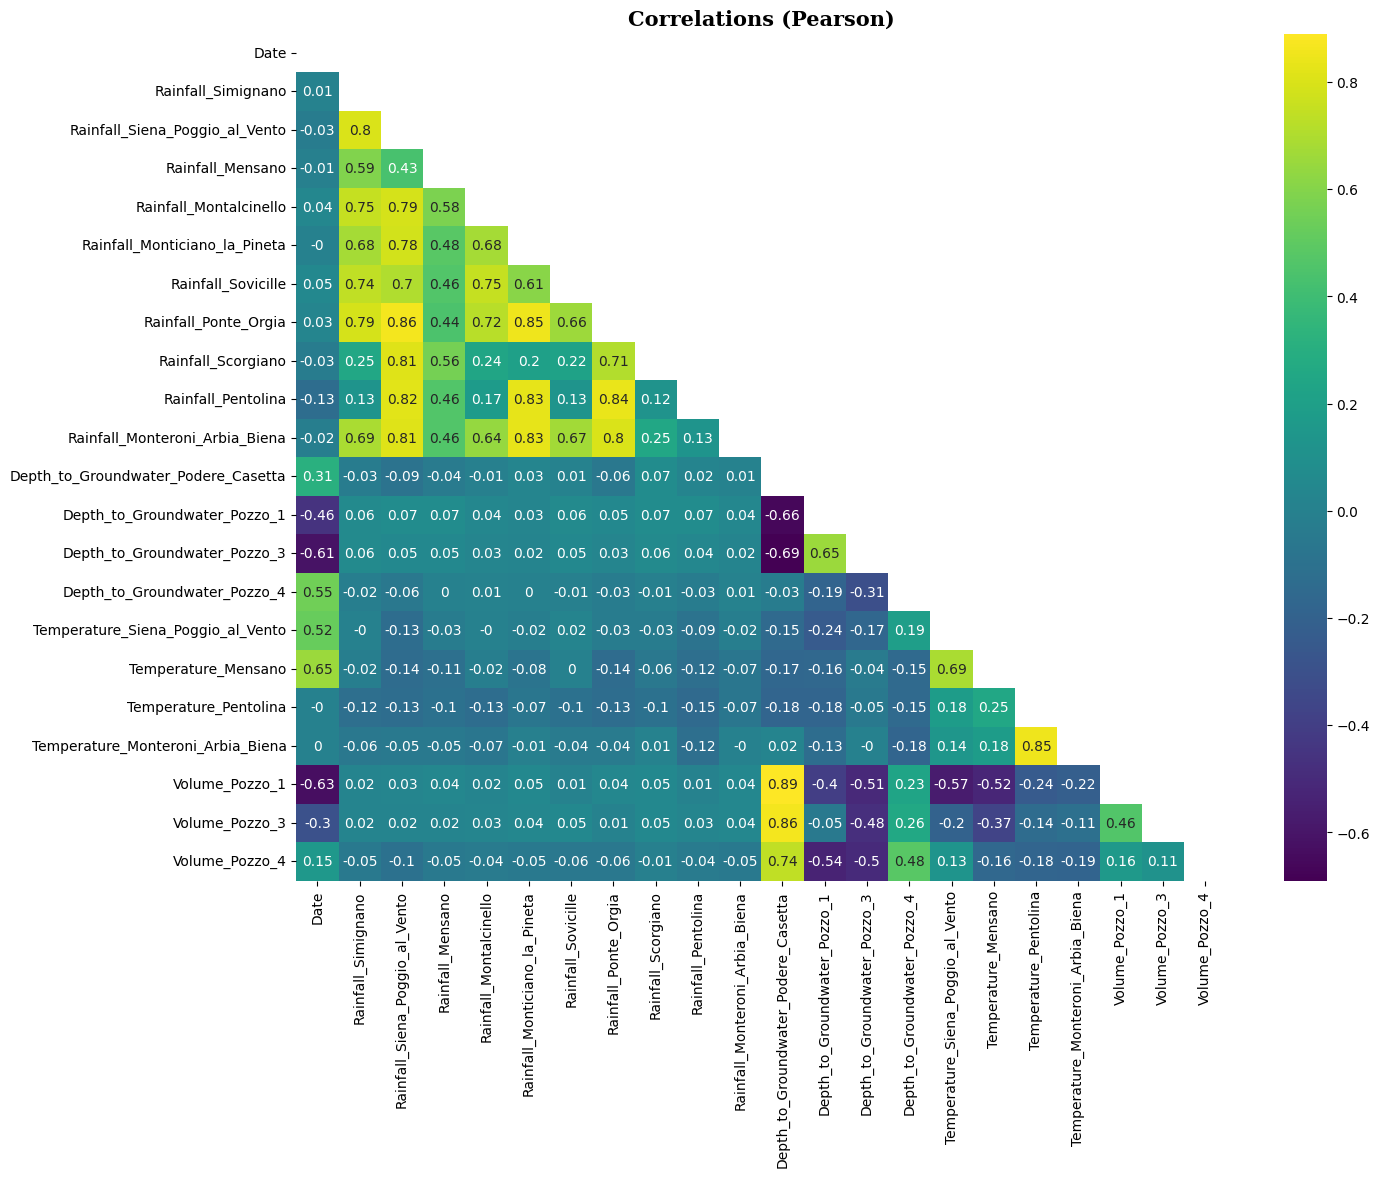

In [33]:
datasets[2]['Date'] = pd.to_datetime(datasets[2]['Date'], dayfirst=True)
corr_plot(datasets[2], 'Aquifer Luco', (20, 20))

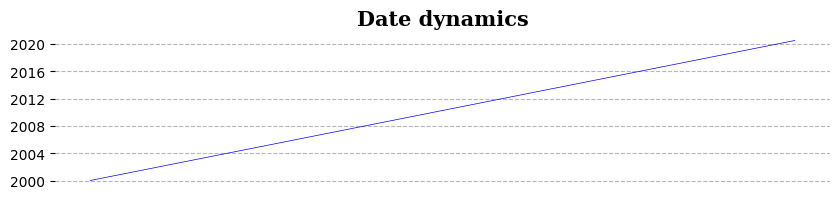

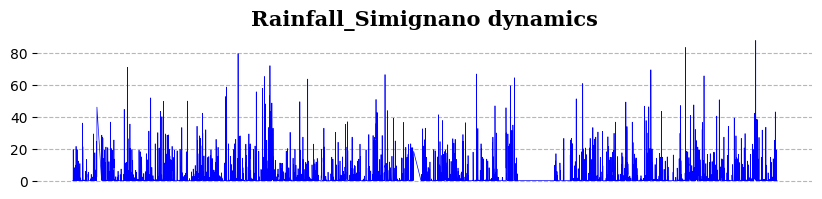

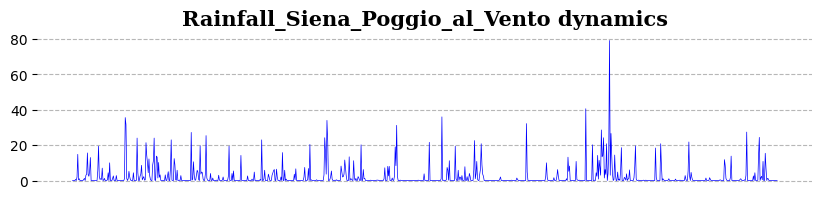

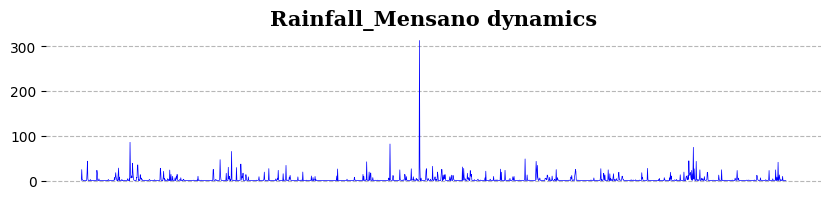

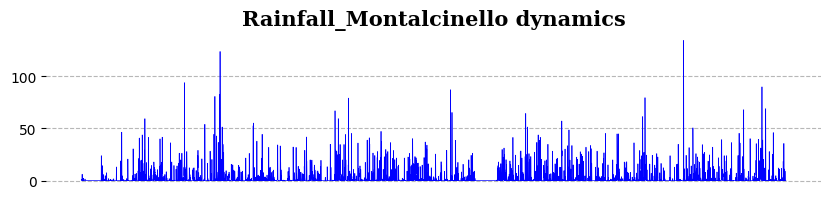

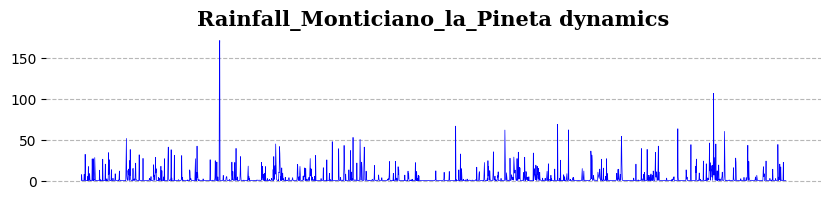

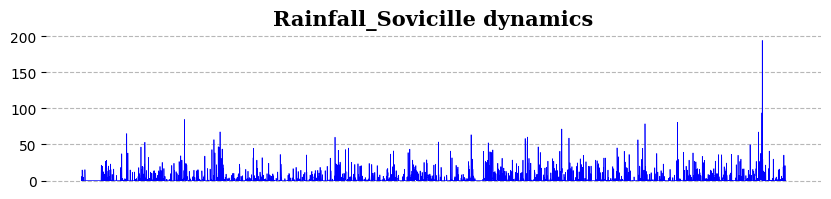

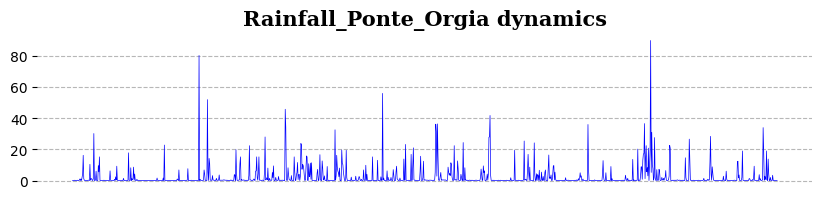

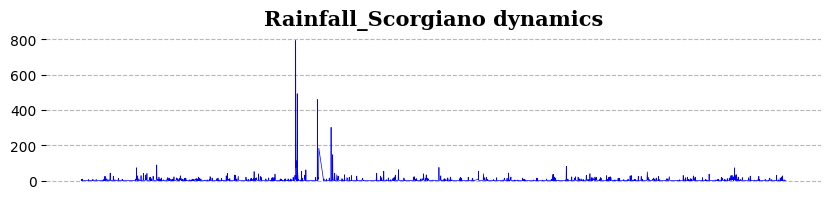

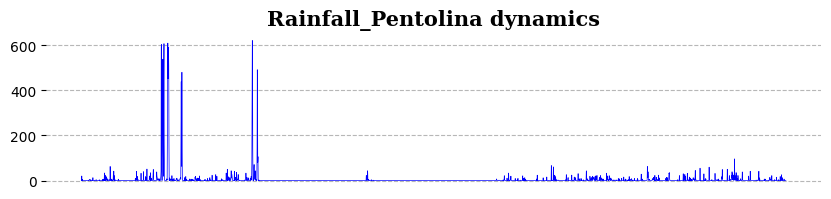

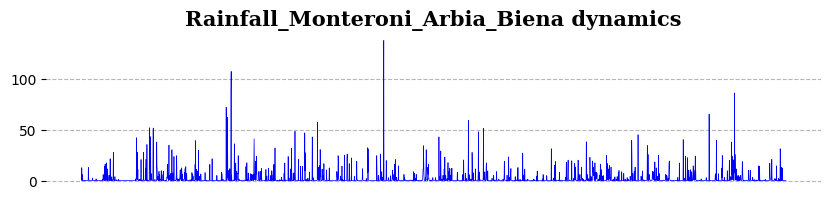

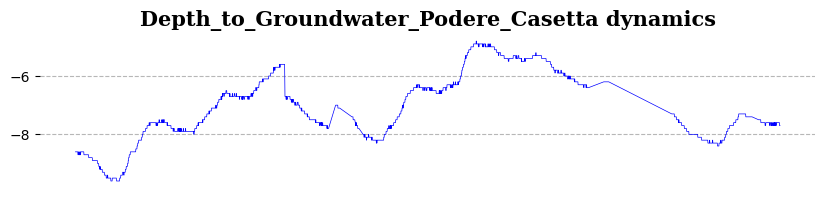

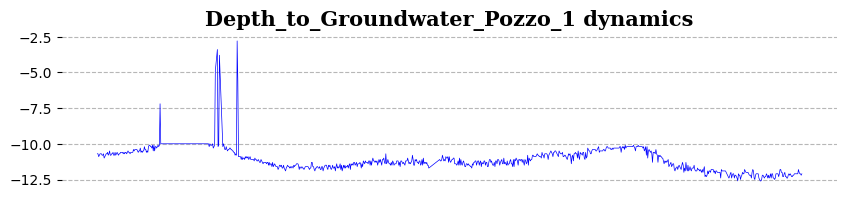

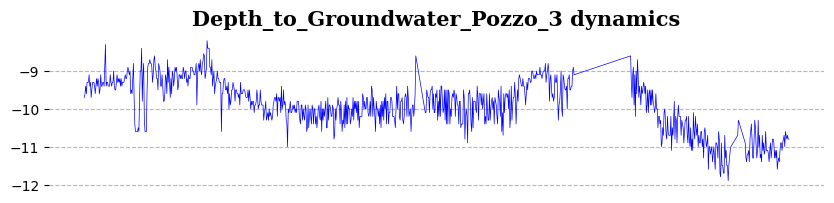

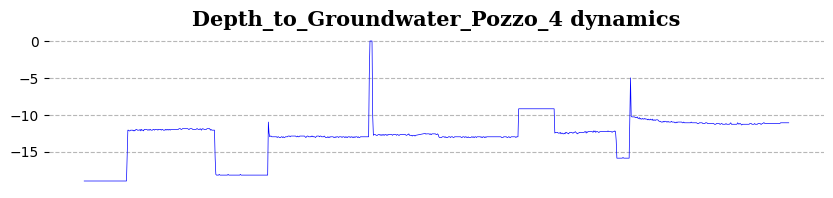

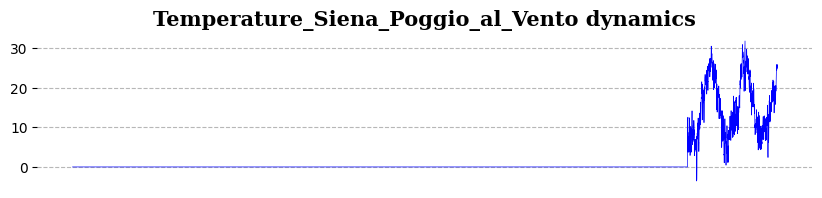

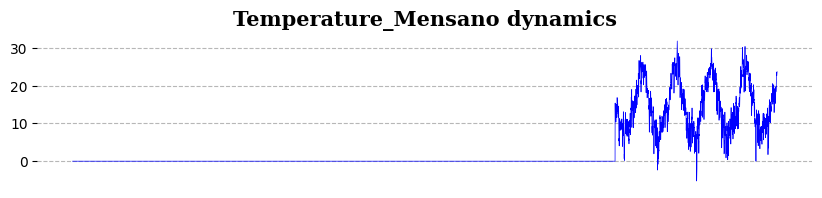

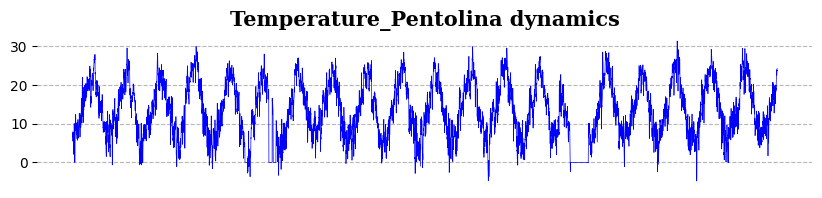

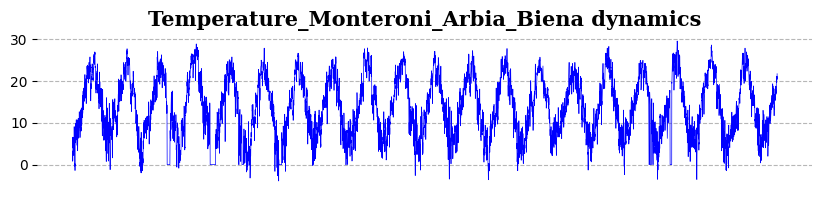

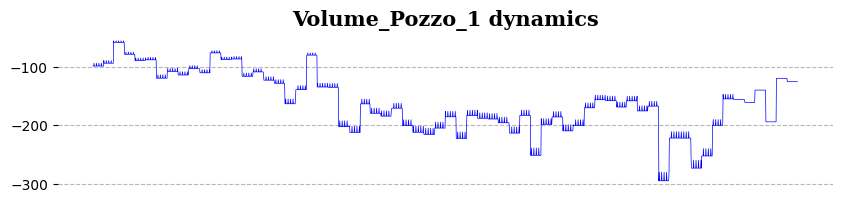

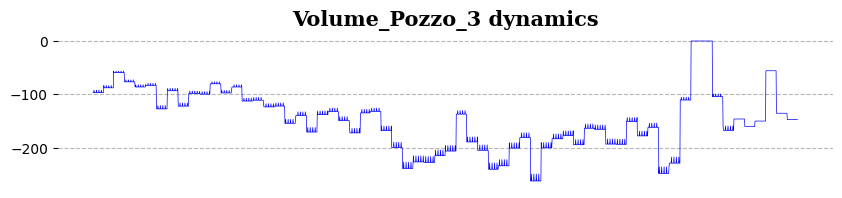

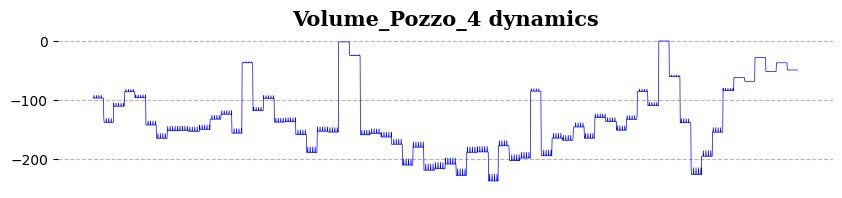

In [34]:
columns_viz(datasets[2], color= 'blue')

In [35]:
target_var = 'Depth_to_Groundwater_Podere_Casetta'
aquifer_luco[target_var] = aquifer_luco[target_var].interpolate()

aquifer_luco = aquifer_luco.dropna(subset=[target_var])

In [36]:
luco_pred = aquifer_luco
rainfall_luco = [col for col in luco_pred.columns if 'Rainfall' in col]
temperature_luco = [col for col in luco_pred.columns if 'Temperature' in col]

luco_pred['rainfall_sum'] = luco_pred[rainfall_luco].sum(axis = 1).values
luco_pred['temperature_mean'] = luco_pred[temperature_luco].mean(axis = 1).values
luco_pred = luco_pred.drop(['Rainfall_Siena_Poggio_al_Vento', 'Rainfall_Mensano',
                        'Rainfall_Monticiano_la_Pineta', 'Rainfall_Ponte_Orgia',
                        'Rainfall_Scorgiano', 'Rainfall_Pentolina',
                        'Rainfall_Monteroni_Arbia_Biena',
                        'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_3',
                        'Depth_to_Groundwater_Pozzo_4', 'Temperature_Siena_Poggio_al_Vento', 
                        'Temperature_Mensano', 'Volume_Pozzo_1',
                        'Volume_Pozzo_3', 'Volume_Pozzo_4'], axis = 1)
luco_pred = luco_pred.fillna(luco_pred.interpolate())

luco_pred.shape

C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1098352233.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  luco_pred['rainfall_sum'] = luco_pred[rainfall_luco].sum(axis = 1).values
C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\1098352233.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  luco_pred['temperature_mean'] = luco_pred[temperature_luco].mean(axis = 1).values


(4514, 9)

In [37]:
y2 = luco_pred[['Depth_to_Groundwater_Podere_Casetta']]
x2 = luco_pred.drop(['Depth_to_Groundwater_Podere_Casetta'], axis = 1)

x_train_luco, x_test_luco, y_train_luco, y_test_luco = train_test_split(x2, y2, test_size = 0.2, random_state = 42, shuffle = False)

In [38]:
luco_params = {'n_estimators': 200,
            'max_depth': 2,
            'subsample': 1,
            'learning_rate': 0.04,
            'random_state': 0,
            'enable_categorical': True}

x_train_luco['Date'] = x_train_luco['Date'].astype('category')
x_test_luco['Date'] = x_test_luco['Date'].astype('category')

luco_model = XGBRegressor(**luco_params)

luco_model.fit(x_train_luco, y_train_luco)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [39]:
luco_y_pred = luco_model.predict(x_test_luco)

print('MAE value: ', mean_absolute_error(y_test_luco, luco_y_pred))

MAE value:  0.6996361653274081


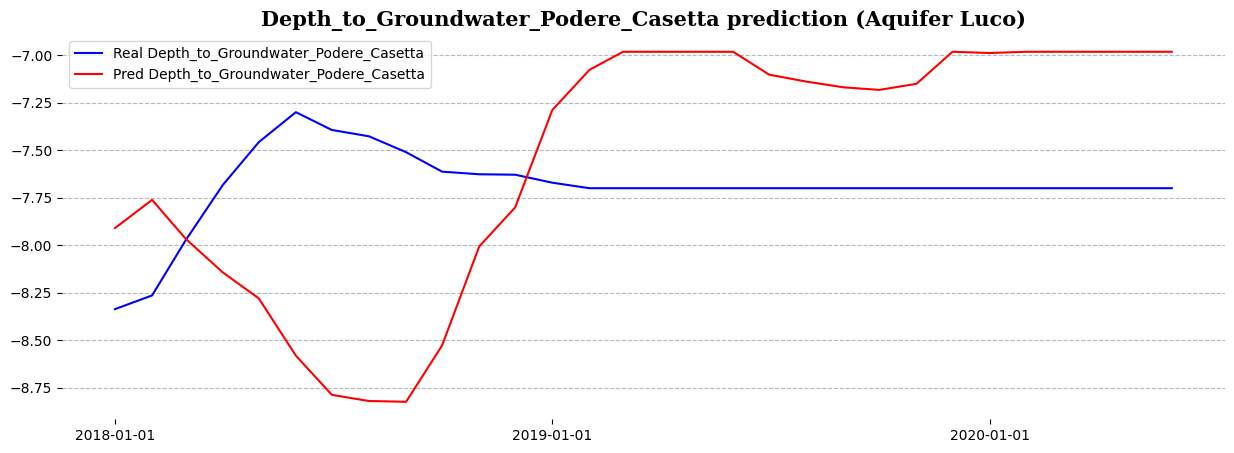

In [40]:
predicted_viz(y_test_luco, luco_y_pred, 'Depth_to_Groundwater_Podere_Casetta', 'Aquifer Luco', aquifer_luco)


Aquifer Petrignano

In [41]:
datasets[3].head()

Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0  14/03/2006                    NaN                    -22.48   
1  15/03/2006                    NaN                    -22.38   
2  16/03/2006                    NaN                    -22.25   
3  17/03/2006                    NaN                    -22.38   
4  18/03/2006                    NaN                    -22.60   

   Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  Temperature_Petrignano  \
0                    -22.18                       NaN                     NaN   
1                    -22.14                       NaN                     NaN   
2                    -22.04                       NaN                     NaN   
3                    -22.04                       NaN                     NaN   
4                    -22.04                       NaN                     NaN   

   Volume_C10_Petrignano  Hydrometry_Fiume_Chiascio_Petrignano  
0                    NaN                                   NaN  
1                    NaN                                   NaN  
2                    NaN                                   NaN  
3                    NaN                                   NaN  
4                    NaN                                   NaN

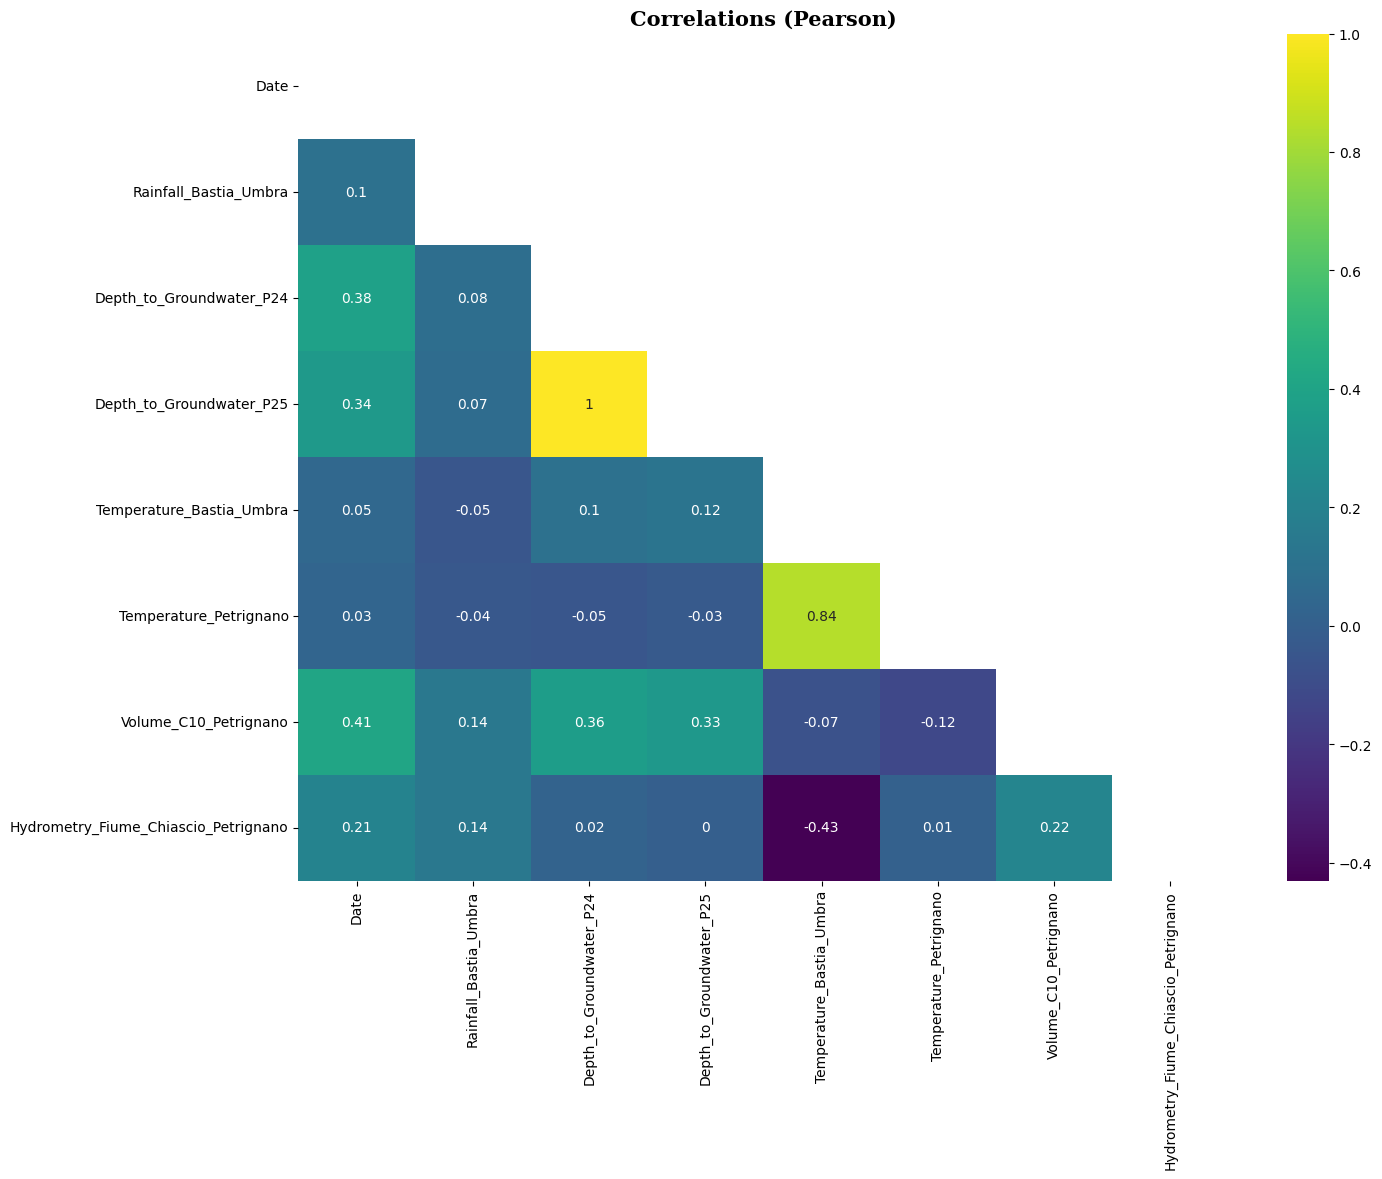

In [42]:
datasets[3]['Date'] = pd.to_datetime(datasets[3]['Date'], dayfirst=True)
corr_plot(datasets[3], 'Aquifer Petrignano', (20, 20))

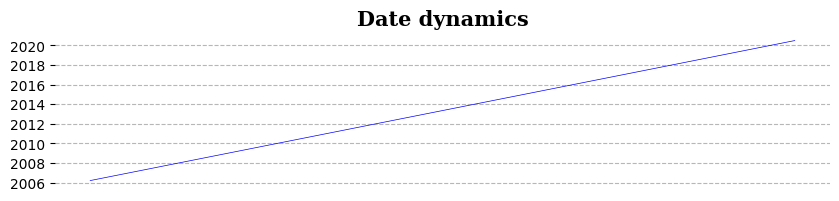

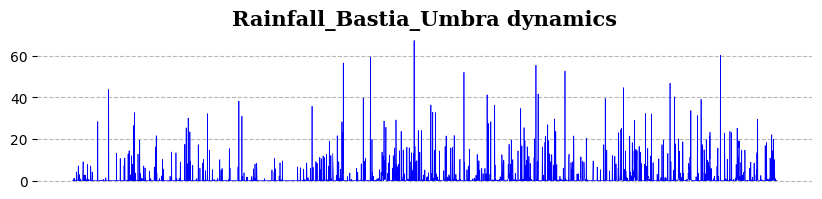

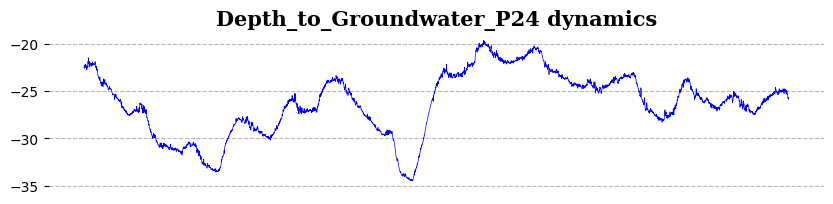

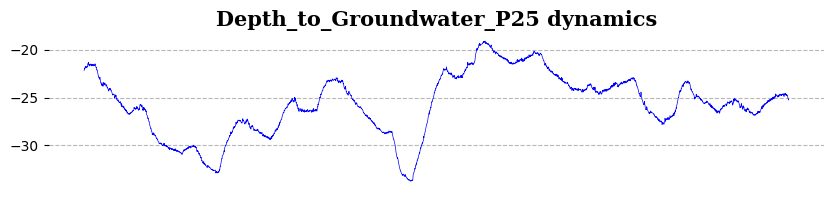

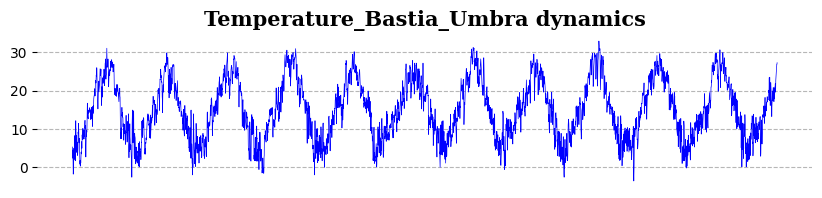

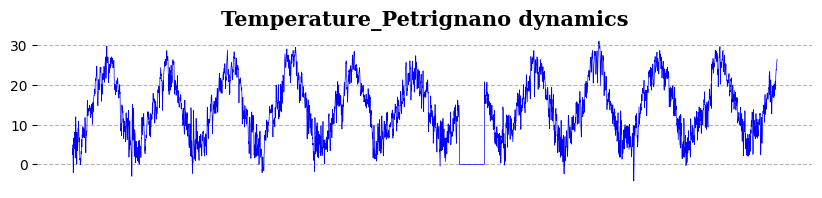

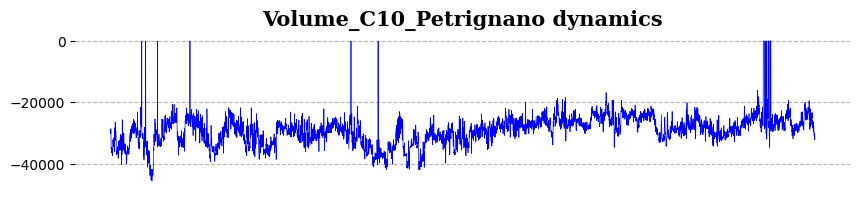

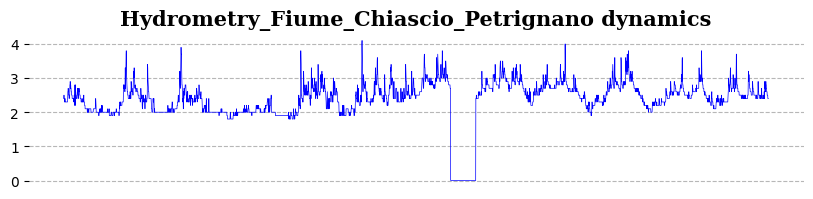

In [43]:
columns_viz(datasets[3], color= 'blue')

In [44]:
petrignano_pred = aquifer_petrignano
temperatute_petrignano = [col for col in petrignano_pred.columns if 'Temperature' in col]

petrignano_pred['temperature_mean'] = petrignano_pred[temperatute_petrignano].mean(axis = 1).values
petrignano_pred = petrignano_pred.dropna()

petrignano_pred.shape

(4150, 9)

In [45]:
y3_p24 = petrignano_pred['Depth_to_Groundwater_P24']
y3_p25 = petrignano_pred['Depth_to_Groundwater_P25']
x3 = petrignano_pred.drop(['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25'], axis = 1)

x_train_petrignano_p24, x_test_petrignano_p24, y_train_petrignano_p24, y_test_petrignano_p24 = train_test_split(x3, y3_p24, test_size = 0.2, random_state = 42, shuffle = False)
x_train_petrignano_p25, x_test_petrignano_p25, y_train_petrignano_p25, y_test_petrignano_p25 = train_test_split(x3, y3_p25, test_size = 0.2, random_state = 42, shuffle = False)



x_train_petrignano_p24['Date'] = pd.to_datetime(x_train_petrignano_p24['Date'])
x_test_petrignano_p25['Date'] = pd.to_datetime(x_test_petrignano_p25['Date'])
x_test_petrignano_p24['Date'] = pd.to_datetime(x_test_petrignano_p24['Date'])
x_test_petrignano_p25['Date'] = pd.to_datetime(x_test_petrignano_p25['Date'])

x_train_petrignano_p24['Year'] = x_train_petrignano_p24['Date'].dt.year
x_train_petrignano_p24['Month'] = x_train_petrignano_p24['Date'].dt.month
x_train_petrignano_p24['Day'] = x_train_petrignano_p24['Date'].dt.day

x_train_petrignano_p25['Year'] = x_train_petrignano_p25['Date'].dt.year
x_train_petrignano_p25['Month'] = x_train_petrignano_p25['Date'].dt.month
x_train_petrignano_p25['Day'] = x_train_petrignano_p25['Date'].dt.day

x_test_petrignano_p24['Year'] = x_test_petrignano_p24['Date'].dt.year
x_test_petrignano_p24['Month'] = x_test_petrignano_p24['Date'].dt.month
x_test_petrignano_p24['Day'] = x_test_petrignano_p24['Date'].dt.day

x_test_petrignano_p25['Year'] = x_test_petrignano_p25['Date'].dt.year
x_test_petrignano_p25['Month'] = x_test_petrignano_p25['Date'].dt.month
x_test_petrignano_p25['Day'] = x_test_petrignano_p25['Date'].dt.day

x_train_petrignano_p24 = x_train_petrignano_p24.drop('Date', axis=1)
x_test_petrignano_p24 = x_test_petrignano_p24.drop('Date', axis=1)

x_train_petrignano_p25 = x_train_petrignano_p25.drop('Date', axis=1)
x_test_petrignano_p25 = x_test_petrignano_p25.drop('Date', axis=1)

petrignano_params = {'n_estimators': 200, 
                        'max_depth': 2,
                        'subsample': 1,
                        'learning_rate': 0.04,
                        'random_state': 0,
                        'enable_categorical': True}

petrignano_model_p24 = XGBRegressor(**petrignano_params)

petrignano_model_p24.fit(x_train_petrignano_p24, y_train_petrignano_p24)

petrignano_model_p25 = XGBRegressor(**petrignano_params)

petrignano_model_p25.fit(x_train_petrignano_p25, y_train_petrignano_p25)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [46]:
petrignano_pred_p24 = petrignano_model_p24.predict(x_test_petrignano_p24)
petrignano_pred_p25 = petrignano_model_p25.predict(x_test_petrignano_p25)

print('MAE value (Depth_to_Groundwater_P24): ', mean_absolute_error(y_test_petrignano_p24, petrignano_pred_p24))
print('MAE value (Depth_to_Groundwater_P25): ', mean_absolute_error(y_test_petrignano_p25, petrignano_pred_p25))

MAE value (Depth_to_Groundwater_P24):  1.1685788850899204
MAE value (Depth_to_Groundwater_P25):  1.1255651171580856


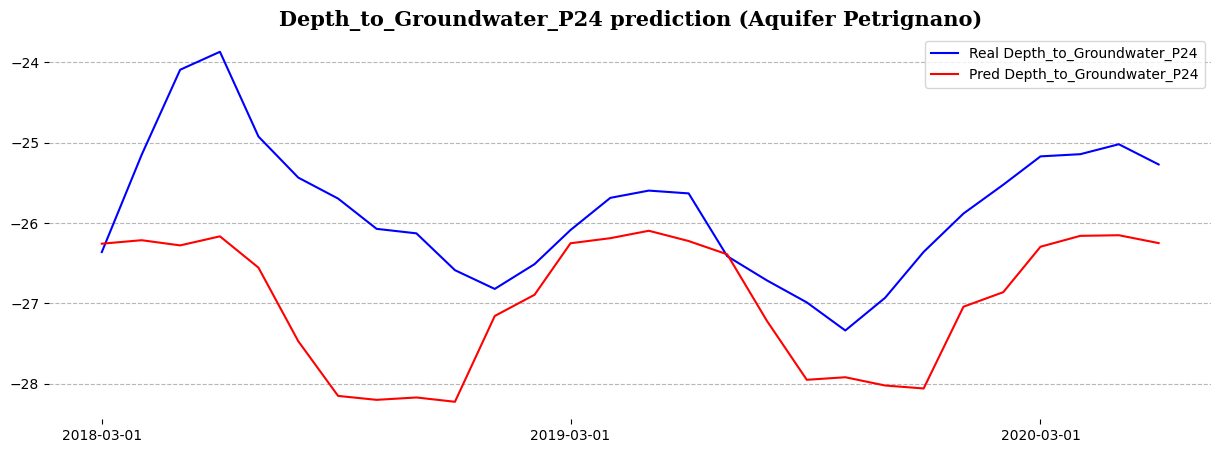

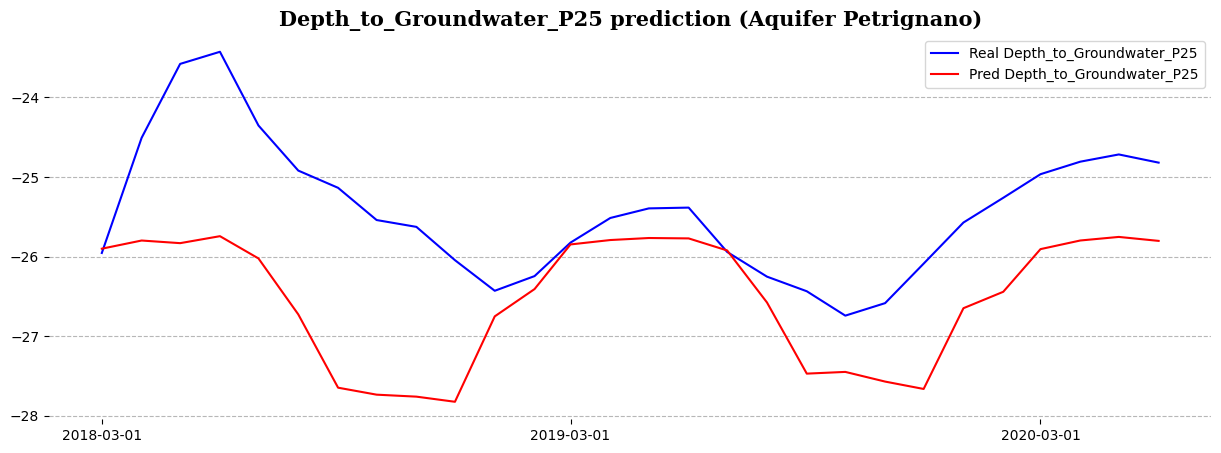

In [47]:
predicted_viz(y_test_petrignano_p24, petrignano_pred_p24, 'Depth_to_Groundwater_P24', 'Aquifer Petrignano', aquifer_petrignano)
predicted_viz(y_test_petrignano_p25, petrignano_pred_p25, 'Depth_to_Groundwater_P25', 'Aquifer Petrignano', aquifer_petrignano)

Lake Biliancino

In [48]:
datasets[4].head()

Date  Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
0  03/06/2002               NaN               NaN               NaN   
1  04/06/2002               NaN               NaN               NaN   
2  05/06/2002               NaN               NaN               NaN   
3  06/06/2002               NaN               NaN               NaN   
4  07/06/2002               NaN               NaN               NaN   

   Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  Lake_Level  \
0                 NaN                NaN                   NaN      249.43   
1                 NaN                NaN                   NaN      249.43   
2                 NaN                NaN                   NaN      249.43   
3                 NaN                NaN                   NaN      249.43   
4                 NaN                NaN                   NaN      249.44   

   Flow_Rate  
0       0.31  
1       0.31  
2       0.31  
3       0.31  
4       0.31

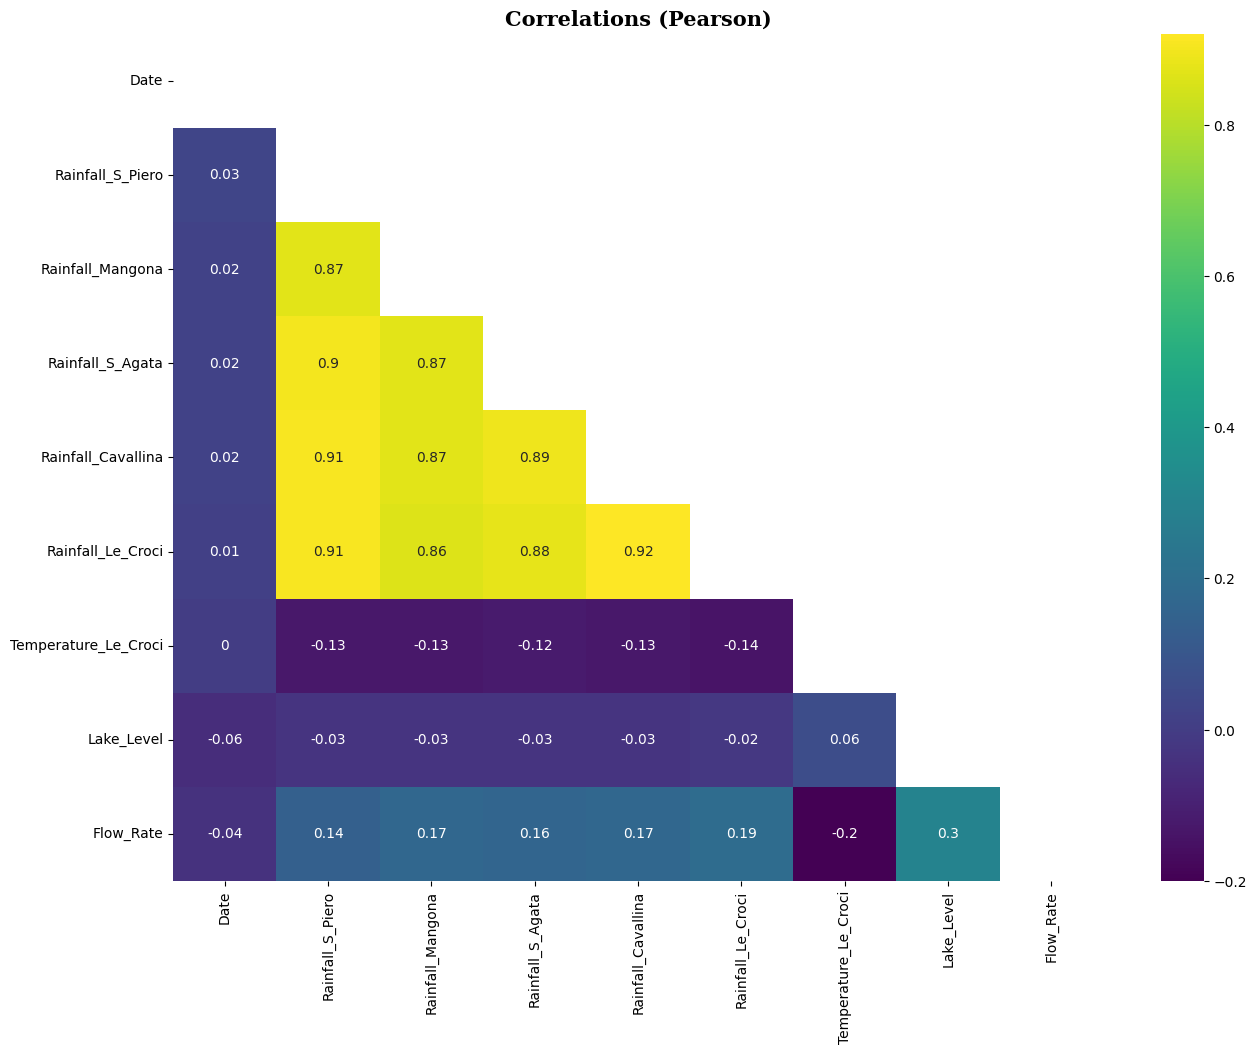

In [49]:
datasets[4]['Date'] = pd.to_datetime(datasets[4]['Date'], dayfirst=True)
corr_plot(datasets[4], 'Lake Biliancino', (20, 20))

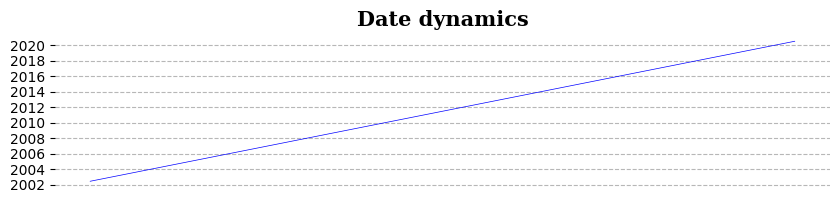

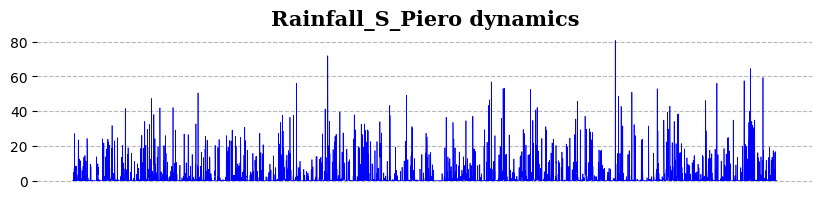

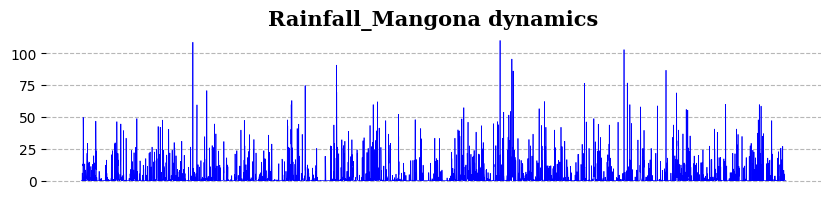

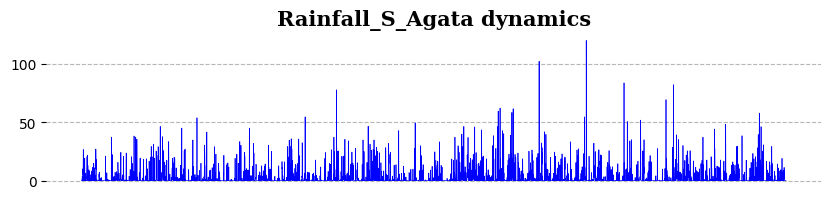

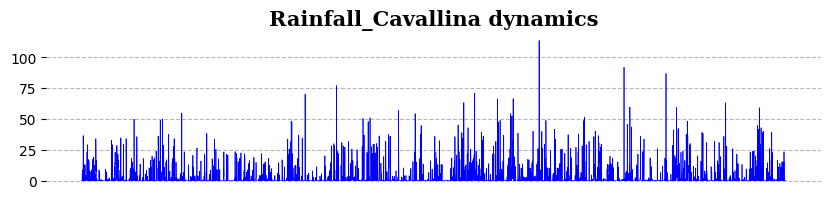

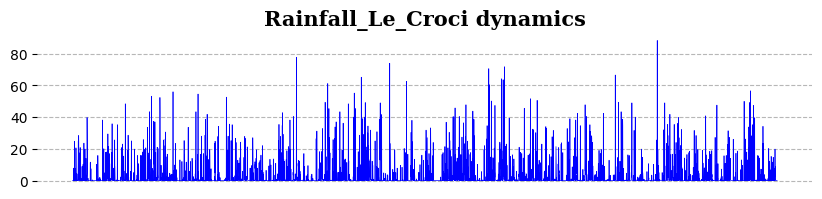

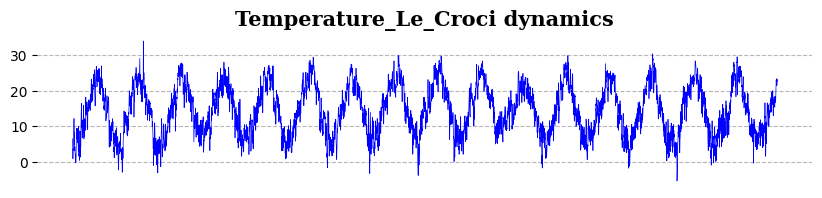

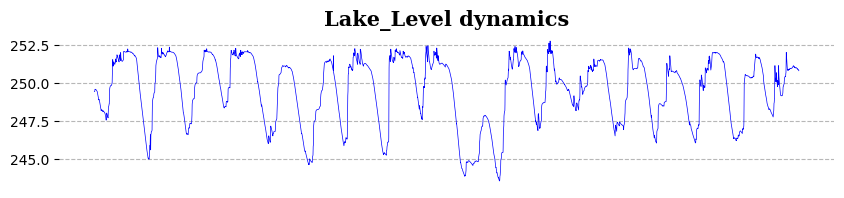

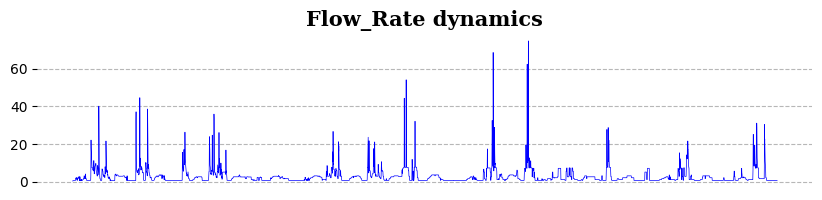

In [50]:
columns_viz(datasets[4], color= 'blue')

In [51]:
biliancino_pred = lake_biliancino
biliancino_pred['Date'] = pd.to_datetime(biliancino_pred['Date'])
biliancino_pred['Year'] = biliancino_pred['Date'].dt.year
biliancino_pred['Month'] = biliancino_pred['Date'].dt.month
biliancino_pred['Day'] = biliancino_pred['Date'].dt.day

biliancino_pred = biliancino_pred.drop('Date', axis=1)

rainfall_biliancino = [col for col in biliancino_pred.columns if 'Rainfall' in col]

biliancino_pred['rainfall_mean'] = biliancino_pred[rainfall_biliancino].mean(axis = 1).values


In [52]:
y_level_biliancino = biliancino_pred['Lake_Level']
y_flow_biliancino = biliancino_pred['Flow_Rate']
x4 = biliancino_pred.drop(['Lake_Level', 'Flow_Rate'], axis = 1)

valid_indices = y_flow_biliancino.dropna().index
y_flow_biliancino_cleaned = y_flow_biliancino.loc[valid_indices]
x4_cleaned = x4.loc[valid_indices]

x_train_biliancino_level, x_test_biliancino_level, y_train_biliancino_level, y_test_biliancino_level = train_test_split(x4, y_level_biliancino, test_size=0.2, random_state=42, shuffle=False)
x_train_biliancino_flow, x_test_biliancino_flow, y_train_biliancino_flow, y_test_biliancino_flow = train_test_split(x4_cleaned, y_flow_biliancino_cleaned, test_size=0.2, random_state=42, shuffle=False)

In [53]:
params_biliancino = {'n_estimators': 200,
            'max_depth': 2,
            'subsample': 1,
            'learning_rate': 0.04,
            'random_state': 0,
            'enable_categorical': True}



model_level_biliancino = XGBRegressor(**params_biliancino)
model_flow_biliancino = XGBRegressor(**params_biliancino)

model_level_biliancino.fit(x_train_biliancino_level, y_train_biliancino_level)
model_flow_biliancino.fit(x_train_biliancino_flow, y_train_biliancino_flow)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [54]:
biliancino_pred_level = model_level_biliancino.predict(x_test_biliancino_level)
biliancino_pred_flow = model_flow_biliancino.predict(x_test_biliancino_flow)

print('MAE value (Lake_Level): ', mean_absolute_error(y_test_biliancino_level, biliancino_pred_level))
print('MAE value (Flow_Rate): ', mean_absolute_error(y_test_biliancino_flow, biliancino_pred_flow))

MAE value (Lake_Level):  0.759034813325753
MAE value (Flow_Rate):  2.1739914816583066


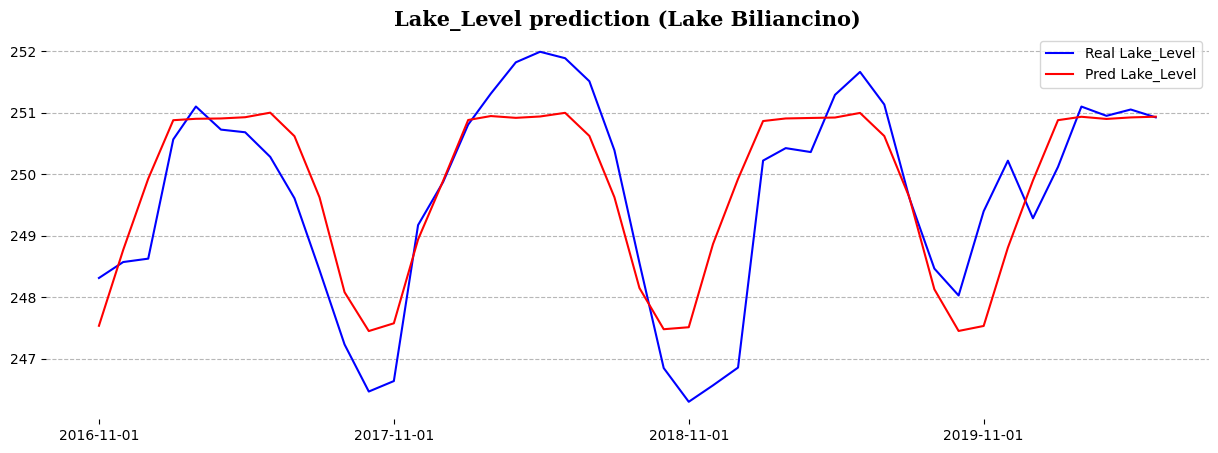

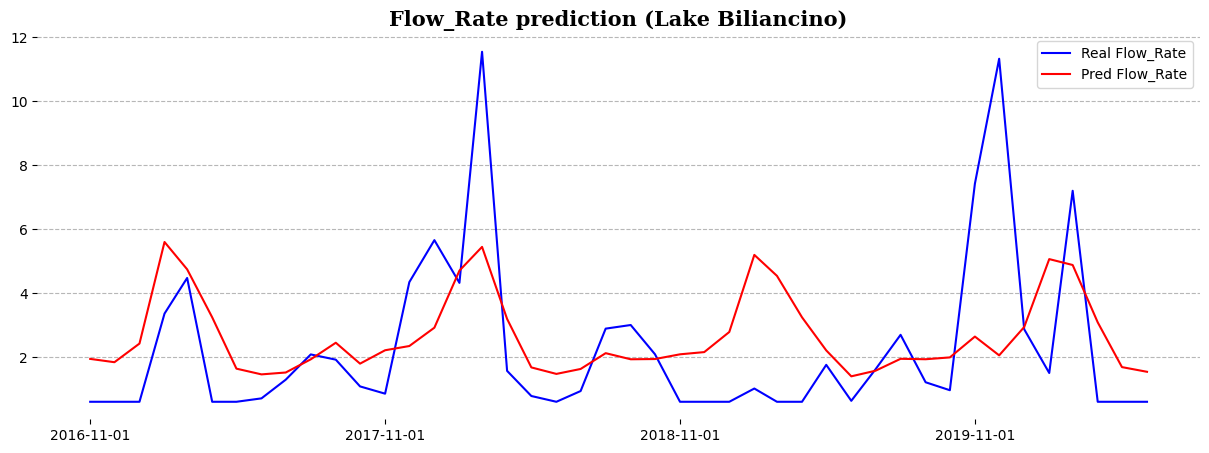

In [55]:
predicted_viz(y_test_biliancino_level, biliancino_pred_level, 'Lake_Level', 'Lake Biliancino', lake_biliancino)
predicted_viz(y_test_biliancino_flow, biliancino_pred_flow, 'Flow_Rate', 'Lake Biliancino', lake_biliancino)

River Arno

In [56]:
datasets[5].head()

Date  Rainfall_Le_Croci  Rainfall_Cavallina  Rainfall_S_Agata  \
0  01/01/1998                NaN                 NaN               NaN   
1  02/01/1998                NaN                 NaN               NaN   
2  03/01/1998                NaN                 NaN               NaN   
3  04/01/1998                NaN                 NaN               NaN   
4  05/01/1998                NaN                 NaN               NaN   

   Rainfall_Mangona  Rainfall_S_Piero  Rainfall_Vernio  Rainfall_Stia  \
0               NaN               NaN              NaN            NaN   
1               NaN               NaN              NaN            NaN   
2               NaN               NaN              NaN            NaN   
3               NaN               NaN              NaN            NaN   
4               NaN               NaN              NaN            NaN   

   Rainfall_Consuma  Rainfall_Incisa  Rainfall_Montevarchi  Rainfall_S_Savino  \
0               NaN              NaN                   NaN                NaN   
1               NaN              NaN                   NaN                NaN   
2               NaN              NaN                   NaN                NaN   
3               NaN              NaN                   NaN                NaN   
4               NaN              NaN                   NaN                NaN   

   Rainfall_Laterina  Rainfall_Bibbiena  Rainfall_Camaldoli  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3                NaN                NaN                 NaN   
4                NaN                NaN                 NaN   

   Temperature_Firenze  Hydrometry_Nave_di_Rosano  
0                  NaN                       1.82  
1                  NaN                       1.94  
2                  NaN                       2.11  
3                  NaN                       1.84  
4                  NaN                       1.88

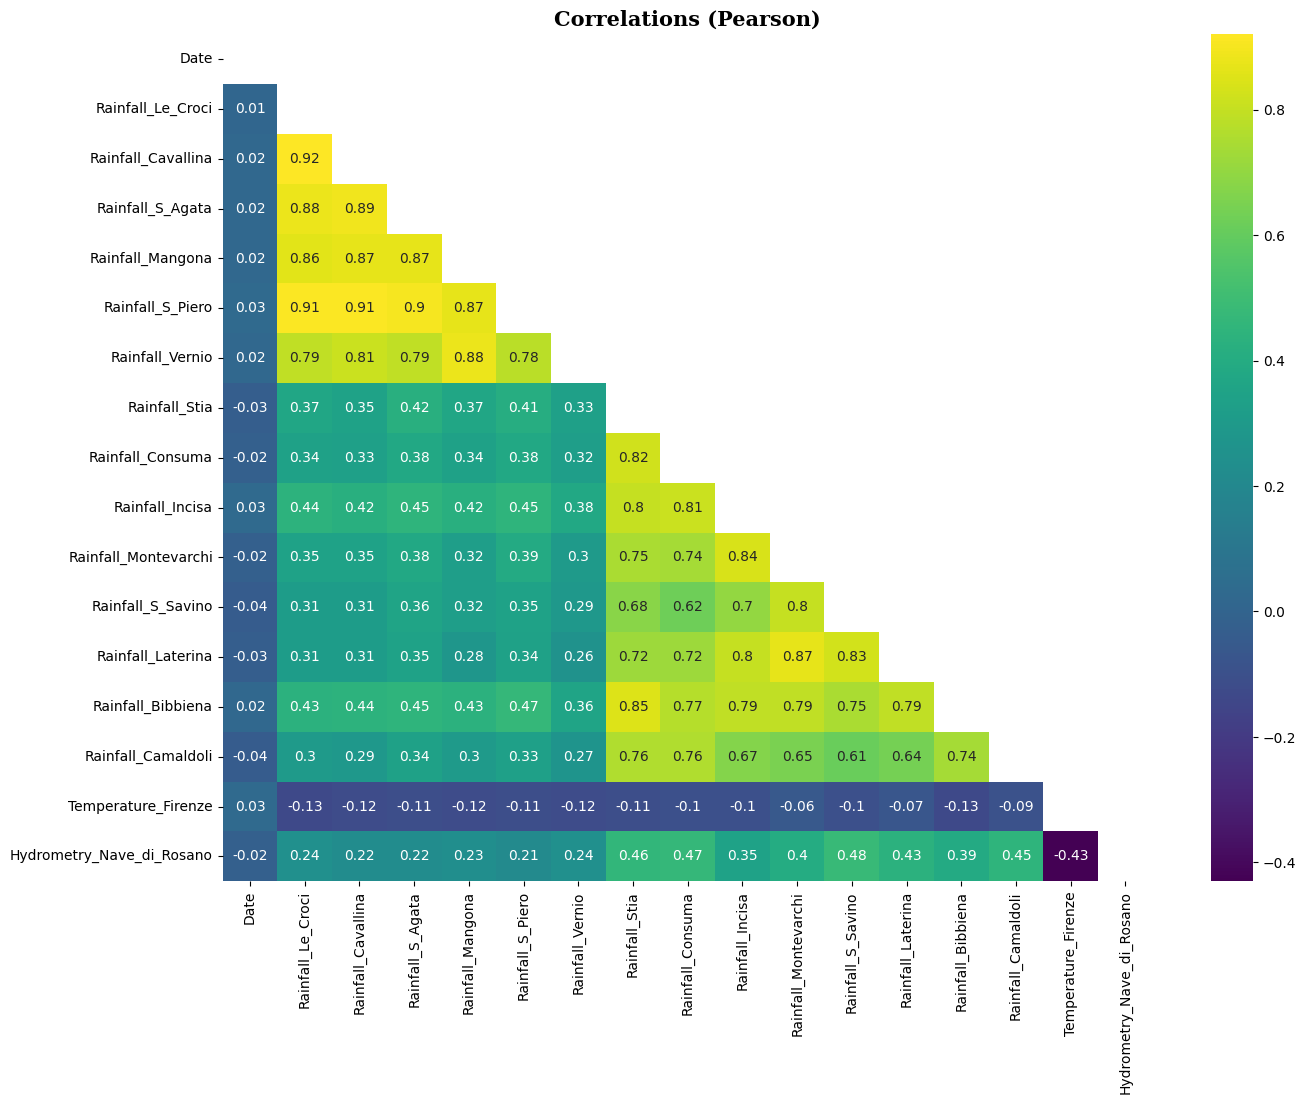

In [57]:
datasets[5]['Date'] = pd.to_datetime(datasets[5]['Date'], dayfirst=True)
corr_plot(datasets[5], 'River Arno', (20, 20))

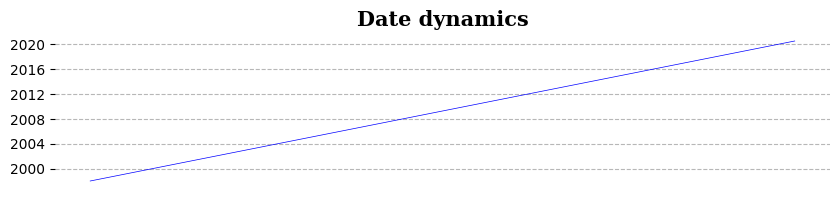

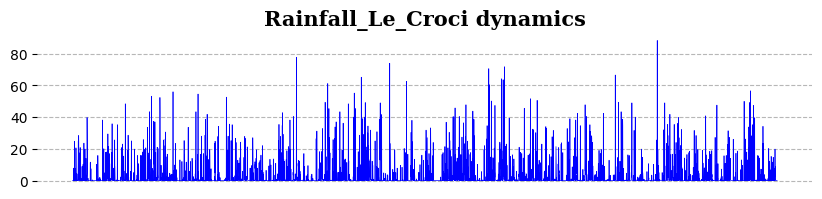

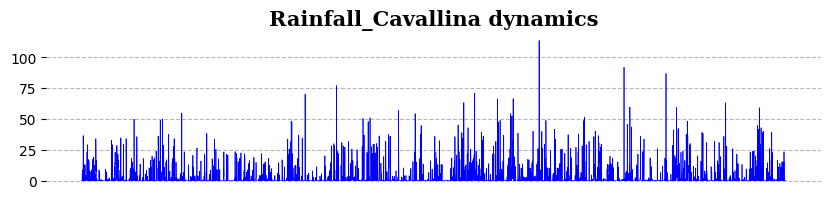

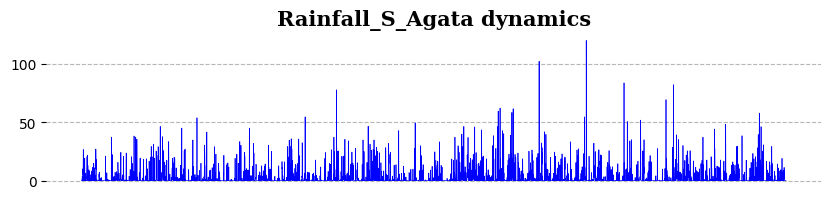

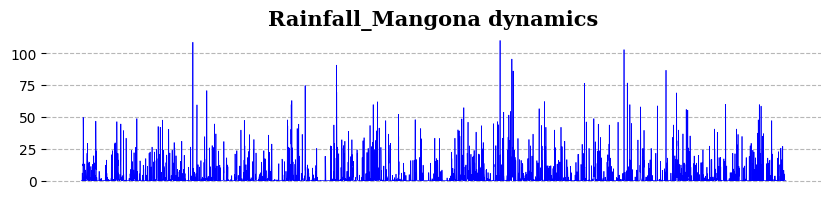

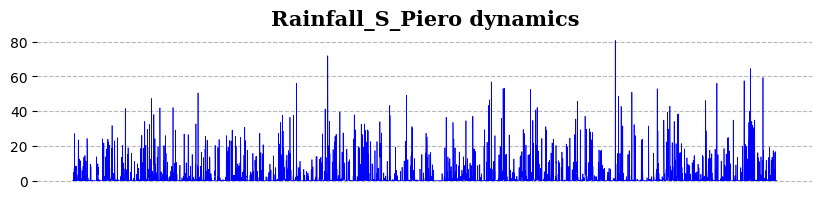

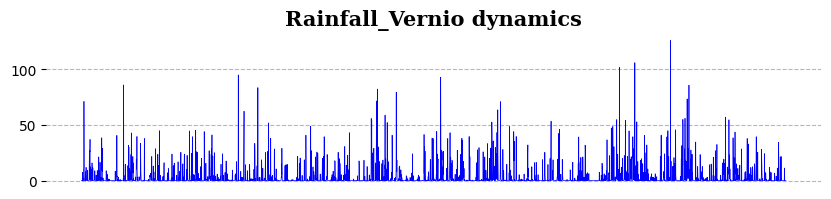

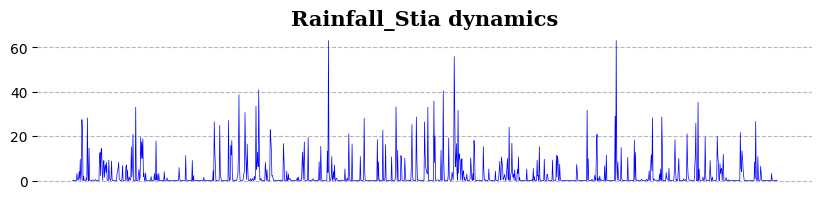

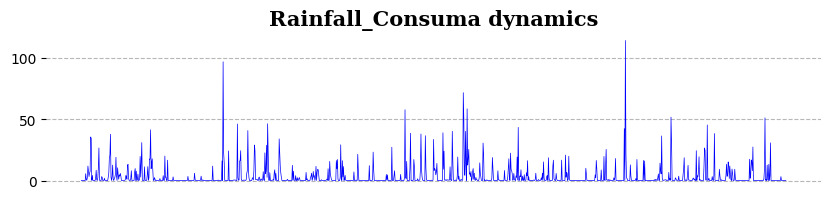

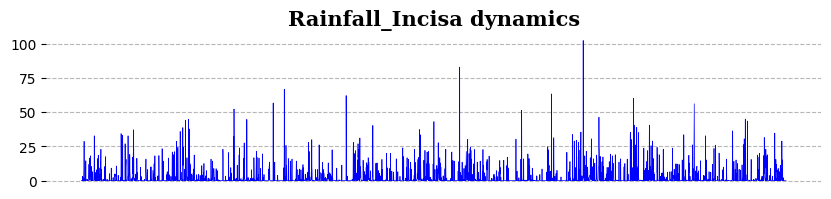

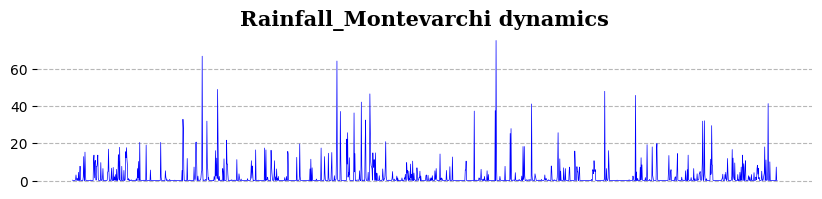

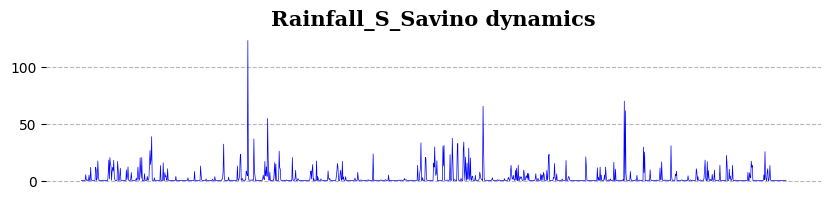

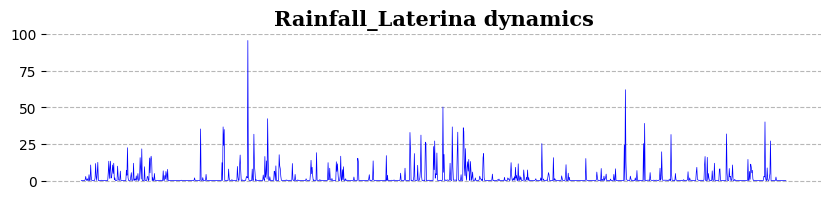

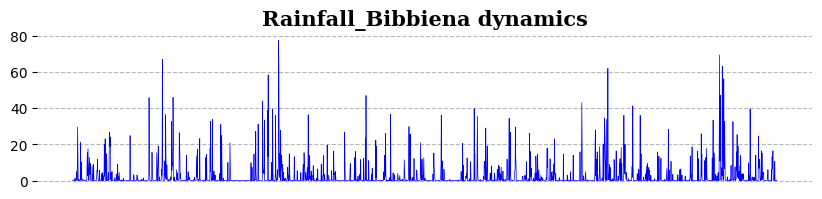

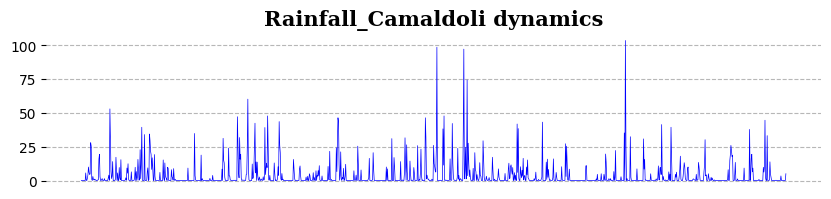

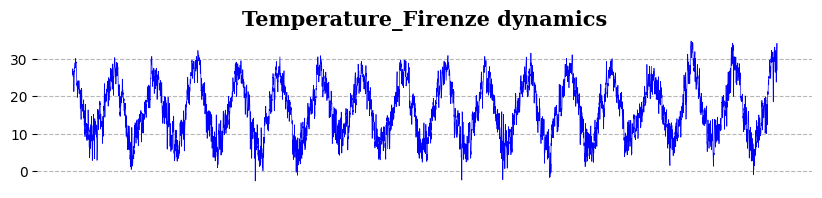

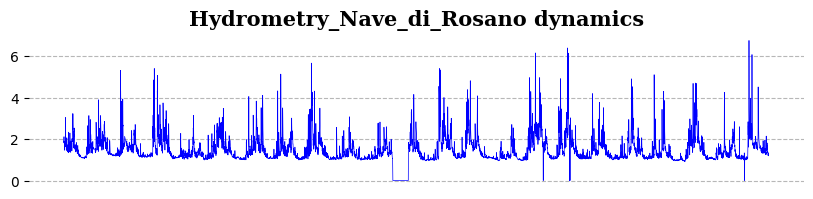

In [58]:
columns_viz(datasets[5], color= 'blue')

In [59]:
arno_pred = river_arno[['Hydrometry_Nave_di_Rosano', 'Temperature_Firenze', 
                      'Rainfall_Le_Croci', 'Rainfall_Cavallina', 
                      'Rainfall_S_Agata', 'Rainfall_Mangona', 'Rainfall_S_Piero']]

arno_pred = arno_pred.apply(lambda x: x.fillna(x.mean()))

arno_pred['rainfall_mean'] = arno_pred[['Rainfall_Le_Croci', 'Rainfall_Cavallina', 
                                    'Rainfall_S_Agata', 'Rainfall_Mangona', 
                                    'Rainfall_S_Piero']].mean(axis = 1).values

arno_pred.shape

(8217, 8)

In [60]:
y5 = arno_pred[['Hydrometry_Nave_di_Rosano']]
x5 = arno_pred.drop(['Hydrometry_Nave_di_Rosano'], axis = 1)

x_train_arno, x_test_arno, y_train_arno, y_test_arno = train_test_split(x5, y5, test_size = 0.2, random_state = 42, shuffle = False)

params_arno = {'n_estimators': 200,
            'max_depth': 2,
            'subsample': 1,
            'learning_rate': 0.04,
            'random_state': 0,
            'enable_categorical': True}

arno_model = XGBRegressor(**params_arno)

arno_model.fit(x_train_arno, y_train_arno)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [61]:
arno_y_pred = arno_model.predict(x_test_arno)

print('MAE value: ', mean_absolute_error(y_test_arno, arno_y_pred))

MAE value:  0.3843563281229262


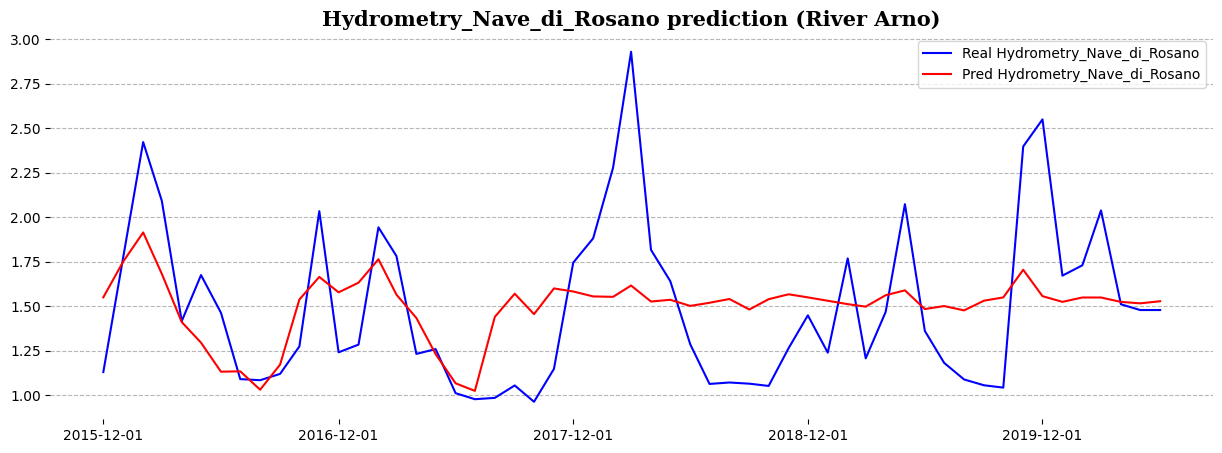

In [62]:
predicted_viz(y_test_arno, arno_y_pred, 'Hydrometry_Nave_di_Rosano', 'River Arno', river_arno)

Water Spring Amiata

In [63]:
datasets[6].head()

Date  Rainfall_Castel_del_Piano  Rainfall_Abbadia_S_Salvatore  \
0  01/01/2000                        NaN                           NaN   
1  02/01/2000                        NaN                           NaN   
2  03/01/2000                        NaN                           NaN   
3  04/01/2000                        NaN                           NaN   
4  05/01/2000                        NaN                           NaN   

   Rainfall_S_Fiora  Rainfall_Laghetto_Verde  Rainfall_Vetta_Amiata  \
0               NaN                      NaN                    NaN   
1               NaN                      NaN                    NaN   
2               NaN                      NaN                    NaN   
3               NaN                      NaN                    NaN   
4               NaN                      NaN                    NaN   

   Depth_to_Groundwater_S_Fiora_8  Depth_to_Groundwater_S_Fiora_11bis  \
0                             NaN                                 NaN   
1                             NaN                                 NaN   
2                             NaN                                 NaN   
3                             NaN                                 NaN   
4                             NaN                                 NaN   

   Depth_to_Groundwater_David_Lazzaretti  Temperature_Abbadia_S_Salvatore  \
0                                    NaN                              NaN   
1                                    NaN                              NaN   
2                                    NaN                              NaN   
3                                    NaN                              NaN   
4                                    NaN                              NaN   

   Temperature_S_Fiora  Temperature_Laghetto_Verde  Flow_Rate_Bugnano  \
0                -0.15                         NaN                NaN   
1                 1.55                         NaN                NaN   
2                 2.70                         NaN                NaN   
3                 4.00                         NaN                NaN   
4                 4.60                         NaN                NaN   

   Flow_Rate_Arbure  Flow_Rate_Ermicciolo  Flow_Rate_Galleria_Alta  
0               NaN                   NaN                      NaN  
1               NaN                   NaN                      NaN  
2               NaN                   NaN                      NaN  
3               NaN                   NaN                      NaN  
4               NaN                   NaN                      NaN

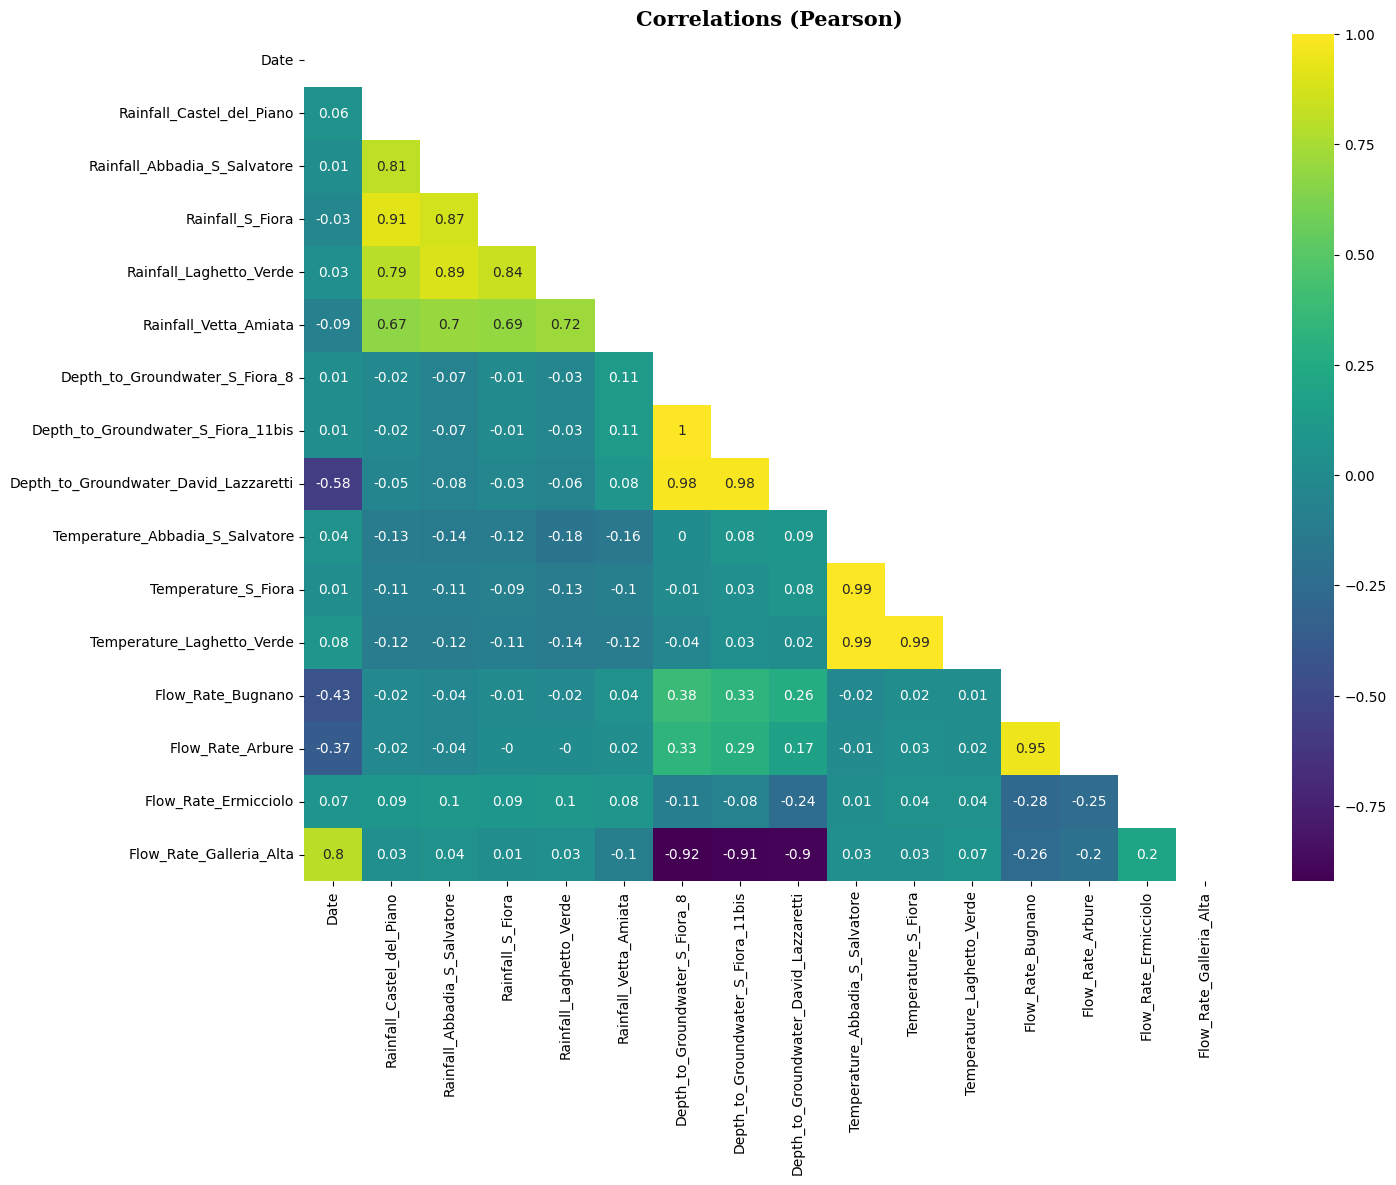

In [64]:
datasets[6]['Date'] = pd.to_datetime(datasets[6]['Date'], dayfirst=True)
corr_plot(datasets[6], 'Water Spring Amiata', (20, 20))

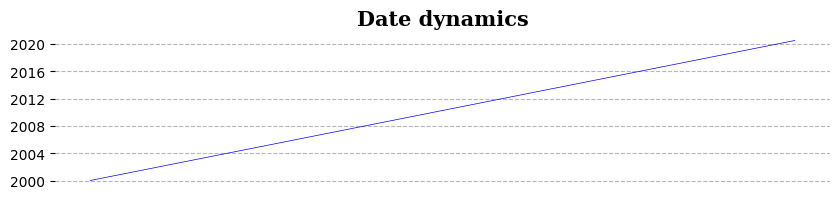

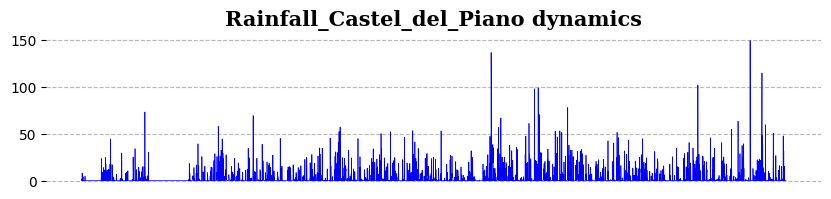

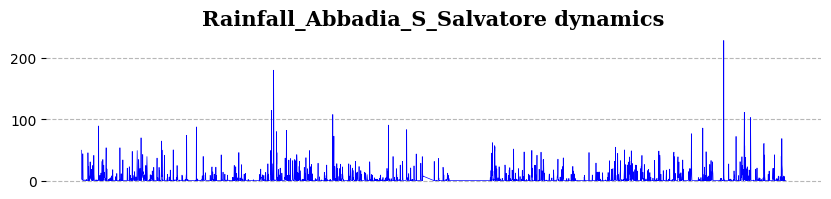

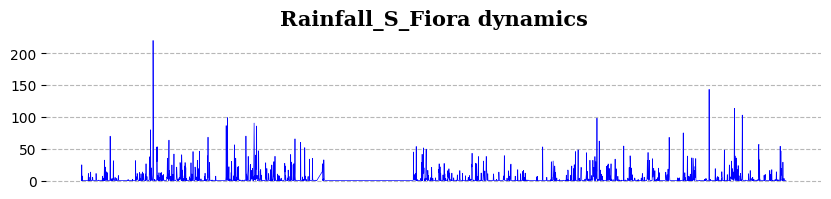

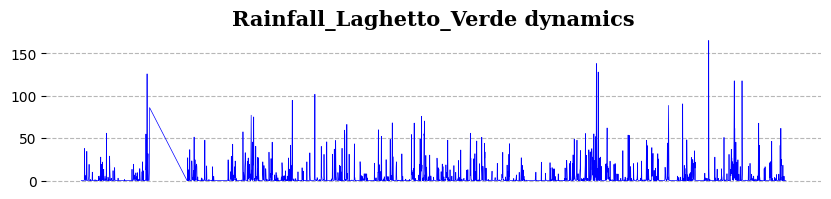

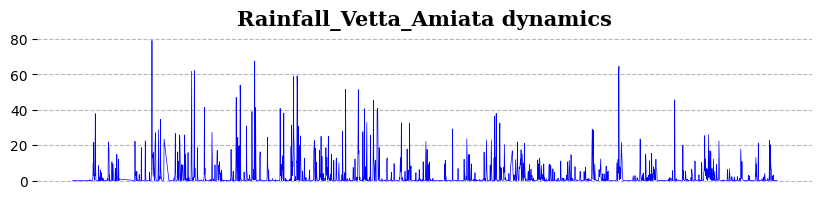

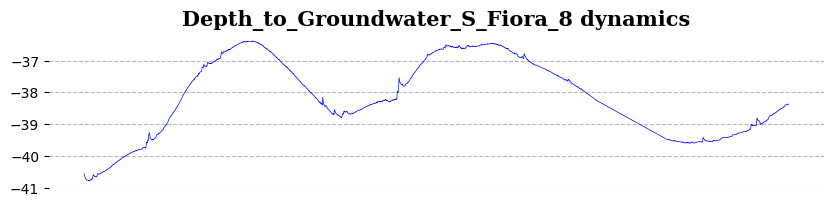

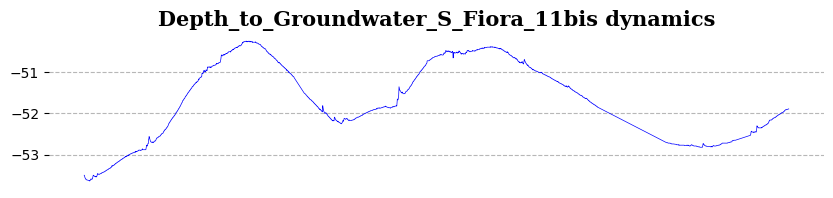

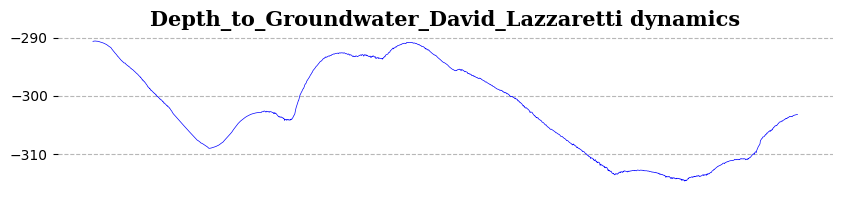

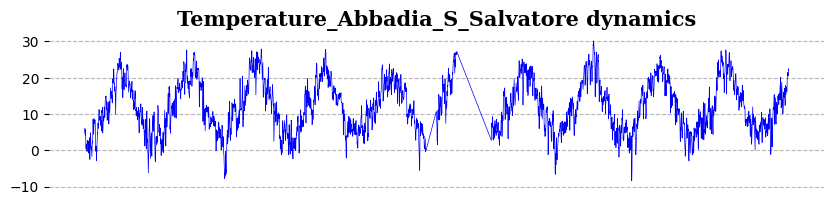

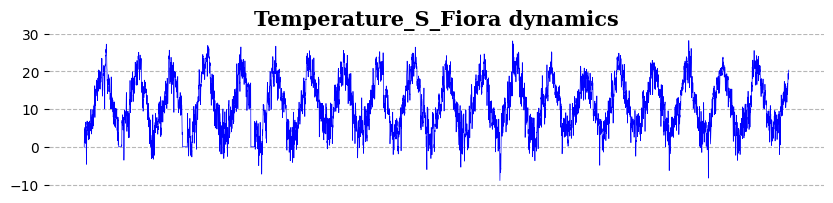

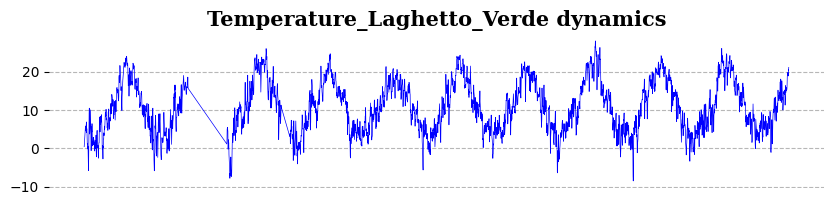

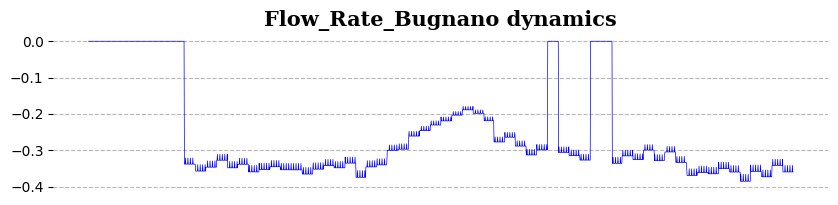

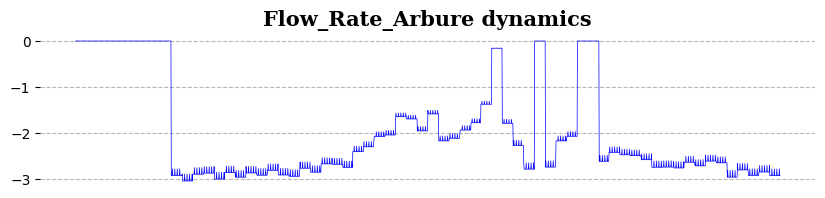

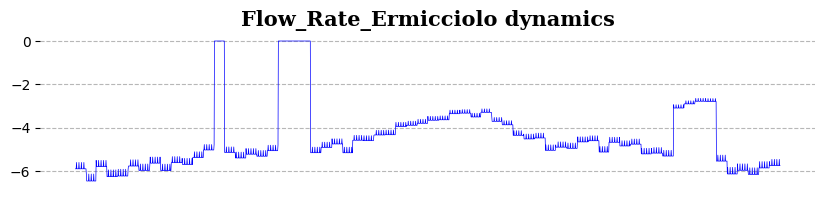

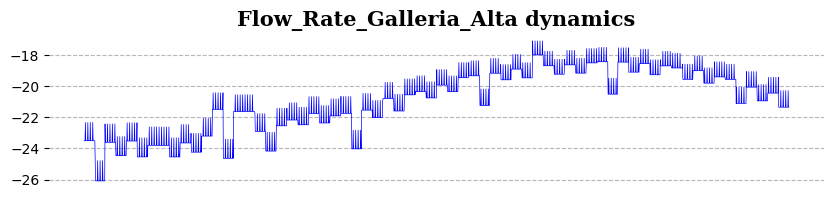

In [65]:
columns_viz(datasets[6], color= 'blue')

In [66]:
amiata_pred = water_spring_amiata

amiata_pred['Date'] = pd.to_datetime(amiata_pred['Date'])
amiata_pred = amiata_pred.set_index('Date')


rainfall_amiata = [col for col in amiata_pred.columns if 'Rainfall' in col]
temperature_amiata = [col for col in amiata_pred.columns if 'Temperature' in col]

amiata_pred['rainfall_mean'] = amiata_pred[rainfall_amiata].mean(axis = 1).values
amiata_pred['temperature_mean'] = amiata_pred[temperature_amiata].mean(axis = 1).values
amiata_pred = amiata_pred.drop(['Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
                          'Rainfall_S_Fiora', 'Rainfall_Vetta_Amiata'], axis = 1)

amiata_pred = amiata_pred.interpolate()

amiata_pred = amiata_pred.reset_index()
amiata_pred['Year'] = amiata_pred['Date'].dt.year
amiata_pred['Month'] = amiata_pred['Date'].dt.month
amiata_pred['Day'] = amiata_pred['Date'].dt.day
amiata_pred = amiata_pred.drop('Date', axis=1)



In [67]:
targets = ['Flow_Rate_Bugnano', 'Flow_Rate_Arbure', 'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']
y6 = amiata_pred[targets]
x6 = amiata_pred.drop(targets, axis=1)

x_train_amiata, x_test_amiata, y_train_amiata, y_test_amiata = train_test_split(
    x6, y6, test_size=0.2, random_state=42, shuffle=False
)

# Step 1: Remove rows with NaNs in the test set
x_test_amiata = x_test_amiata[y_test_amiata.notna().all(axis=1)]
y_test_amiata = y_test_amiata.dropna()

# Step 2: Impute NaN values in the training set
# Using backward fill as it's a time series data (assuming recent past is a good estimate for missing values)
y_train_amiata = y_train_amiata.fillna(method='bfill')


C:\Users\ricar\AppData\Local\Temp\ipykernel_12760\3048102520.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_train_amiata = y_train_amiata.fillna(method='bfill')


In [68]:
params_amiata = {'n_estimators': 200,
            'max_depth': 2,
            'subsample': 1,
            'learning_rate': 0.04,
            'random_state': 0,
            'enable_categorical': True}

amiata_model_Bugnano = XGBRegressor(**params_amiata)
amiata_model_Arbure = XGBRegressor(**params_amiata)
amiata_model_Ermicciolo = XGBRegressor(**params_amiata)
amiata_model_Galleria_Alta = XGBRegressor(**params_amiata)

amiata_model_Bugnano.fit(x_train_amiata, y_train_amiata['Flow_Rate_Bugnano'])
amiata_model_Arbure.fit(x_train_amiata, y_train_amiata['Flow_Rate_Arbure'])
amiata_model_Ermicciolo.fit(x_train_amiata, y_train_amiata['Flow_Rate_Ermicciolo'])
amiata_model_Galleria_Alta.fit(x_train_amiata, y_train_amiata['Flow_Rate_Galleria_Alta'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [69]:
amiata_pred_Bugnano = amiata_model_Bugnano.predict(x_test_amiata)
amiata_pred_Arbure = amiata_model_Arbure.predict(x_test_amiata)
amiata_pred_Ermicciolo = amiata_model_Ermicciolo.predict(x_test_amiata)
amiata_pred_Galleria_Alta = amiata_model_Galleria_Alta.predict(x_test_amiata)

print('MAE value (Flow_Rate_Bugnano): ', mean_absolute_error(y_test_amiata['Flow_Rate_Bugnano'], amiata_pred_Bugnano))
print('MAE value (Flow_Rate_Arbure): ', mean_absolute_error(y_test_amiata['Flow_Rate_Arbure'], amiata_pred_Arbure))
print('MAE value (Flow_Rate_Ermicciolo): ', mean_absolute_error(y_test_amiata['Flow_Rate_Ermicciolo'], amiata_pred_Ermicciolo))
print('MAE value (Flow_Rate_Galleria_Alta): ', mean_absolute_error(y_test_amiata['Flow_Rate_Galleria_Alta'], amiata_pred_Galleria_Alta))

MAE value (Flow_Rate_Bugnano):  0.11398071945041596
MAE value (Flow_Rate_Arbure):  1.0725810646993872
MAE value (Flow_Rate_Ermicciolo):  1.307132630761674
MAE value (Flow_Rate_Galleria_Alta):  2.2389844914093757


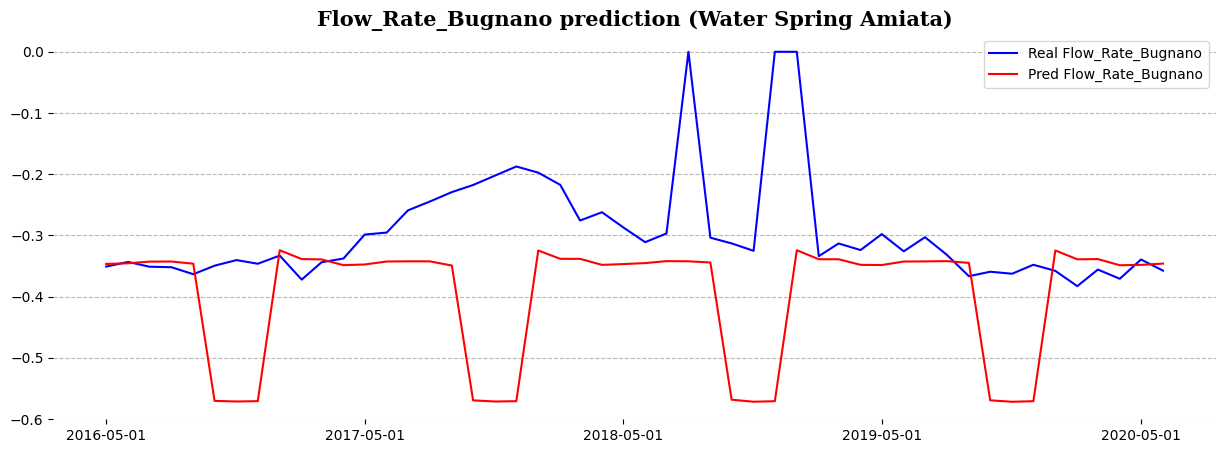

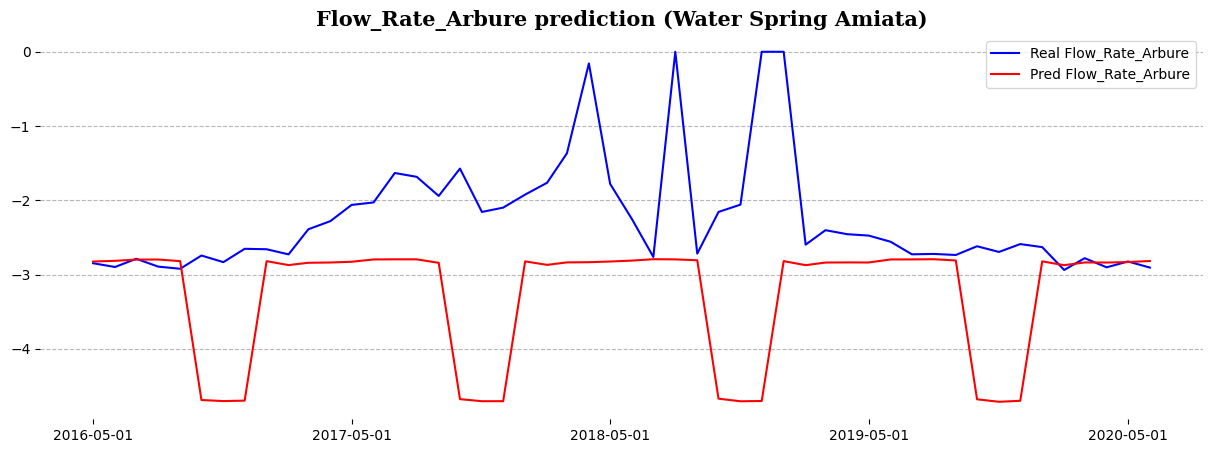

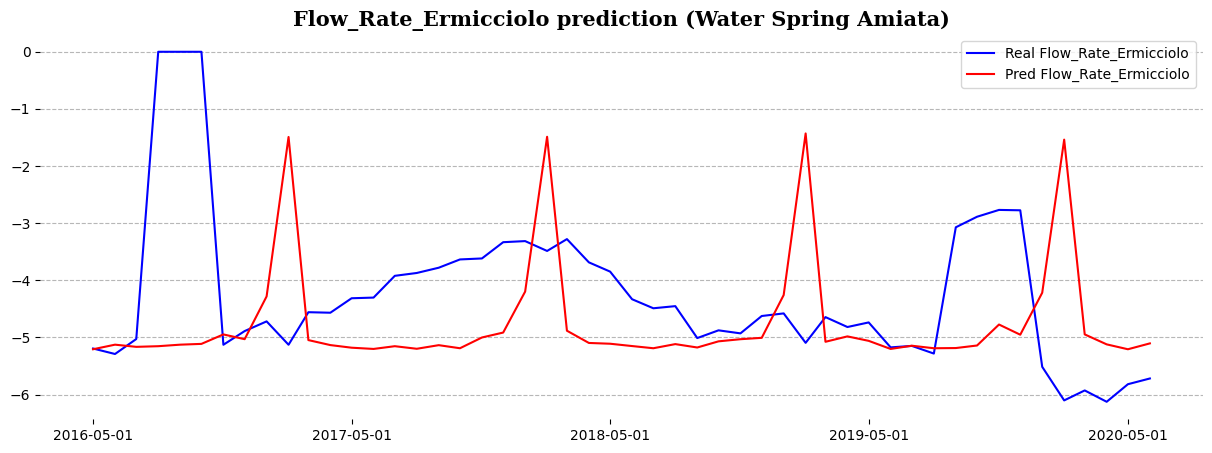

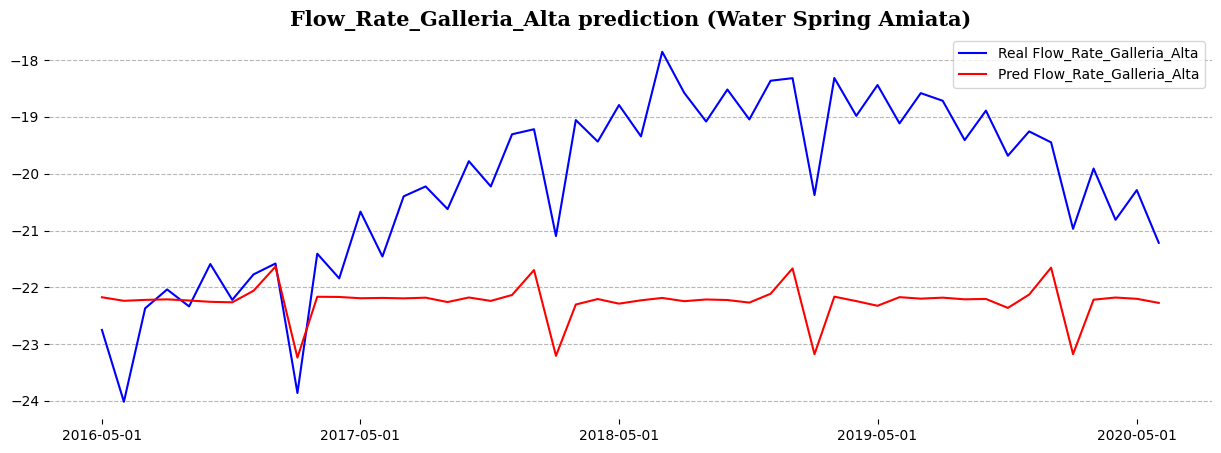

In [70]:
predicted_viz(y_test_amiata['Flow_Rate_Bugnano'], amiata_pred_Bugnano, 'Flow_Rate_Bugnano', 'Water Spring Amiata', water_spring_amiata)
predicted_viz(y_test_amiata['Flow_Rate_Arbure'], amiata_pred_Arbure, 'Flow_Rate_Arbure', 'Water Spring Amiata', water_spring_amiata)
predicted_viz(y_test_amiata['Flow_Rate_Ermicciolo'], amiata_pred_Ermicciolo, 'Flow_Rate_Ermicciolo', 'Water Spring Amiata', water_spring_amiata)
predicted_viz(y_test_amiata['Flow_Rate_Galleria_Alta'], amiata_pred_Galleria_Alta, 'Flow_Rate_Galleria_Alta', 'Water Spring Amiata', water_spring_amiata)

Water Spring Lupa

In [71]:
datasets[7].head()

Date  Rainfall_Terni  Flow_Rate_Lupa
0  01/01/2009           2.797             NaN
1  02/01/2009           2.797             NaN
2  03/01/2009           2.797             NaN
3  04/01/2009           2.797             NaN
4  05/01/2009           2.797             NaN

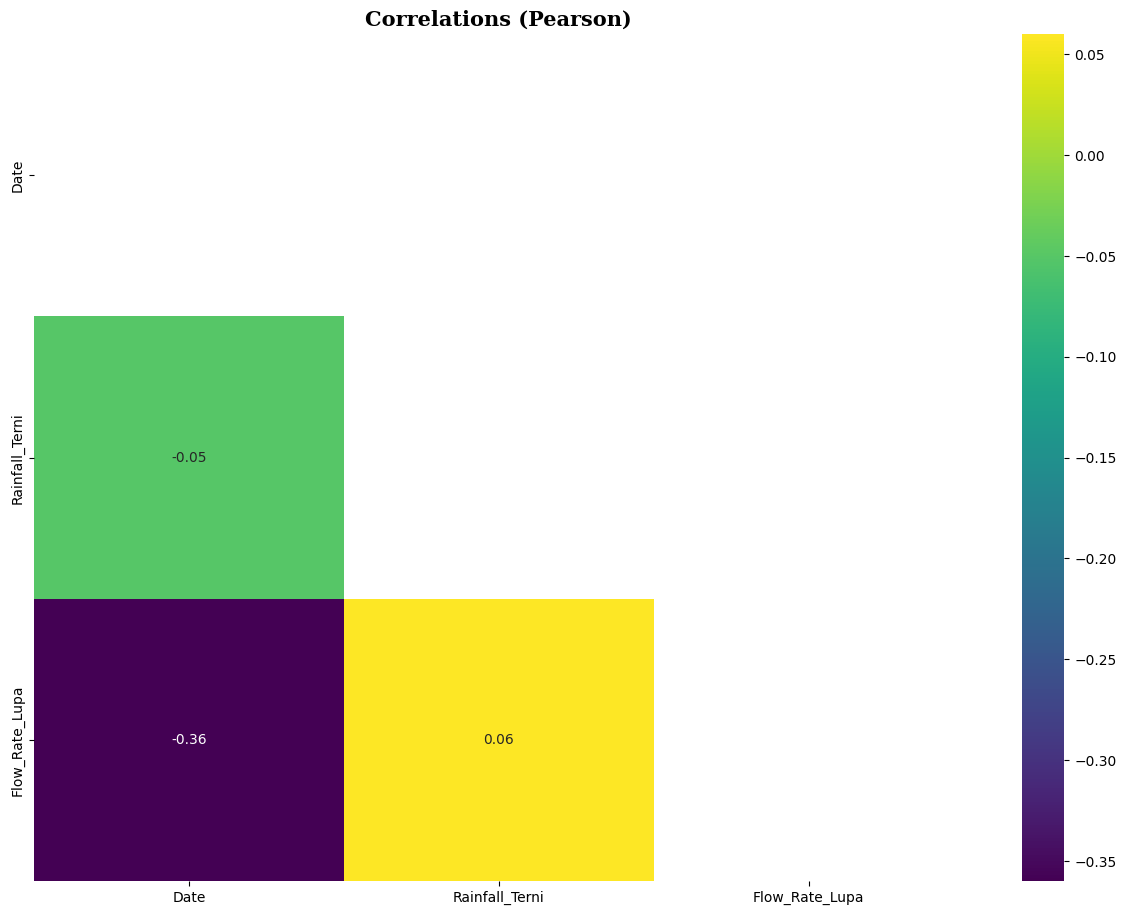

In [72]:
datasets[7]['Date'] = pd.to_datetime(datasets[7]['Date'], dayfirst=True)
corr_plot(datasets[7], 'Water Spring Lupa', (20, 20))

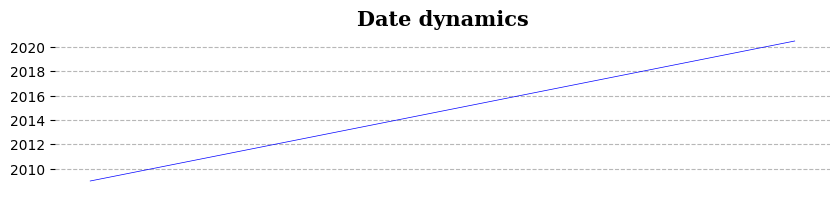

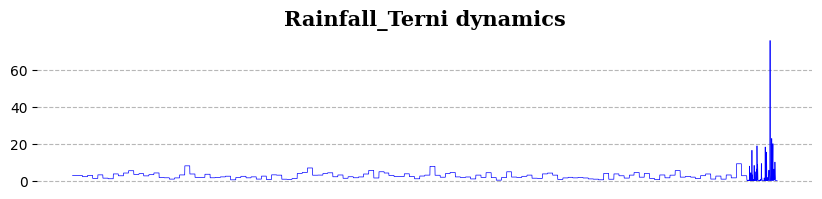

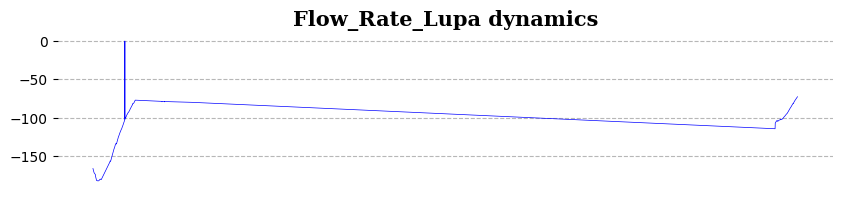

In [73]:
columns_viz(datasets[7], color= 'blue')

In [74]:
water_spring_lupa.columns

Index(['Date', 'Rainfall_Terni', 'Flow_Rate_Lupa'], dtype='object')

In [75]:
lupa_pred = water_spring_lupa

lupa_pred['Date'] = pd.to_datetime(lupa_pred['Date'])
lupa_pred = lupa_pred.set_index('Date')

lupa_pred = lupa_pred.fillna(lupa_pred.interpolate())

lupa_pred = lupa_pred.reset_index()
lupa_pred['Year'] = lupa_pred['Date'].dt.year
lupa_pred['Month'] = lupa_pred['Date'].dt.month
lupa_pred['Day'] = lupa_pred['Date'].dt.day
lupa_pred = lupa_pred.drop('Date', axis=1)

In [76]:
y7 = lupa_pred[['Flow_Rate_Lupa']]
y7_filled = y7.fillna(y7.median())
x7 = lupa_pred.drop(['Flow_Rate_Lupa'], axis = 1)

x_train_lupa_filled, x_test_lupa_filled, y_train_lupa_filled, y_test_lupa_filled = train_test_split(x7, y7_filled, test_size=0.2, random_state=42, shuffle=False)

In [77]:
lupa_params = {'n_estimators': 200,
            'max_depth': 2,
            'subsample': 1,
            'learning_rate': 0.04,
            'random_state': 0,
            'enable_categorical': True}

lupa_model = XGBRegressor(**lupa_params)

lupa_model.fit(x_train_lupa_filled, y_train_lupa_filled)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [78]:
lupa_y_pred = lupa_model.predict(x_test_lupa_filled)

print('MAE value: ', mean_absolute_error(y_test_lupa_filled, lupa_y_pred))

MAE value:  6.1149520063854395


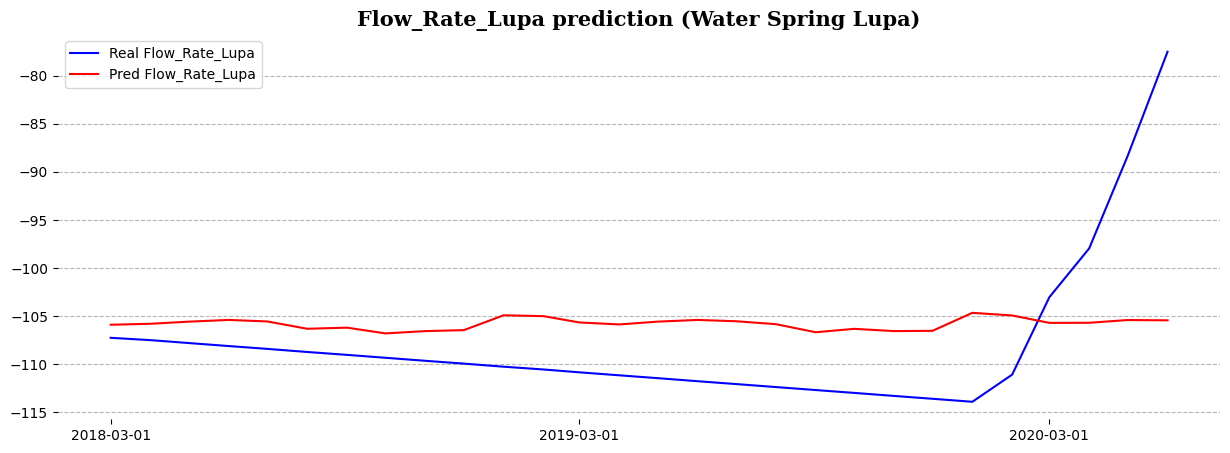

In [79]:
predicted_viz(y_test_lupa_filled, lupa_y_pred, 'Flow_Rate_Lupa', 'Water Spring Lupa', water_spring_lupa)

Water Spring Madonna

In [80]:
datasets[8].head()

Date  Rainfall_Settefrati  Temperature_Settefrati  \
0  01/01/2012                  0.0                    5.25   
1  02/01/2012                  5.6                    6.65   
2  03/01/2012                 10.0                    8.85   
3  04/01/2012                  0.0                    6.75   
4  05/01/2012                  1.0                    5.55   

   Flow_Rate_Madonna_di_Canneto  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN

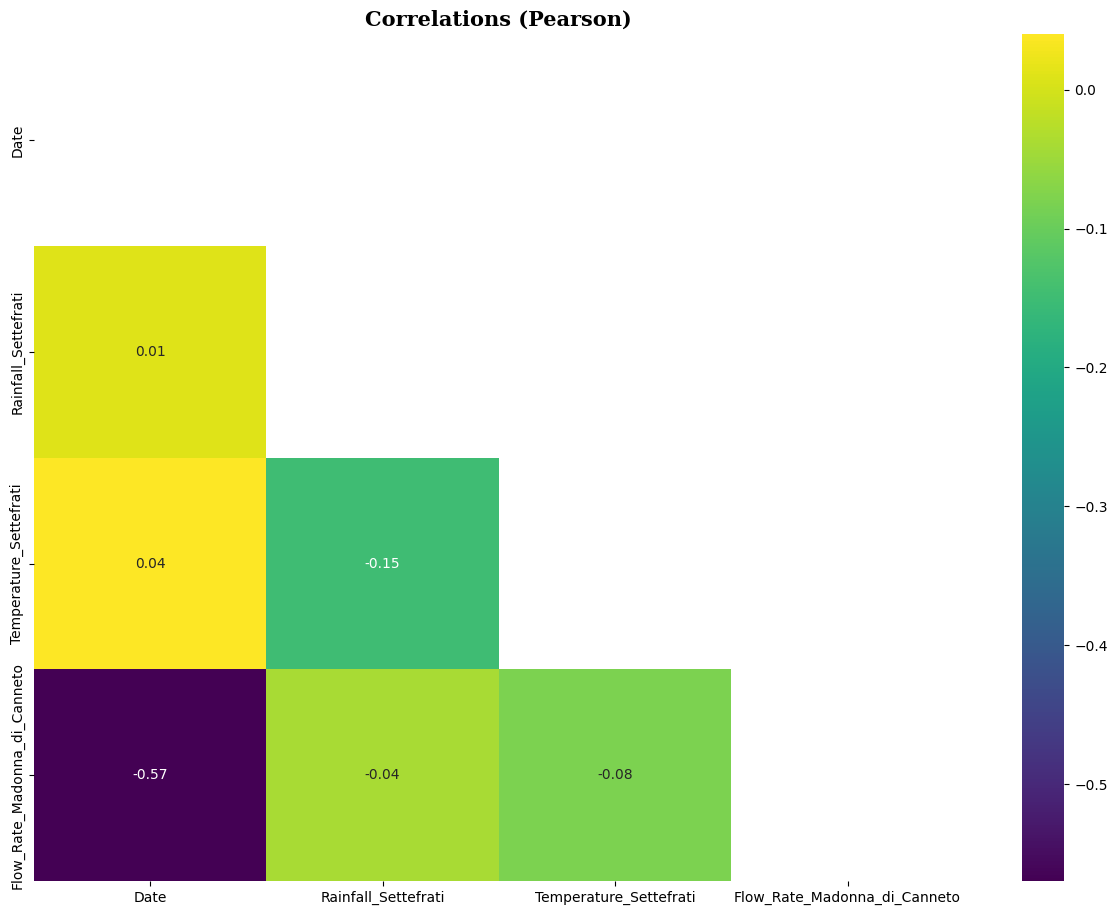

In [81]:
datasets[8]['Date'] = pd.to_datetime(datasets[8]['Date'], dayfirst=True)
corr_plot(datasets[8], 'Water Spring Madonna di Canneto', (20, 20))

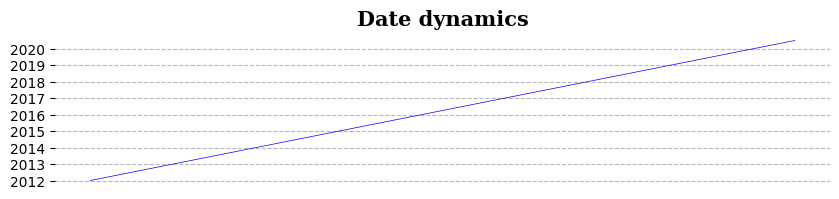

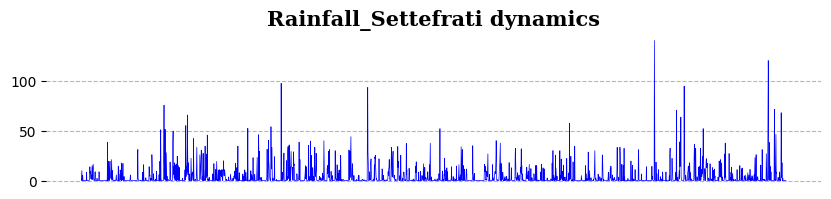

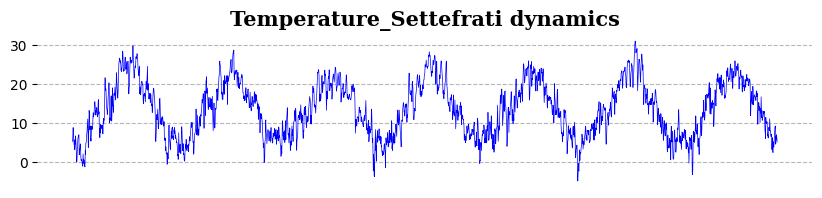

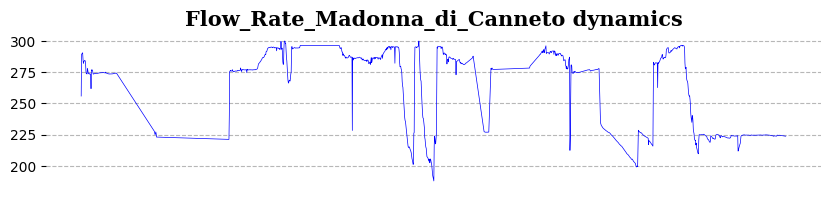

In [82]:
columns_viz(datasets[8], color= 'blue')

In [83]:
madonna_pred = water_spring_madonna

madonna_pred['Date'] = pd.to_datetime(madonna_pred['Date'])
madonna_pred = madonna_pred.set_index('Date')

madonna_pred = madonna_pred.fillna(madonna_pred.interpolate())


madonna_pred = madonna_pred.reset_index()
madonna_pred['Year'] = madonna_pred['Date'].dt.year
madonna_pred['Month'] = madonna_pred['Date'].dt.month
madonna_pred['Day'] = madonna_pred['Date'].dt.day
madonna_pred = madonna_pred.drop('Date', axis=1)


In [84]:
y8 = madonna_pred[['Flow_Rate_Madonna_di_Canneto']]
y8_filled = y8.fillna(y8.median())
x8 = madonna_pred.drop(['Flow_Rate_Madonna_di_Canneto'], axis = 1)

x_train_madonna_filled, x_test_madonna_filled, y_train_madonna_filled, y_test_madonna_filled = train_test_split(x8, y8_filled, test_size=0.2, random_state=42, shuffle=False)

In [85]:
madonna_params = {'n_estimators': 200,
            'max_depth': 2,
            'subsample': 1,
            'learning_rate': 0.04,
            'random_state': 0,
            'enable_categorical': True}

madonna_model = XGBRegressor(**madonna_params)

madonna_model.fit(x_train_madonna_filled, y_train_madonna_filled)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [86]:
madonna_y_pred = madonna_model.predict(x_test_madonna_filled)

print('MAE value: ', mean_absolute_error(y_test_madonna_filled, madonna_y_pred))

MAE value:  39.02343229263114


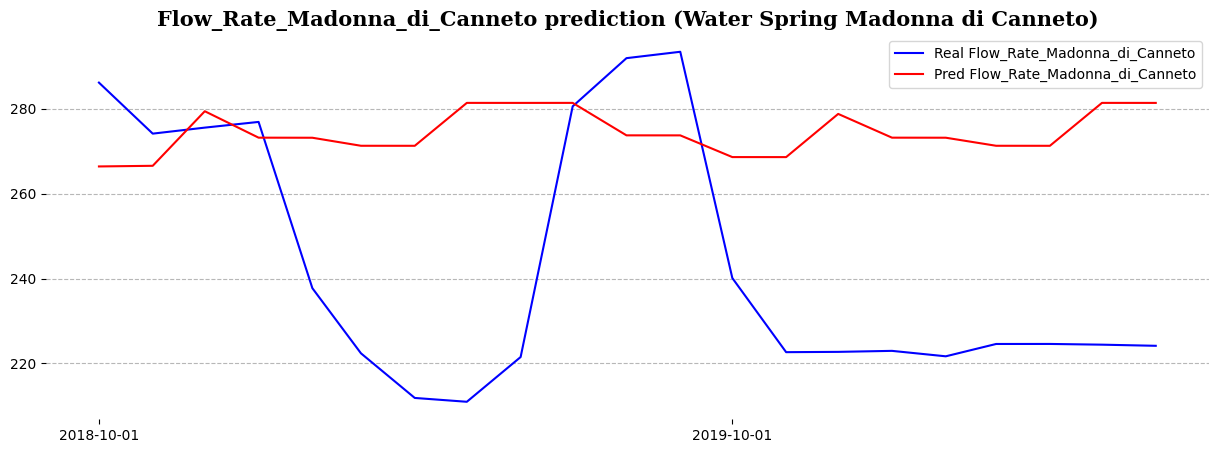

In [87]:
predicted_viz(y_test_madonna_filled, madonna_y_pred, 'Flow_Rate_Madonna_di_Canneto', 'Water Spring Madonna di Canneto', water_spring_madonna)

In [88]:
!pip freeze > requirements.txt